In [1]:
# Importing the necessary packages

import pandas                          as      pd
import numpy                           as      np
import matplotlib.pyplot               as      plt
import seaborn                         as      sns
import statsmodels.tools.eval_measures as      em
from   sklearn.metrics                 import  mean_squared_error
from   statsmodels.tsa.api             import ExponentialSmoothing, SimpleExpSmoothing, Holt
from   IPython.display                 import display
from   pylab                           import rcParams


from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

## Read the data.

In [2]:
dfr = pd.read_csv('Rose.csv',parse_dates=True,index_col='YearMonth')
dfr.head().to_csv('rose_head.csv')
dfr.head()

Rose
YearMonth        
1980-01-01  112.0
1980-02-01  118.0
1980-03-01  129.0
1980-04-01   99.0
1980-05-01  116.0

In [3]:
dfs = pd.read_csv('Sparkling.csv',parse_dates=True,index_col='YearMonth')
dfs.head().to_csv('spark_head.csv')
dfs.head()

Sparkling
YearMonth            
1980-01-01       1686
1980-02-01       1591
1980-03-01       2304
1980-04-01       1712
1980-05-01       1471

In [4]:
dfr.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 187 entries, 1980-01-01 to 1995-07-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Rose    185 non-null    float64
dtypes: float64(1)
memory usage: 2.9 KB


In [5]:
dfs.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 187 entries, 1980-01-01 to 1995-07-01
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Sparkling  187 non-null    int64
dtypes: int64(1)
memory usage: 2.9 KB


## Check for Missing Values

In [6]:
dfs.isna().sum()

Sparkling    0
dtype: int64

In [7]:
dfr.isna().sum()

Rose    2
dtype: int64

## Fill Missing Values by Interpolation

In [8]:
dfr = dfr.interpolate()

In [9]:
dfr.isna().sum()

Rose    0
dtype: int64

## Plot the Time Series

In [340]:
rcParams['figure.figsize'] = 16,9

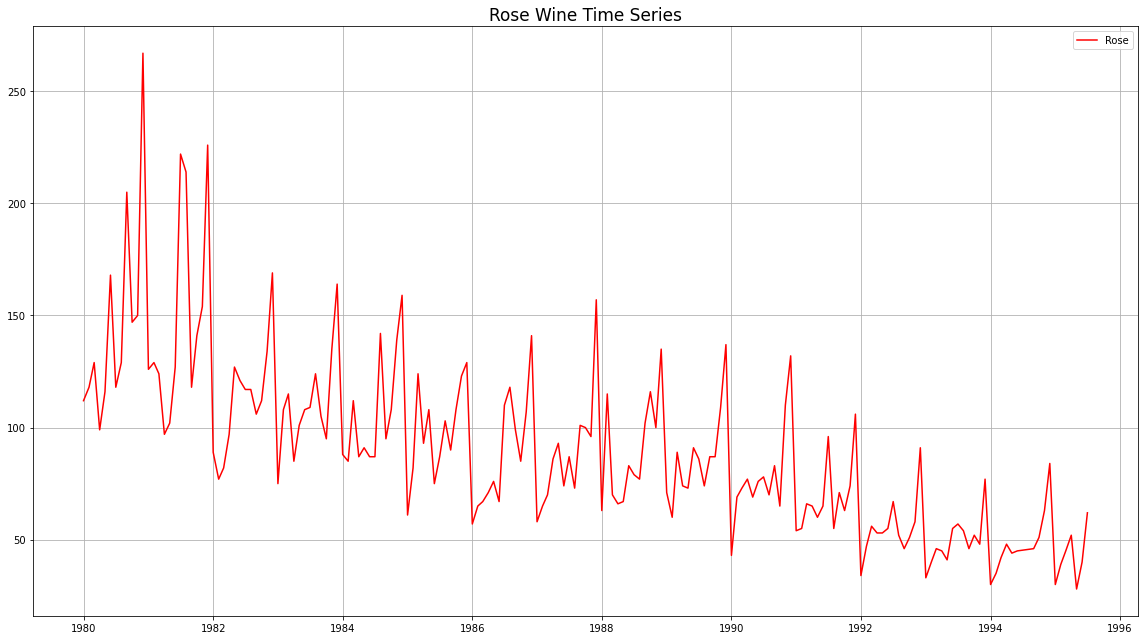

In [341]:
# ROSE TIME SERIES

plt.plot(dfr, color='red');
plt.title('Rose Wine Time Series', fontsize=17);
plt.grid();
plt.legend(['Rose'], loc='best');
plt.tight_layout()
plt.savefig('rose_ts.jpg', bbox_inches='tight');


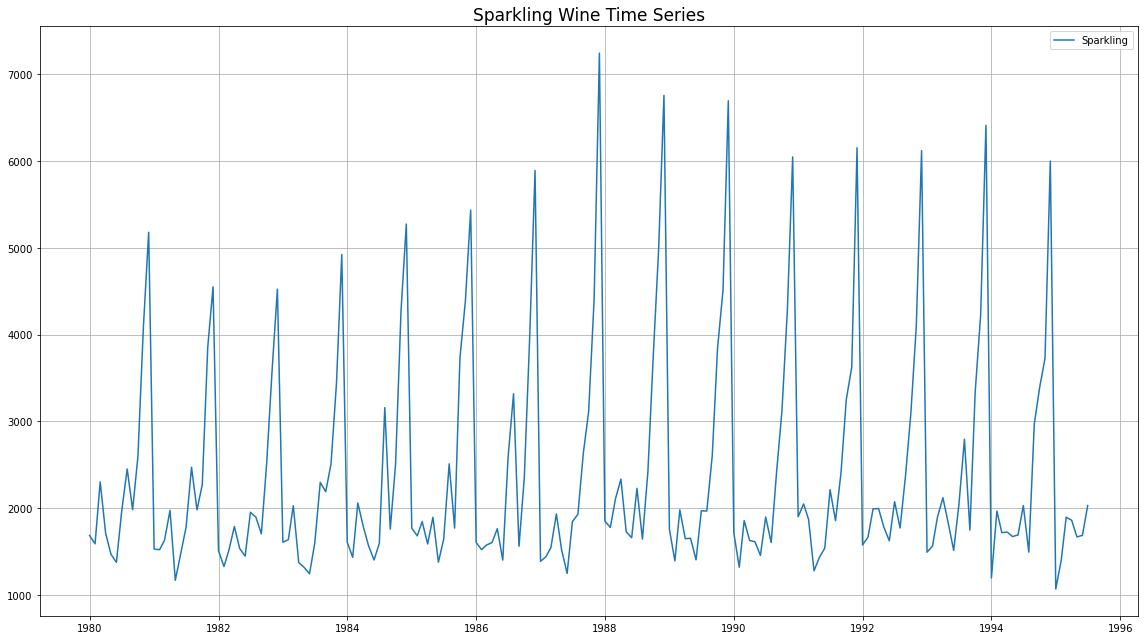

In [342]:
# SPARKLING TIME SERIES

plt.plot(dfs);
plt.title('Sparkling Wine Time Series', fontsize=17);
plt.grid();
plt.legend(['Sparkling']);
plt.tight_layout()
plt.savefig('spark_ts.jpg', bbox_inches='tight');



## Check the basic measures of descriptive statistics of the Time Series

In [343]:

round(dfr.describe().T,3).to_csv('rose_describe.csv')
round(dfr.describe().T,3)

count    mean     std   min   25%   50%    75%    max
Rose  187.0  89.914  39.238  28.0  62.5  85.0  111.0  267.0

In [344]:

round(dfs.describe().T,3).to_csv('spark_describe.csv')
round(dfs.describe().T,3)

count      mean       std     min     25%     50%     75%     max
Sparkling  187.0  2402.417  1295.112  1070.0  1605.0  1874.0  2549.0  7242.0

## Plot Box-plot Monthwise

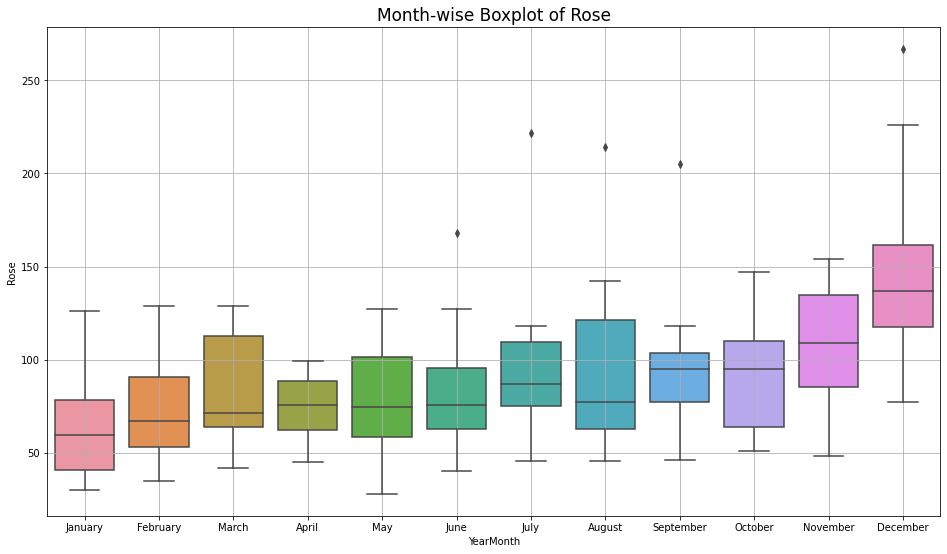

In [345]:
sns.boxplot(x = dfr.index.month_name(), y = dfr['Rose']);
plt.grid();
plt.title('Month-wise Boxplot of Rose', fontsize=17);
plt.savefig('rose_monthwise_box.jpg', bbox_inches='tight');

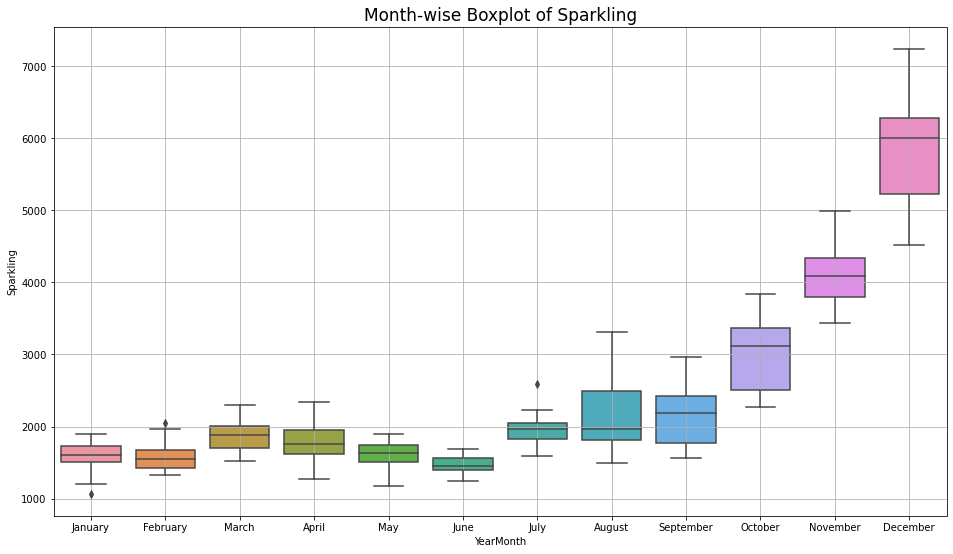

In [346]:
sns.boxplot(x = dfs.index.month_name(), y = dfs['Sparkling']);
plt.grid();
plt.title('Month-wise Boxplot of Sparkling', fontsize=17);
plt.savefig('spark_monthwise_box.jpg', bbox_inches='tight');

## Decompose the Time Series and plot the different components.

In [347]:
from    statsmodels.tsa.seasonal import   seasonal_decompose

### Additive Decomposition of Rose

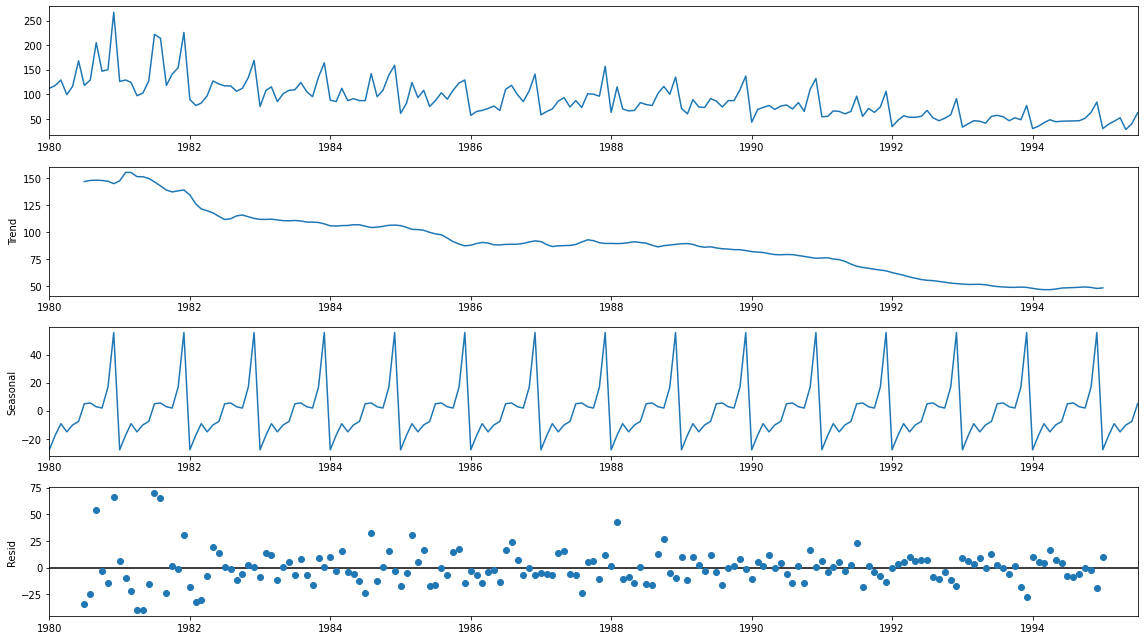

In [348]:
decompositionr = seasonal_decompose(dfr,model='additive')

decompositionr.plot()
plt.savefig('decomposer.jpg', bbox_inches='tight');


In [349]:
trend = decompositionr.trend
seasonality = decompositionr.seasonal
residual = decompositionr.resid

print('Trend','\n',trend.head(12),'\n')
print('Seasonality','\n',seasonality.head(12),'\n')
print('Residual','\n',residual.head(12),'\n')

trend.head(12).to_csv('rose_trend.csv')
seasonality.head(12).to_csv('rose_season.csv')
residual.head(12).to_csv('rose_resid.csv')

Trend 
 YearMonth
1980-01-01           NaN
1980-02-01           NaN
1980-03-01           NaN
1980-04-01           NaN
1980-05-01           NaN
1980-06-01           NaN
1980-07-01    147.083333
1980-08-01    148.125000
1980-09-01    148.375000
1980-10-01    148.083333
1980-11-01    147.416667
1980-12-01    145.125000
Name: trend, dtype: float64 

Seasonality 
 YearMonth
1980-01-01   -27.908647
1980-02-01   -17.435632
1980-03-01    -9.285830
1980-04-01   -15.098330
1980-05-01   -10.196544
1980-06-01    -7.678687
1980-07-01     4.896908
1980-08-01     5.499686
1980-09-01     2.774686
1980-10-01     1.871908
1980-11-01    16.846908
1980-12-01    55.713575
Name: seasonal, dtype: float64 

Residual 
 YearMonth
1980-01-01          NaN
1980-02-01          NaN
1980-03-01          NaN
1980-04-01          NaN
1980-05-01          NaN
1980-06-01          NaN
1980-07-01   -33.980241
1980-08-01   -24.624686
1980-09-01    53.850314
1980-10-01    -2.955241
1980-11-01   -14.263575
1980-12-01    66.16142

<AxesSubplot:xlabel='YearMonth'>

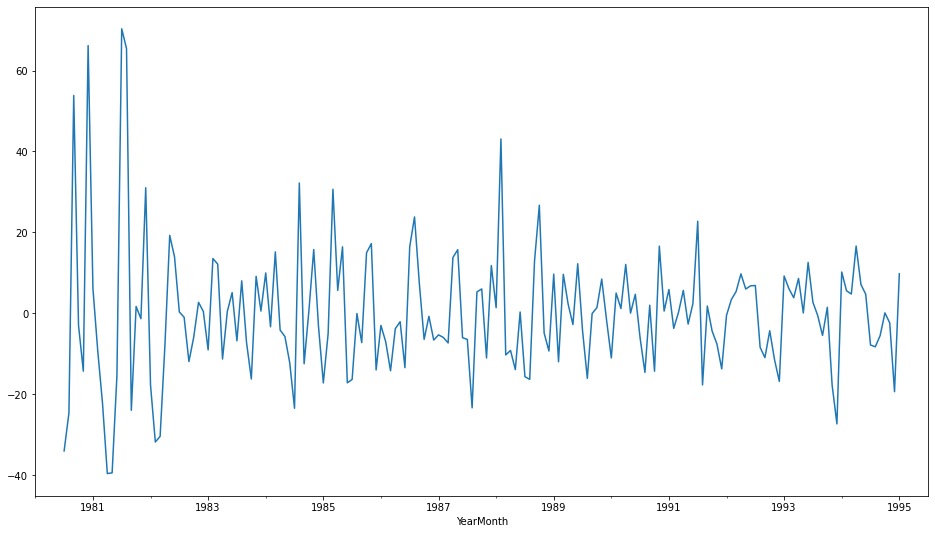

In [350]:
residual.plot()

### Additive Decomposition of Sparkling

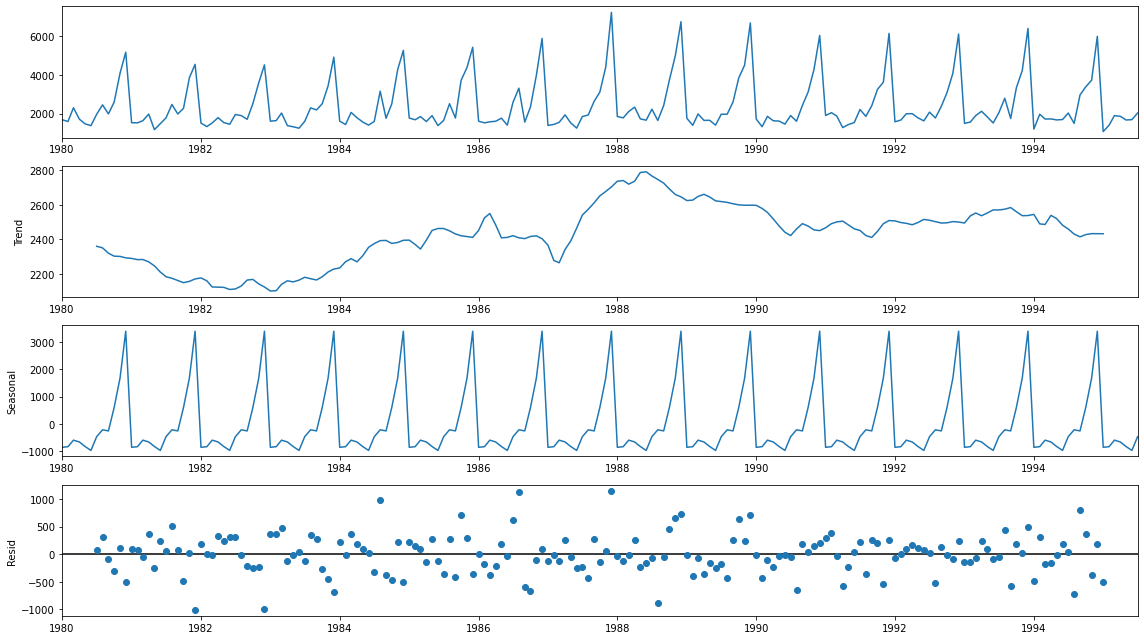

In [351]:
decompositions = seasonal_decompose(dfs,model='additive')
decompositions.plot();
plt.savefig('decomposes.jpg', bbox_inches='tight');



In [352]:
trend = decompositions.trend
seasonality = decompositions.seasonal
residual = decompositions.resid

print('Trend','\n',trend.head(12),'\n')
print('Seasonality','\n',seasonality.head(12),'\n')
print('Residual','\n',residual.head(12),'\n')

trend.head(12).to_csv('spark_trend.csv')
seasonality.head(12).to_csv('spark_season.csv')
residual.head(12).to_csv('spark_resid.csv')

Trend 
 YearMonth
1980-01-01            NaN
1980-02-01            NaN
1980-03-01            NaN
1980-04-01            NaN
1980-05-01            NaN
1980-06-01            NaN
1980-07-01    2360.666667
1980-08-01    2351.333333
1980-09-01    2320.541667
1980-10-01    2303.583333
1980-11-01    2302.041667
1980-12-01    2293.791667
Name: trend, dtype: float64 

Seasonality 
 YearMonth
1980-01-01    -854.260599
1980-02-01    -830.350678
1980-03-01    -592.356630
1980-04-01    -658.490559
1980-05-01    -824.416154
1980-06-01    -967.434011
1980-07-01    -465.502265
1980-08-01    -214.332821
1980-09-01    -254.677265
1980-10-01     599.769957
1980-11-01    1675.067179
1980-12-01    3386.983846
Name: seasonal, dtype: float64 

Residual 
 YearMonth
1980-01-01           NaN
1980-02-01           NaN
1980-03-01           NaN
1980-04-01           NaN
1980-05-01           NaN
1980-06-01           NaN
1980-07-01     70.835599
1980-08-01    315.999487
1980-09-01    -81.864401
1980-10-01   -307.353290


In [353]:
cvsa = residual.std()/residual.mean()
cvsa

-296.08335294142995

### Multiplicative Decomposition of Rose

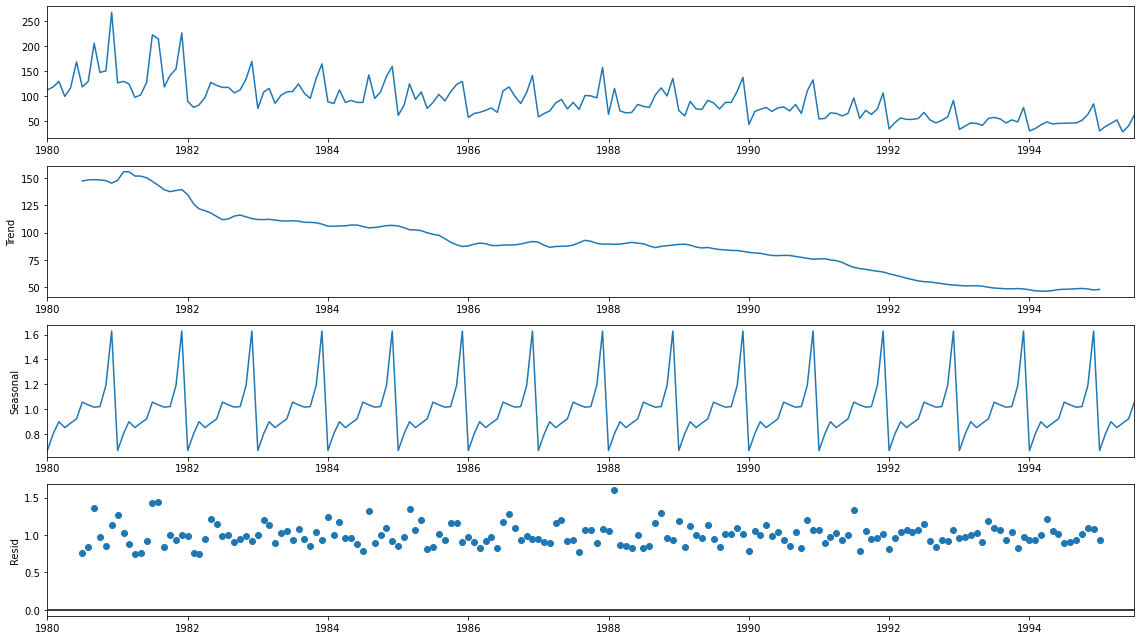

In [354]:
decompositionmr = seasonal_decompose(dfr,model='multiplicative')
decompositionmr.plot();
plt.savefig('decomposemr.jpg', bbox_inches='tight');

In [355]:
trend = decompositionmr.trend
seasonality = decompositionmr.seasonal
residual = decompositionmr.resid

print('Trend','\n',trend.head(12),'\n')
print('Seasonality','\n',seasonality.head(12),'\n')
print('Residual','\n',residual.head(12),'\n')

trend.head(12).to_csv('rose_trend_m.csv')
seasonality.head(12).to_csv('rose_season_m.csv')
residual.head(12).to_csv('rose_resid_m.csv')

Trend 
 YearMonth
1980-01-01           NaN
1980-02-01           NaN
1980-03-01           NaN
1980-04-01           NaN
1980-05-01           NaN
1980-06-01           NaN
1980-07-01    147.083333
1980-08-01    148.125000
1980-09-01    148.375000
1980-10-01    148.083333
1980-11-01    147.416667
1980-12-01    145.125000
Name: trend, dtype: float64 

Seasonality 
 YearMonth
1980-01-01    0.670111
1980-02-01    0.806163
1980-03-01    0.901164
1980-04-01    0.854024
1980-05-01    0.889415
1980-06-01    0.923985
1980-07-01    1.058038
1980-08-01    1.035881
1980-09-01    1.017648
1980-10-01    1.022573
1980-11-01    1.192349
1980-12-01    1.628646
Name: seasonal, dtype: float64 

Residual 
 YearMonth
1980-01-01         NaN
1980-02-01         NaN
1980-03-01         NaN
1980-04-01         NaN
1980-05-01         NaN
1980-06-01         NaN
1980-07-01    0.758258
1980-08-01    0.840720
1980-09-01    1.357674
1980-10-01    0.970771
1980-11-01    0.853378
1980-12-01    1.129646
Name: resid, dtype: fl

<AxesSubplot:xlabel='YearMonth'>

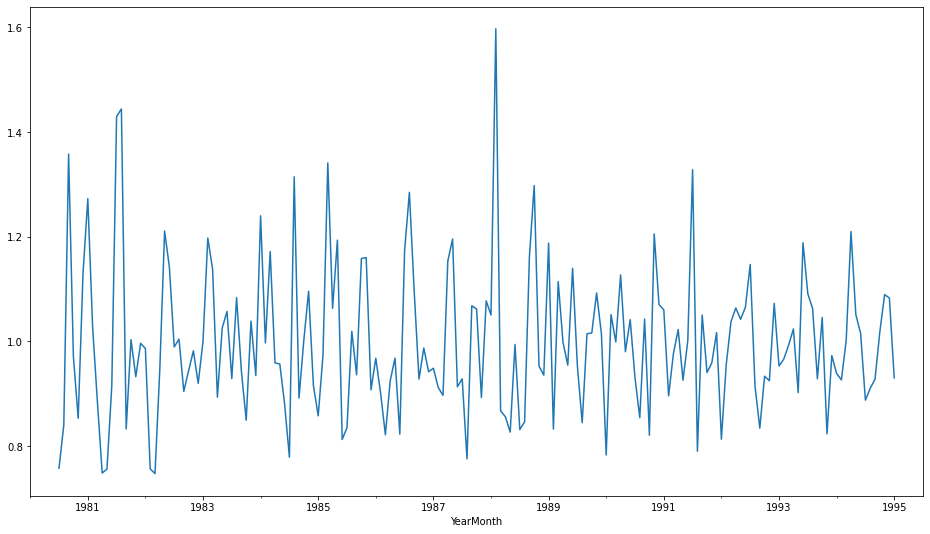

In [356]:
residual.plot()

For the multiplicative series, we see that a lot of residuals are located around 1.

### Multiplicative Decomposition of Sparkling

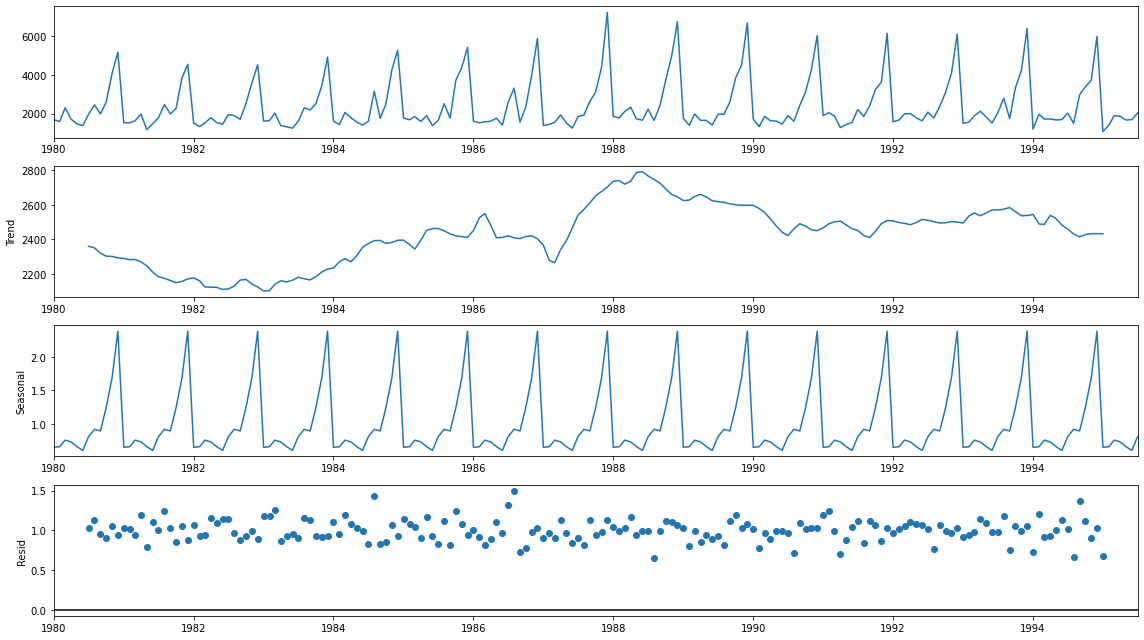

In [357]:
decompositionms = seasonal_decompose(dfs,model='multiplicative')
decompositionms.plot();
plt.savefig('decomposems.jpg', bbox_inches='tight');

In [358]:
trend = decompositionms.trend
seasonality = decompositionms.seasonal
residual = decompositionms.resid

print('Trend','\n',trend.head(12),'\n')
print('Seasonality','\n',seasonality.head(12),'\n')
print('Residual','\n',residual.head(12),'\n')

trend.head(12).to_csv('spark_trend_m.csv')
seasonality.head(12).to_csv('spark_season_m.csv')
residual.head(12).to_csv('spark_resid_m.csv')

Trend 
 YearMonth
1980-01-01            NaN
1980-02-01            NaN
1980-03-01            NaN
1980-04-01            NaN
1980-05-01            NaN
1980-06-01            NaN
1980-07-01    2360.666667
1980-08-01    2351.333333
1980-09-01    2320.541667
1980-10-01    2303.583333
1980-11-01    2302.041667
1980-12-01    2293.791667
Name: trend, dtype: float64 

Seasonality 
 YearMonth
1980-01-01    0.649843
1980-02-01    0.659214
1980-03-01    0.757440
1980-04-01    0.730351
1980-05-01    0.660609
1980-06-01    0.603468
1980-07-01    0.809164
1980-08-01    0.918822
1980-09-01    0.894367
1980-10-01    1.241789
1980-11-01    1.690158
1980-12-01    2.384776
Name: seasonal, dtype: float64 

Residual 
 YearMonth
1980-01-01         NaN
1980-02-01         NaN
1980-03-01         NaN
1980-04-01         NaN
1980-05-01         NaN
1980-06-01         NaN
1980-07-01    1.029230
1980-08-01    1.135407
1980-09-01    0.955954
1980-10-01    0.907513
1980-11-01    1.050423
1980-12-01    0.946770
Name: resi

In [359]:
cvsm = residual.std()/residual.mean()
cvsm

0.13886244212828963

## Split the data into train and test and plot the training and test data. [Test Data should start from 1991]

In [360]:
# ROSE DATA SPLIT

rtrain = dfr[dfr.index<'1991'] 
rtest = dfr[dfr.index>='1991']

In [361]:
# SPARKLING DATA SPLIT

strain = dfs[dfs.index<'1991'] 
stest = dfs[dfs.index>='1991']

In [362]:
print(rtrain.shape)
print(rtest.shape)

(132, 1)
(55, 1)


In [363]:
print(strain.shape)
print(stest.shape)

(132, 1)
(55, 1)


In [364]:
from IPython.display import display

In [365]:
# ROSE DATA TRAIN AND TEST

print('First few rows of Rose Training Data')
display(rtrain.head())
print('Last few rows of Rose Training Data')
display(rtrain.tail())
print('First few rows of Rose Test Data')
display(rtest.head())
print('Last few rows of Rose Test Data')
display(rtest.tail())

rtrain.to_csv('rose_train.csv')
rtest.to_csv('rose_test.csv')

First few rows of Rose Training Data


Rose
YearMonth        
1980-01-01  112.0
1980-02-01  118.0
1980-03-01  129.0
1980-04-01   99.0
1980-05-01  116.0

Last few rows of Rose Training Data


Rose
YearMonth        
1990-08-01   70.0
1990-09-01   83.0
1990-10-01   65.0
1990-11-01  110.0
1990-12-01  132.0

First few rows of Rose Test Data


Rose
YearMonth       
1991-01-01  54.0
1991-02-01  55.0
1991-03-01  66.0
1991-04-01  65.0
1991-05-01  60.0

Last few rows of Rose Test Data


Rose
YearMonth       
1995-03-01  45.0
1995-04-01  52.0
1995-05-01  28.0
1995-06-01  40.0
1995-07-01  62.0

In [366]:
# SPARKLING DATA TRAIN AND TEST

print('First few rows of Sparkling Training Data')
display(strain.head())
print('Last few rows of Sparkling Training Data')
display(strain.tail())
print('First few rows of Sparkling Test Data')
display(stest.head())
print('Last few rows of Sparkling Test Data')
display(stest.tail())

strain.to_csv('spark_train.csv')
stest.to_csv('spark_test.csv')

First few rows of Sparkling Training Data


Sparkling
YearMonth            
1980-01-01       1686
1980-02-01       1591
1980-03-01       2304
1980-04-01       1712
1980-05-01       1471

Last few rows of Sparkling Training Data


Sparkling
YearMonth            
1990-08-01       1605
1990-09-01       2424
1990-10-01       3116
1990-11-01       4286
1990-12-01       6047

First few rows of Sparkling Test Data


Sparkling
YearMonth            
1991-01-01       1902
1991-02-01       2049
1991-03-01       1874
1991-04-01       1279
1991-05-01       1432

Last few rows of Sparkling Test Data


Sparkling
YearMonth            
1995-03-01       1897
1995-04-01       1862
1995-05-01       1670
1995-06-01       1688
1995-07-01       2031

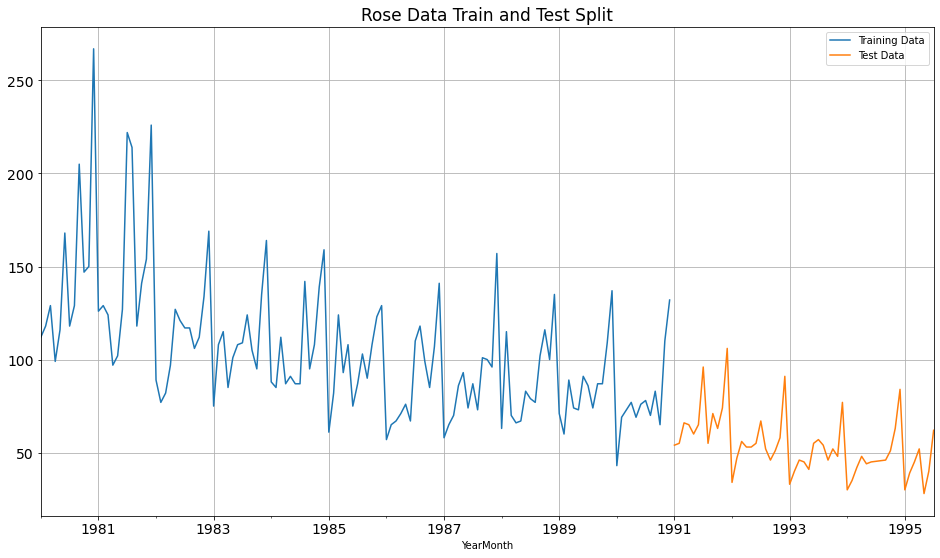

In [367]:
# ROSE DATA TRAIN TEST SPLIT TIME SERIES

rtrain['Rose'].plot(fontsize=14)
rtest['Rose'].plot(fontsize=14)
plt.grid()
plt.legend(['Training Data','Test Data'])
plt.title('Rose Data Train and Test Split', fontsize=17)
plt.savefig('rose_split_ts.jpg', bbox_inches='tight')
plt.show();

<AxesSubplot:xlabel='YearMonth'>

<AxesSubplot:xlabel='YearMonth'>

Text(0.5, 1.0, 'Sparkling Data Train and Test Split')

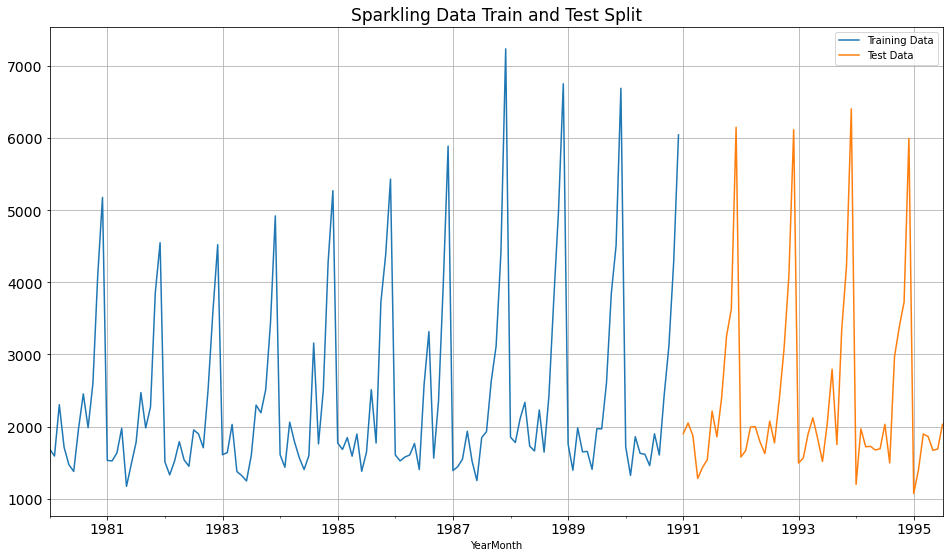

In [368]:
# SPARKLING DATA TRAIN TEST SPLIT TIME SERIES

strain['Sparkling'].plot(fontsize=14)
stest['Sparkling'].plot(fontsize=14)
plt.grid()
plt.legend(['Training Data','Test Data'])
plt.title('Sparkling Data Train and Test Split', fontsize=17)
plt.savefig('spark_split_ts.jpg', bbox_inches='tight')
plt.show()

# Building different models and comparing the accuracy metrics.

## Model 1: Linear Regression on Rose

#### For this particular linear regression, we are going to regress the 'Rose' variable against the order of the occurrence. For this we need to modify our training data before fitting it into a linear regression.

In [369]:
rtrain.shape
rtest.shape

(132, 1)

(55, 1)

In [370]:
train_time = [i+1 for i in range(len(rtrain))]
test_time = [i+133 for i in range(len(rtest))]
print('Training Time Instance :','\n',train_time)
print('Test Time Instance :','\n',test_time)

Training Time Instance : 
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132]
Test Time Instance : 
 [133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187]


We see that we have successfully the generated the numerical time instance order for both the training and test set. Now we will add these values in the training and test set.

In [371]:
LinearRegression_train = rtrain.copy()
LinearRegression_test = rtest.copy()

In [372]:
LinearRegression_train['time'] = train_time
LinearRegression_test['time'] = test_time

print('First few rows of Training Data')
display(LinearRegression_train.head())
print('Last few rows of Training Data')
display(LinearRegression_train.tail())
print('First few rows of Test Data')
display(LinearRegression_test.head())
print('Last few rows of Test Data')
display(LinearRegression_test.tail())

First few rows of Training Data


Rose  time
YearMonth              
1980-01-01  112.0     1
1980-02-01  118.0     2
1980-03-01  129.0     3
1980-04-01   99.0     4
1980-05-01  116.0     5

Last few rows of Training Data


Rose  time
YearMonth              
1990-08-01   70.0   128
1990-09-01   83.0   129
1990-10-01   65.0   130
1990-11-01  110.0   131
1990-12-01  132.0   132

First few rows of Test Data


Rose  time
YearMonth             
1991-01-01  54.0   133
1991-02-01  55.0   134
1991-03-01  66.0   135
1991-04-01  65.0   136
1991-05-01  60.0   137

Last few rows of Test Data


Rose  time
YearMonth             
1995-03-01  45.0   183
1995-04-01  52.0   184
1995-05-01  28.0   185
1995-06-01  40.0   186
1995-07-01  62.0   187

Now that our training and test data has been modified, let us go ahead use $\underline{Linear Regression}$ to build the model on the training data and test the model on the test data.

In [373]:
from sklearn.linear_model import LinearRegression

In [374]:
lr = LinearRegression()

In [375]:
lr.fit(LinearRegression_train[['time']],LinearRegression_train['Rose'])

LinearRegression()

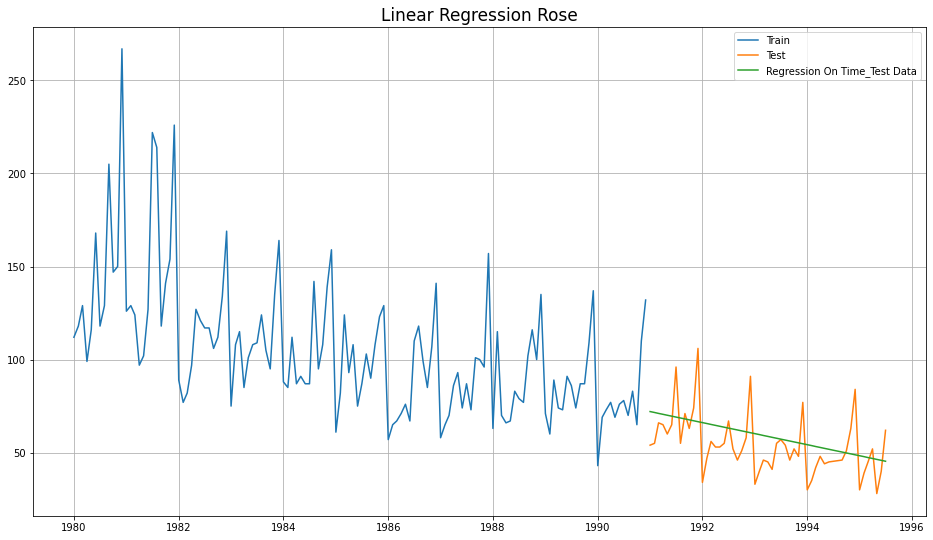

In [376]:
train_predictions_model1         = lr.predict(LinearRegression_train[['time']])
LinearRegression_train['RegOnTime'] = train_predictions_model1

test_predictions_model1         = lr.predict(LinearRegression_test[['time']])
LinearRegression_test['RegOnTime'] = test_predictions_model1

plt.plot(rtrain['Rose'], label='Train')
plt.plot(rtest['Rose'], label='Test')
plt.plot(LinearRegression_test['RegOnTime'], label='Regression On Time_Test Data')
plt.title('Linear Regression Rose', fontsize=17)
plt.legend(loc='best')
plt.grid();
plt.savefig('lr_rose.jpg', bbox_inches='tight');

#### Defining the functions for calculating the accuracy metrics.

In [377]:
from sklearn import metrics

### Model Evaluation

In [378]:
rmse_model11_test = metrics.mean_squared_error(rtest['Rose'],test_predictions_model1,squared=False)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f " %(rmse_model11_test))

For RegressionOnTime forecast on the Test Data,  RMSE is 15.269 


In [379]:
resultsDf = pd.DataFrame({'Test RMSE Rose': [rmse_model11_test]},index=['RegressionOnTime'])
resultsDf

Test RMSE Rose
RegressionOnTime       15.268955

## Model 1: Linear Regression Sparkling

In [380]:
train_time = [i+1 for i in range(len(strain))]
test_time = [i+133 for i in range(len(stest))]
print('Training Time instance','\n',train_time)
print('Test Time instance','\n',test_time)

Training Time instance 
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132]
Test Time instance 
 [133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187]


We see that we have successfully the generated the numerical time instance order for both the training and test set. Now we will add these values in the training and test set.

In [381]:
LinearRegression_train = strain.copy()
LinearRegression_test = stest.copy()

In [382]:
LinearRegression_train['time'] = train_time
LinearRegression_test['time'] = test_time

print('First few rows of Training Data')
display(LinearRegression_train.head())
print('Last few rows of Training Data')
display(LinearRegression_train.tail())
print('First few rows of Test Data')
display(LinearRegression_test.head())
print('Last few rows of Test Data')
display(LinearRegression_test.tail())

First few rows of Training Data


Sparkling  time
YearMonth                  
1980-01-01       1686     1
1980-02-01       1591     2
1980-03-01       2304     3
1980-04-01       1712     4
1980-05-01       1471     5

Last few rows of Training Data


Sparkling  time
YearMonth                  
1990-08-01       1605   128
1990-09-01       2424   129
1990-10-01       3116   130
1990-11-01       4286   131
1990-12-01       6047   132

First few rows of Test Data


Sparkling  time
YearMonth                  
1991-01-01       1902   133
1991-02-01       2049   134
1991-03-01       1874   135
1991-04-01       1279   136
1991-05-01       1432   137

Last few rows of Test Data


Sparkling  time
YearMonth                  
1995-03-01       1897   183
1995-04-01       1862   184
1995-05-01       1670   185
1995-06-01       1688   186
1995-07-01       2031   187

Now that our training and test data has been modified, let us go ahead use $\underline{Linear Regression}$ to build the model on the training data and test the model on the test data.

In [383]:
from sklearn.linear_model import LinearRegression

In [384]:
lr = LinearRegression()

In [385]:
lr.fit(LinearRegression_train[['time']],LinearRegression_train['Sparkling'])

LinearRegression()

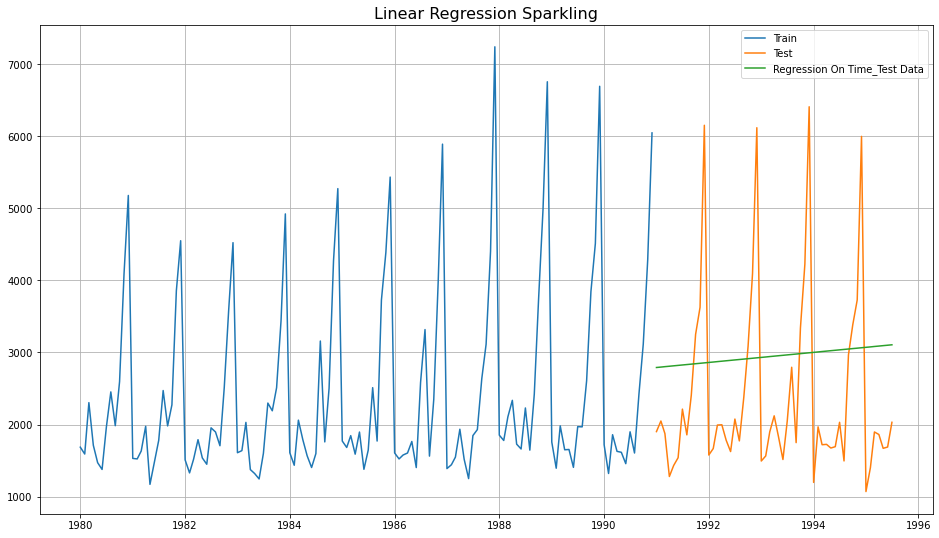

In [386]:
train_predictions_model1         = lr.predict(LinearRegression_train[['time']])
LinearRegression_train['RegOnTime'] = train_predictions_model1

test_predictions_model1         = lr.predict(LinearRegression_test[['time']])
LinearRegression_test['RegOnTime'] = test_predictions_model1

plt.plot(strain['Sparkling'], label='Train')
plt.plot(stest['Sparkling'], label='Test')
plt.plot(LinearRegression_test['RegOnTime'], label='Regression On Time_Test Data')

plt.legend(loc='best')
plt.title('Linear Regression Sparkling', fontsize=16)
plt.grid();
plt.savefig('spark_lr.jpg', bbox_inches='tight');

#### Defining the functions for calculating the accuracy metrics.

In [387]:
from sklearn import metrics

### Model Evaluation

In [388]:
rmse_model12_test = metrics.mean_squared_error(stest['Sparkling'],test_predictions_model1,squared=False)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f " %(rmse_model12_test))

For RegressionOnTime forecast on the Test Data,  RMSE is 1389.135 


In [389]:
resultsDf_12 = pd.DataFrame({'Test RMSE Sparkling': [rmse_model12_test]},index=['RegressionOnTime'])

resultsDf = pd.merge(resultsDf, resultsDf_12, left_index=True, right_index=True)
resultsDf.to_csv('results_lr.csv')
resultsDf


Test RMSE Rose  Test RMSE Sparkling
RegressionOnTime       15.268955          1389.135175

## Model 2: Naive Approach Rose : $\hat{y}_{t+1} = y_t$

#### For this particular naive model, we say that the prediction for tomorrow is the same as today and the prediction for day after tomorrow is tomorrow and since the prediction of tomorrow is same as today,therefore the prediction for day after tomorrow is also today.

In [390]:
NaiveModel_train = rtrain.copy()
NaiveModel_test = rtest.copy()

In [391]:
rtrain.tail()

Rose
YearMonth        
1990-08-01   70.0
1990-09-01   83.0
1990-10-01   65.0
1990-11-01  110.0
1990-12-01  132.0

In [392]:
NaiveModel_test['naive'] = np.asarray(rtrain['Rose'])[len(np.asarray(rtrain['Rose']))-1]
NaiveModel_test['naive'].head()

YearMonth
1991-01-01    132.0
1991-02-01    132.0
1991-03-01    132.0
1991-04-01    132.0
1991-05-01    132.0
Name: naive, dtype: float64

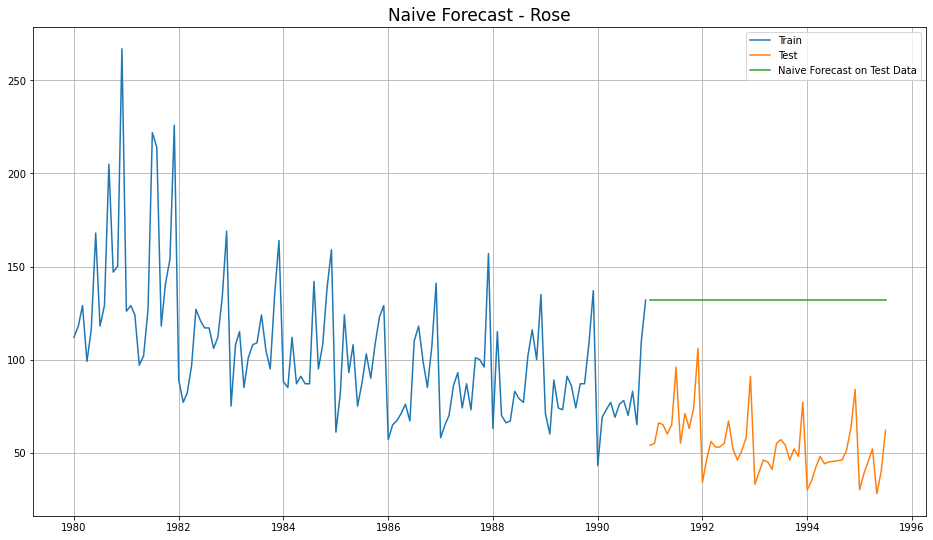

In [393]:
plt.plot(NaiveModel_train['Rose'], label='Train')
plt.plot(rtest['Rose'], label='Test')

plt.plot(NaiveModel_test['naive'], label='Naive Forecast on Test Data')

plt.legend(loc='best')
plt.title("Naive Forecast - Rose", fontsize=17)
plt.grid();
plt.savefig('rose_naive.jpg', bbox_inches='tight');

### Model Evaluation

In [394]:
rmse_model21_test = metrics.mean_squared_error(rtest['Rose'],NaiveModel_test['naive'],squared=False)
print("For NaiveModel forecast on the Test Data,  RMSE is %3.3f" %(rmse_model21_test))

For NaiveModel forecast on the Test Data,  RMSE is 79.719


In [395]:
resultsDf

Test RMSE Rose  Test RMSE Sparkling
RegressionOnTime       15.268955          1389.135175

In [396]:
resultsDf_21 = pd.DataFrame({'Test RMSE Rose': [rmse_model21_test]},index=['NaiveModel'])

# resultsDf = pd.concat([resultsDf, resultsDf_3], ignore_index=True)
# resultsDf

# resultsDf_3 = pd.DataFrame({'Test RMSE Rose': [rmse_model2_test]},index=['NaiveModel'])

# resultsDf.join(resultsDf_3, how='inner')

# resultsDf = pd.merge(resultsDf, resultsDf_21, left_index=True, right_index=True)
# resultsDf



## Model 2: Naive Approach Sparkling : $\hat{y}_{t+1} = y_t$

#### For this particular naive model, we say that the prediction for tomorrow is the same as today and the prediction for day after tomorrow is tomorrow and since the prediction of tomorrow is same as today,therefore the prediction for day after tomorrow is also today.

In [397]:
NaiveModel_train = strain.copy()
NaiveModel_test = stest.copy()

In [398]:
strain.tail()

Sparkling
YearMonth            
1990-08-01       1605
1990-09-01       2424
1990-10-01       3116
1990-11-01       4286
1990-12-01       6047

In [399]:
NaiveModel_test['naive'] = np.asarray(strain['Sparkling'])[len(np.asarray(strain['Sparkling']))-1]
NaiveModel_test['naive'].head()

YearMonth
1991-01-01    6047
1991-02-01    6047
1991-03-01    6047
1991-04-01    6047
1991-05-01    6047
Name: naive, dtype: int64

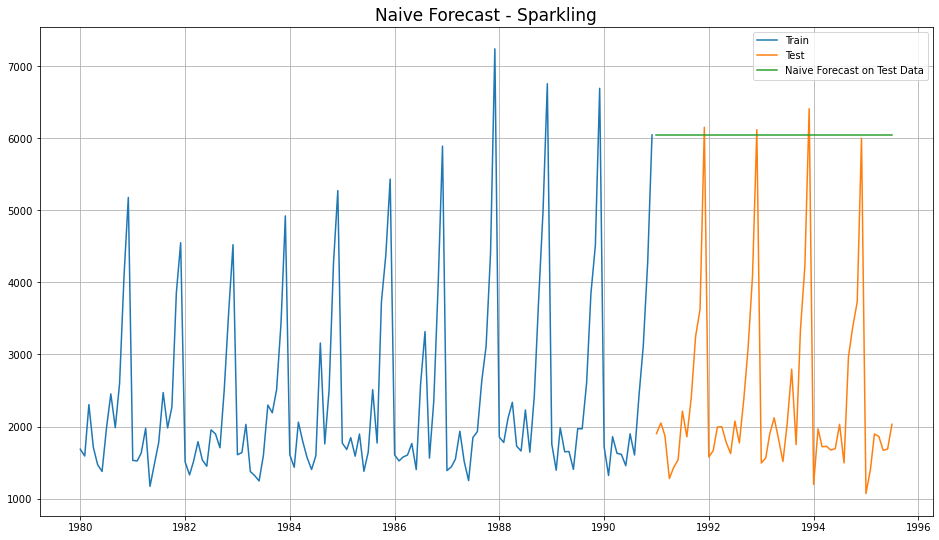

In [400]:
plt.plot(NaiveModel_train['Sparkling'], label='Train')
plt.plot(stest['Sparkling'], label='Test')

plt.plot(NaiveModel_test['naive'], label='Naive Forecast on Test Data')

plt.legend(loc='best')
plt.title("Naive Forecast - Sparkling", fontsize=17)
plt.grid();
plt.savefig('Sparkling_naive.jpg', bbox_inches='tight');

### Model Evaluation

In [401]:
rmse_model22_test = metrics.mean_squared_error(stest['Sparkling'],NaiveModel_test['naive'],squared=False)
print("For NaiveModel forecast on the Test Data,  RMSE is %3.3f" %(rmse_model22_test))

For NaiveModel forecast on the Test Data,  RMSE is 3864.279


In [402]:
resultsDf

Test RMSE Rose  Test RMSE Sparkling
RegressionOnTime       15.268955          1389.135175

In [403]:
resultsDf_21

Test RMSE Rose
NaiveModel       79.718773

In [404]:
resultsDf_22 = pd.DataFrame({'Test RMSE Sparkling': [rmse_model22_test]},index=['NaiveModel'])

# resultsDf = pd.concat([resultsDf, resultsDf_3], ignore_index=True)
# resultsDf

# resultsDf_3 = pd.DataFrame({'Test RMSE Rose': [rmse_model2_test]},index=['NaiveModel'])

# resultsDf.join(resultsDf_3, how='inner')

resultsDf1 = resultsDf_21.join(resultsDf_22, how='outer')
resultsDf1



Test RMSE Rose  Test RMSE Sparkling
NaiveModel       79.718773          3864.279352

In [405]:
resultsDf3 = pd.concat([resultsDf, resultsDf1], axis=0)
resultsDf3

Test RMSE Rose  Test RMSE Sparkling
RegressionOnTime       15.268955          1389.135175
NaiveModel             79.718773          3864.279352

In [406]:
resultsDf = resultsDf3.copy()
resultsDf.to_csv('results_nb.csv')
resultsDf

Test RMSE Rose  Test RMSE Sparkling
RegressionOnTime       15.268955          1389.135175
NaiveModel             79.718773          3864.279352

## Model 3: Simple Average Rose

#### For this particular simple average method, we will forecast by using the average of the training values.

In [407]:
SimpleAverage_train = rtrain.copy()
SimpleAverage_test = rtest.copy()

In [408]:
SimpleAverage_test['mean_forecast'] = rtrain['Rose'].mean()
SimpleAverage_test.head()

Rose  mean_forecast
YearMonth                      
1991-01-01  54.0     104.939394
1991-02-01  55.0     104.939394
1991-03-01  66.0     104.939394
1991-04-01  65.0     104.939394
1991-05-01  60.0     104.939394

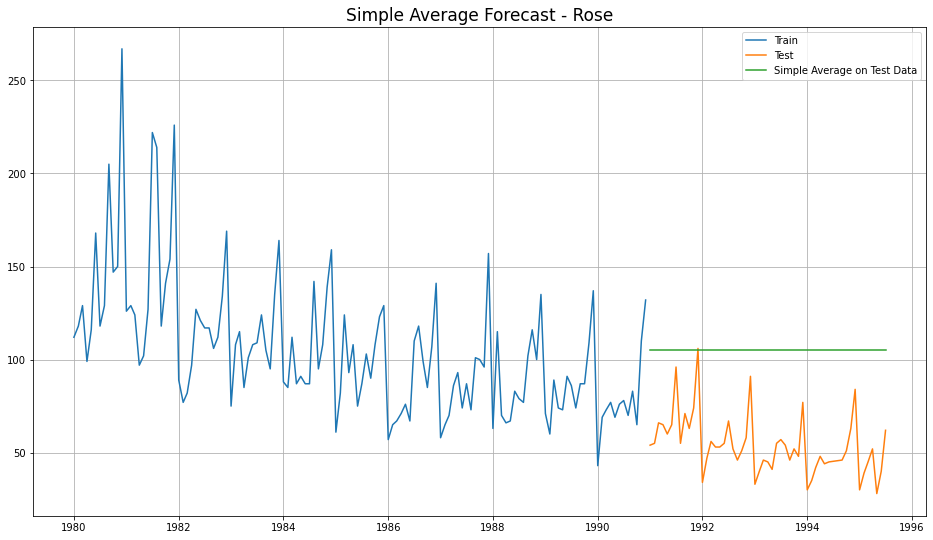

In [409]:
plt.plot(SimpleAverage_train['Rose'], label='Train')
plt.plot(SimpleAverage_test['Rose'], label='Test')

plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on Test Data')

plt.legend(loc='best')
plt.title("Simple Average Forecast - Rose", fontsize=17)
plt.grid();
plt.savefig('rose_simpleaverage.jpg', bbox_inches='tight');

### Model Evaluation

In [410]:
rmse_model31_test = metrics.mean_squared_error(rtest['Rose'],SimpleAverage_test['mean_forecast'],squared=False)
print("For Simple Average forecast on Rose Test Data,  RMSE is %3.3f" %(rmse_model31_test))

For Simple Average forecast on Rose Test Data,  RMSE is 53.461


In [411]:
resultsDf_31 = pd.DataFrame({'Test RMSE Rose': [rmse_model31_test]}
                           ,index=['SimpleAverageModel'])
resultsDf_31
# resultsDf = pd.concat([resultsDf, resultsDf_3])
# resultsDf

Test RMSE Rose
SimpleAverageModel        53.46057

## Model 3: Simple Average Sparkling

#### For this particular simple average method, we will forecast by using the average of the training values.

In [412]:
SimpleAverage_train = strain.copy()
SimpleAverage_test = stest.copy()

In [413]:
SimpleAverage_test['mean_forecast'] = strain['Sparkling'].mean()
SimpleAverage_test.head()

Sparkling  mean_forecast
YearMonth                           
1991-01-01       1902    2403.780303
1991-02-01       2049    2403.780303
1991-03-01       1874    2403.780303
1991-04-01       1279    2403.780303
1991-05-01       1432    2403.780303

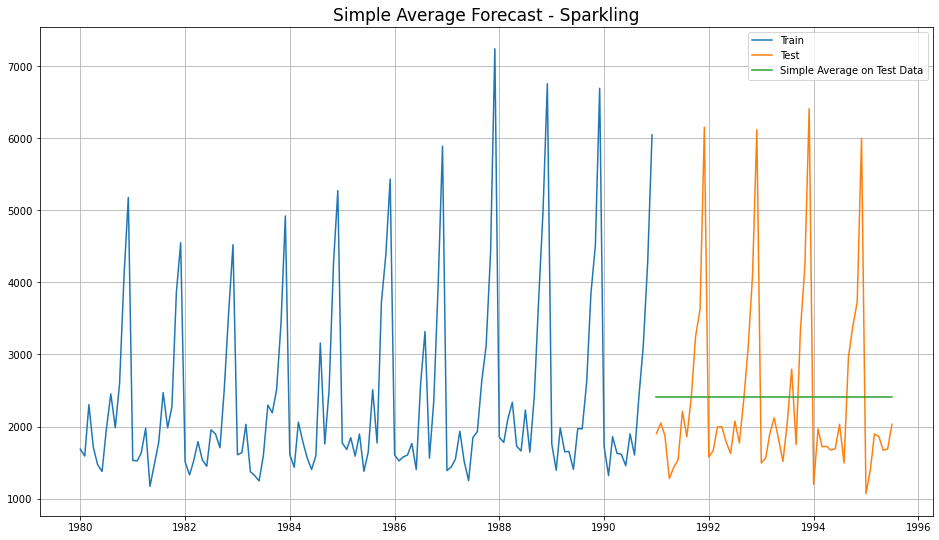

In [414]:
plt.plot(SimpleAverage_train['Sparkling'], label='Train')
plt.plot(SimpleAverage_test['Sparkling'], label='Test')

plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on Test Data')

plt.legend(loc='best')
plt.title("Simple Average Forecast - Sparkling", fontsize=17)
plt.grid();
plt.savefig('Sparkling_simpleaverage.jpg', bbox_inches='tight');

### Model Evaluation

In [415]:
rmse_model32_test = metrics.mean_squared_error(stest['Sparkling'],SimpleAverage_test['mean_forecast'],squared=False)
print("For Simple Average forecast on Sparkling Test Data,  RMSE is %3.3f" %(rmse_model32_test))

For Simple Average forecast on Sparkling Test Data,  RMSE is 1275.082


In [416]:
resultsDf_32 = pd.DataFrame({'Test RMSE Sparkling': [rmse_model32_test]}
                           ,index=['SimpleAverageModel'])
resultsDf_32
# resultsDf = pd.concat([resultsDf, resultsDf_3])
# resultsDf

Test RMSE Sparkling
SimpleAverageModel          1275.081804

In [417]:
resultsDf4 = resultsDf_31.join(resultsDf_32, how='outer')
resultsDf4

Test RMSE Rose  Test RMSE Sparkling
SimpleAverageModel        53.46057          1275.081804

In [418]:
resultsDf5 = pd.concat([resultsDf, resultsDf4], axis=0)
resultsDf5

Test RMSE Rose  Test RMSE Sparkling
RegressionOnTime         15.268955          1389.135175
NaiveModel               79.718773          3864.279352
SimpleAverageModel       53.460570          1275.081804

In [419]:
resultsDf = resultsDf5.copy()
resultsDf.to_csv('results_sa.csv')
resultsDf

Test RMSE Rose  Test RMSE Sparkling
RegressionOnTime         15.268955          1389.135175
NaiveModel               79.718773          3864.279352
SimpleAverageModel       53.460570          1275.081804

## Model 4: Moving Average(MA) - Rose

#### For the moving average model, we are going to calculate rolling means (or moving averages) for different intervals. The best interval can be determined by the maximum accuracy (or the minimum error) over here.

###### For Moving Average, we are going to average over the entire data.

In [420]:
MovingAverage = dfr.copy()
MovingAverage.head()

Rose
YearMonth        
1980-01-01  112.0
1980-02-01  118.0
1980-03-01  129.0
1980-04-01   99.0
1980-05-01  116.0

#### Trailing moving averages

In [421]:

MovingAverage['Trailing_2'] = MovingAverage['Rose'].rolling(2).mean()
MovingAverage['Trailing_4'] = MovingAverage['Rose'].rolling(4).mean()
MovingAverage['Trailing_6'] = MovingAverage['Rose'].rolling(6).mean()
MovingAverage['Trailing_9'] = MovingAverage['Rose'].rolling(9).mean()

MovingAverage.head()

Rose  Trailing_2  Trailing_4  Trailing_6  Trailing_9
YearMonth                                                        
1980-01-01  112.0         NaN         NaN         NaN         NaN
1980-02-01  118.0       115.0         NaN         NaN         NaN
1980-03-01  129.0       123.5         NaN         NaN         NaN
1980-04-01   99.0       114.0       114.5         NaN         NaN
1980-05-01  116.0       107.5       115.5         NaN         NaN

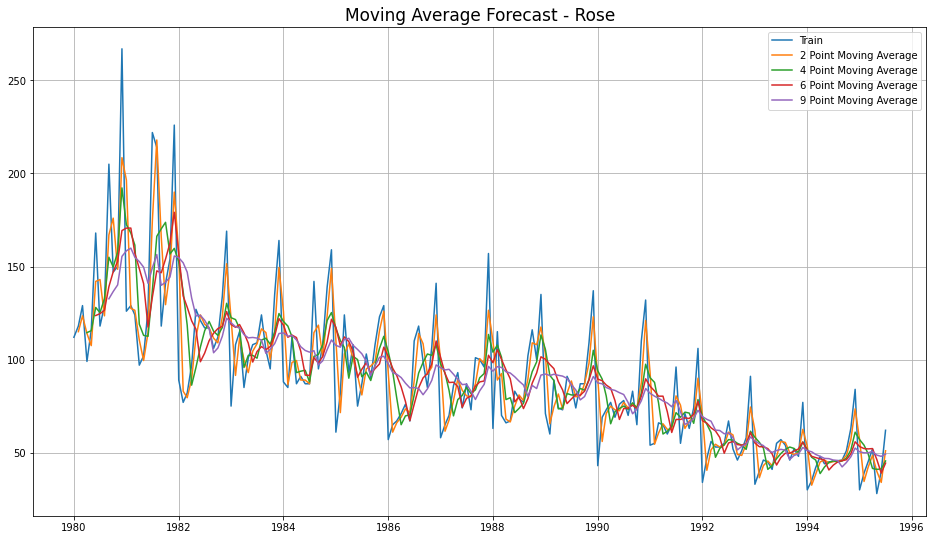

In [422]:
## Plotting on the whole data

plt.plot(MovingAverage['Rose'], label='Train')
plt.plot(MovingAverage['Trailing_2'], label='2 Point Moving Average')
plt.plot(MovingAverage['Trailing_4'], label='4 Point Moving Average')
plt.plot(MovingAverage['Trailing_6'],label = '6 Point Moving Average')
plt.plot(MovingAverage['Trailing_9'],label = '9 Point Moving Average')

plt.legend(loc = 'best')
plt.grid();
plt.title('Moving Average Forecast - Rose', fontsize=17)
plt.savefig('rose_ma.jpg', bbox_inches='tight');

Let us split the data into train and test and plot this Time Series. The window of the moving average is need to be carefully selected as too big a window will result in not having any test set as the whole series might get averaged over.

In [423]:
#Creating train and test set 
trailing_MovingAverage_train=MovingAverage[MovingAverage.index<'1991'] 
trailing_MovingAverage_test=MovingAverage[MovingAverage.index>='1991']

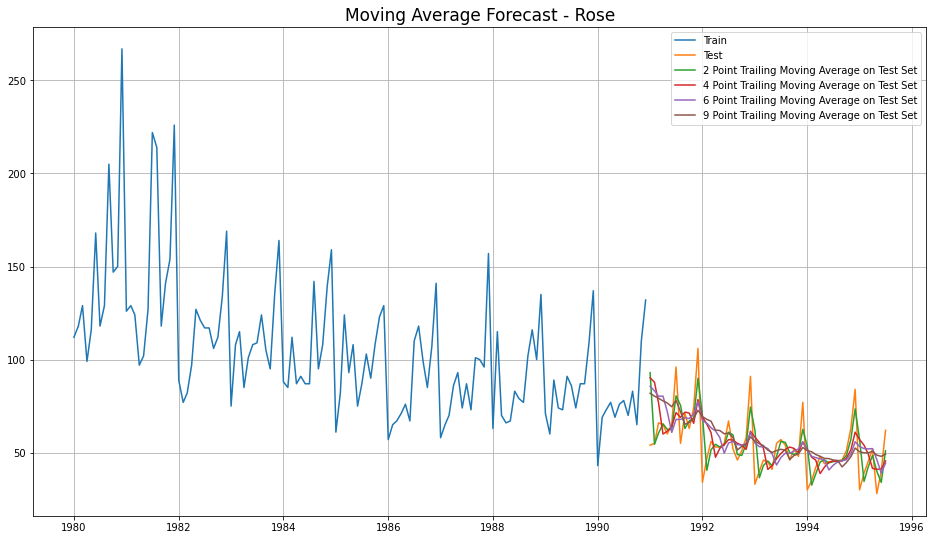

In [424]:
## Plotting on both the Training and Test data

plt.figure(figsize=(16,9))
plt.plot(trailing_MovingAverage_train['Rose'], label='Train')
plt.plot(trailing_MovingAverage_test['Rose'], label='Test')


plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_4'], label='4 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_6'],label = '6 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_9'],label = '9 Point Trailing Moving Average on Test Set')

plt.legend(loc = 'best')
plt.grid();
plt.title('Moving Average Forecast - Rose', fontsize=17);
plt.savefig('rose_ma_test.jpg', bbox_inches='tight');

### Model Evaluation

##### Done only on the test data.

In [425]:
## Test Data - RMSE  --> 2 point Trailing MA

rmse_model4_test_2 = metrics.mean_squared_error(rtest['Rose'],trailing_MovingAverage_test['Trailing_2'],squared=False)
print("For 2 point Moving Average Model forecast on Rose Training Data,  RMSE is %3.3f" %(rmse_model4_test_2))

## Test Data - RMSE --> 4 point Trailing MA

rmse_model4_test_4 = metrics.mean_squared_error(rtest['Rose'],trailing_MovingAverage_test['Trailing_4'],squared=False)
print("For 4 point Moving Average Model forecast on Rose Training Data,  RMSE is %3.3f" %(rmse_model4_test_4))

## Test Data - RMSE --> 6 point Trailing MA

rmse_model4_test_6 = metrics.mean_squared_error(rtest['Rose'],trailing_MovingAverage_test['Trailing_6'],squared=False)
print("For 6 point Moving Average Model forecast on Rose Training Data,  RMSE is %3.3f" %(rmse_model4_test_6))

## Test Data - RMSE --> 9 point Trailing MA

rmse_model4_test_9 = metrics.mean_squared_error(rtest['Rose'],trailing_MovingAverage_test['Trailing_9'],squared=False)
print("For 9 point Moving Average Model forecast on Rose Training Data,  RMSE is %3.3f" %(rmse_model4_test_9))

For 2 point Moving Average Model forecast on Rose Training Data,  RMSE is 11.529
For 4 point Moving Average Model forecast on Rose Training Data,  RMSE is 14.451
For 6 point Moving Average Model forecast on Rose Training Data,  RMSE is 14.566
For 9 point Moving Average Model forecast on Rose Training Data,  RMSE is 14.728


In [426]:
resultsDf_41 = pd.DataFrame({'Test RMSE Rose': [rmse_model4_test_2,rmse_model4_test_4
                                          ,rmse_model4_test_6,rmse_model4_test_9]}
                           ,index=['2pointTrailingMovingAverage','4pointTrailingMovingAverage'
                                   ,'6pointTrailingMovingAverage','9pointTrailingMovingAverage'])

resultsDf_41.to_csv('rose_ma.csv')
resultsDf_41

Test RMSE Rose
2pointTrailingMovingAverage       11.529278
4pointTrailingMovingAverage       14.451403
6pointTrailingMovingAverage       14.566327
9pointTrailingMovingAverage       14.727630

## Method 4: Moving Average(MA) - Sparkling

In [427]:
MovingAverage = dfs.copy()
MovingAverage.head()

Sparkling
YearMonth            
1980-01-01       1686
1980-02-01       1591
1980-03-01       2304
1980-04-01       1712
1980-05-01       1471

#### Trailing moving averages

In [428]:

MovingAverage['Trailing_2'] = MovingAverage['Sparkling'].rolling(2).mean()
MovingAverage['Trailing_4'] = MovingAverage['Sparkling'].rolling(4).mean()
MovingAverage['Trailing_6'] = MovingAverage['Sparkling'].rolling(6).mean()
MovingAverage['Trailing_9'] = MovingAverage['Sparkling'].rolling(9).mean()

MovingAverage.head()

Sparkling  Trailing_2  Trailing_4  Trailing_6  Trailing_9
YearMonth                                                            
1980-01-01       1686         NaN         NaN         NaN         NaN
1980-02-01       1591      1638.5         NaN         NaN         NaN
1980-03-01       2304      1947.5         NaN         NaN         NaN
1980-04-01       1712      2008.0     1823.25         NaN         NaN
1980-05-01       1471      1591.5     1769.50         NaN         NaN

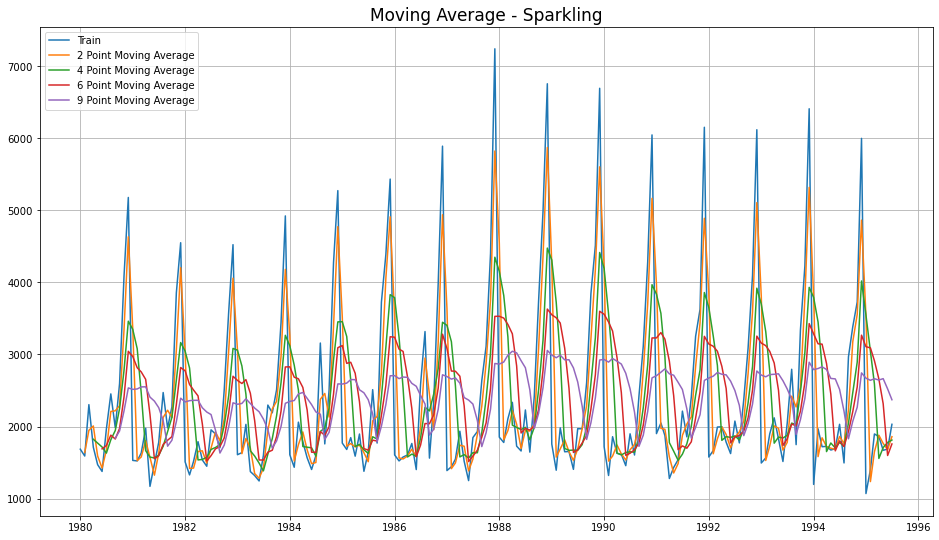

In [429]:
## Plotting on the whole data

plt.plot(MovingAverage['Sparkling'], label='Train')
plt.plot(MovingAverage['Trailing_2'], label='2 Point Moving Average')
plt.plot(MovingAverage['Trailing_4'], label='4 Point Moving Average')
plt.plot(MovingAverage['Trailing_6'],label = '6 Point Moving Average')
plt.plot(MovingAverage['Trailing_9'],label = '9 Point Moving Average')

plt.legend(loc = 'best')
plt.grid();
plt.title('Moving Average - Sparkling', fontsize=17)
plt.savefig('spark_ma.jpg', bbox_inches='tight');

Let us split the data into train and test and plot this Time Series. The window of the moving average is need to be carefully selected as too big a window will result in not having any test set as the whole series might get averaged over.

In [430]:
#Creating train and test set 
trailing_MovingAverage_train=MovingAverage[MovingAverage.index<'1991'] 
trailing_MovingAverage_test=MovingAverage[MovingAverage.index>='1991']

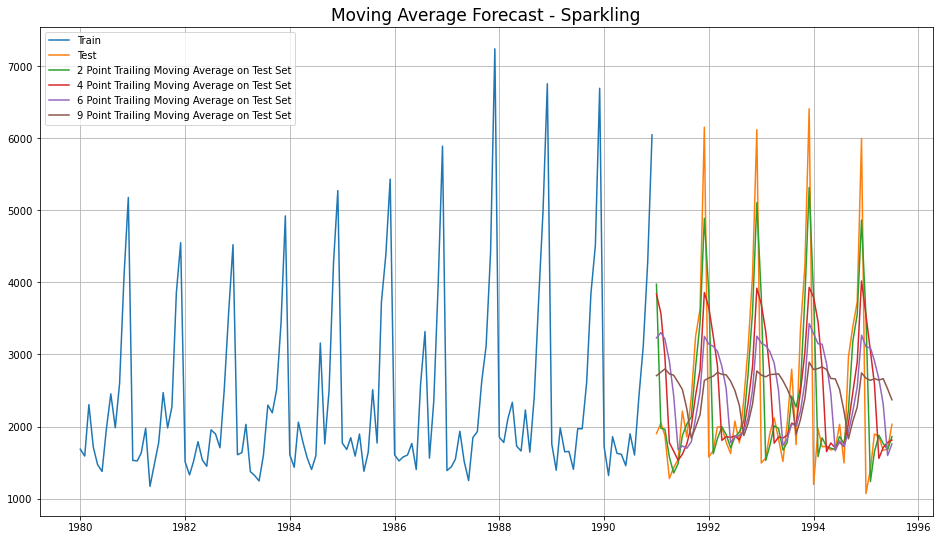

In [431]:
## Plotting on Test data

plt.figure(figsize=(16,9))
plt.plot(trailing_MovingAverage_train['Sparkling'], label='Train')
plt.plot(trailing_MovingAverage_test['Sparkling'], label='Test')


plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_4'], label='4 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_6'],label = '6 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_9'],label = '9 Point Trailing Moving Average on Test Set')

plt.legend(loc = 'best')
plt.grid();
plt.title('Moving Average Forecast - Sparkling', fontsize=17)
plt.savefig('spark_ma_test.jpg', bbox_inches='tight');

### Model Evaluation

##### Done only on the test data.

In [432]:
## Test Data - RMSE  --> 2 point Trailing MA

rmse_model4_test_2 = metrics.mean_squared_error(stest['Sparkling'],trailing_MovingAverage_test['Trailing_2'],squared=False)
print("For 2 point Moving Average Model forecast on Sparkling Training Data,  RMSE is %3.3f" %(rmse_model4_test_2))

## Test Data - RMSE --> 4 point Trailing MA

rmse_model4_test_4 = metrics.mean_squared_error(stest['Sparkling'],trailing_MovingAverage_test['Trailing_4'],squared=False)
print("For 4 point Moving Average Model forecast on Sparkling Training Data,  RMSE is %3.3f" %(rmse_model4_test_4))

## Test Data - RMSE --> 6 point Trailing MA

rmse_model4_test_6 = metrics.mean_squared_error(stest['Sparkling'],trailing_MovingAverage_test['Trailing_6'],squared=False)
print("For 6 point Moving Average Model forecast on Sparkling Training Data,  RMSE is %3.3f" %(rmse_model4_test_6))

## Test Data - RMSE --> 9 point Trailing MA

rmse_model4_test_9 = metrics.mean_squared_error(stest['Sparkling'],trailing_MovingAverage_test['Trailing_9'],squared=False)
print("For 9 point Moving Average Model forecast on Sparkling Training Data,  RMSE is %3.3f" %(rmse_model4_test_9))

For 2 point Moving Average Model forecast on Sparkling Training Data,  RMSE is 813.401
For 4 point Moving Average Model forecast on Sparkling Training Data,  RMSE is 1156.590
For 6 point Moving Average Model forecast on Sparkling Training Data,  RMSE is 1283.927
For 9 point Moving Average Model forecast on Sparkling Training Data,  RMSE is 1346.278


In [433]:
resultsDf_42 = pd.DataFrame({'Test RMSE Sparkling': [rmse_model4_test_2,rmse_model4_test_4
                                          ,rmse_model4_test_6,rmse_model4_test_9]}
                           ,index=['2pointTrailingMovingAverage','4pointTrailingMovingAverage'
                                   ,'6pointTrailingMovingAverage','9pointTrailingMovingAverage'])

resultsDf_42.to_csv('spark_ma.csv')
resultsDf_42

Test RMSE Sparkling
2pointTrailingMovingAverage           813.400684
4pointTrailingMovingAverage          1156.589694
6pointTrailingMovingAverage          1283.927428
9pointTrailingMovingAverage          1346.278315

In [434]:
resultsDf6 = resultsDf_41.join(resultsDf_42, how='outer')
resultsDf6

Test RMSE Rose  Test RMSE Sparkling
2pointTrailingMovingAverage       11.529278           813.400684
4pointTrailingMovingAverage       14.451403          1156.589694
6pointTrailingMovingAverage       14.566327          1283.927428
9pointTrailingMovingAverage       14.727630          1346.278315

In [435]:
resultsDf7 = pd.concat([resultsDf, resultsDf6], axis=0)
resultsDf7

Test RMSE Rose  Test RMSE Sparkling
RegressionOnTime                  15.268955          1389.135175
NaiveModel                        79.718773          3864.279352
SimpleAverageModel                53.460570          1275.081804
2pointTrailingMovingAverage       11.529278           813.400684
4pointTrailingMovingAverage       14.451403          1156.589694
6pointTrailingMovingAverage       14.566327          1283.927428
9pointTrailingMovingAverage       14.727630          1346.278315

In [436]:
resultsDf = resultsDf7.copy()
resultsDf.to_csv('results_ma.csv')
resultsDf

Test RMSE Rose  Test RMSE Sparkling
RegressionOnTime                  15.268955          1389.135175
NaiveModel                        79.718773          3864.279352
SimpleAverageModel                53.460570          1275.081804
2pointTrailingMovingAverage       11.529278           813.400684
4pointTrailingMovingAverage       14.451403          1156.589694
6pointTrailingMovingAverage       14.566327          1283.927428
9pointTrailingMovingAverage       14.727630          1346.278315

## Consolidated plots of All Models- Rose

In [437]:
# LR on Rose
train_time = [i+1 for i in range(len(rtrain))]
test_time = [i+133 for i in range(len(rtest))]
LinearRegression_train = rtrain.copy()
LinearRegression_test = rtest.copy()
LinearRegression_test['time'] = test_time
LinearRegression_train['time'] = train_time
lr = LinearRegression()
lr.fit(LinearRegression_train[['time']],LinearRegression_train['Rose'])
test_predictions_model1         = lr.predict(LinearRegression_test[['time']])
LinearRegression_test['RegOnTime'] = test_predictions_model1

# NB on Rose
NaiveModel_train = rtrain.copy()
NaiveModel_test = rtest.copy()
NaiveModel_test['naive'] = np.asarray(rtrain['Rose'])[len(np.asarray(rtrain['Rose']))-1]

# SA on Rose
SimpleAverage_train = rtrain.copy()
SimpleAverage_test = rtest.copy()
SimpleAverage_test['mean_forecast'] = rtrain['Rose'].mean()

# MA on Rose

MovingAverage = dfr.copy()
MovingAverage['Trailing_2'] = MovingAverage['Rose'].rolling(2).mean()
trailing_MovingAverage_test = MovingAverage[MovingAverage.index>='1991']


LinearRegression()

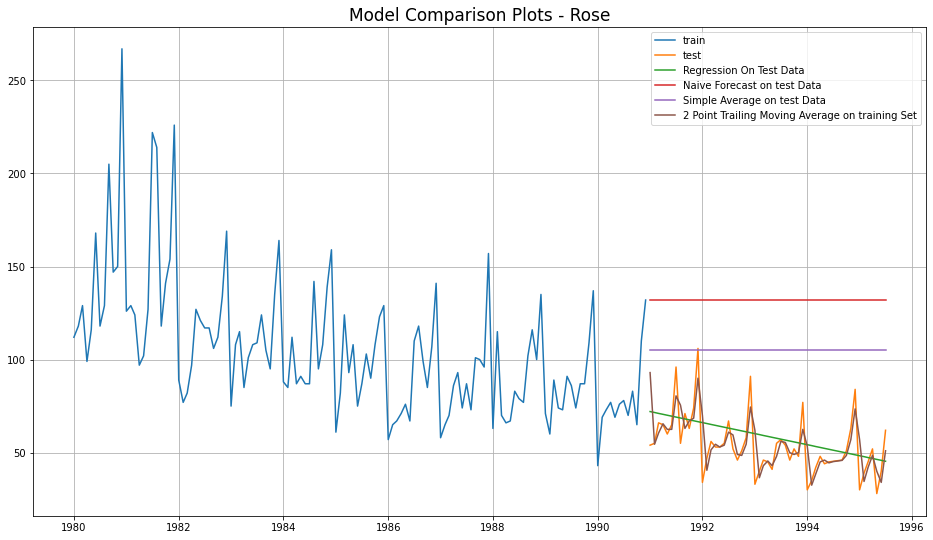

In [438]:
## Plotting on both rtraining and rtest data

plt.plot(rtrain['Rose'], label='train')
plt.plot(rtest['Rose'], label='test')

plt.plot(LinearRegression_test['RegOnTime'], label='Regression On Test Data')

plt.plot(NaiveModel_test['naive'], label='Naive Forecast on test Data')

plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on test Data')

plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on training Set')


plt.legend(loc='best')
plt.title("Model Comparison Plots - Rose", fontsize=17)
plt.grid();

## Consolidated plots of All Models- Sparkling

In [439]:
# LR on Sparkling
train_time = [i+1 for i in range(len(strain))]
test_time = [i+133 for i in range(len(stest))]
LinearRegression_train = strain.copy()
LinearRegression_test = stest.copy()
LinearRegression_test['time'] = test_time
LinearRegression_train['time'] = train_time
lr = LinearRegression()
lr.fit(LinearRegression_train[['time']],LinearRegression_train['Sparkling'])
test_predictions_model1         = lr.predict(LinearRegression_test[['time']])
LinearRegression_test['RegOnTime'] = test_predictions_model1

# NB on Sparkling
NaiveModel_train = strain.copy()
NaiveModel_test = stest.copy()
NaiveModel_test['naive'] = np.asarray(strain['Sparkling'])[len(np.asarray(strain['Sparkling']))-1]

# SA on Sparkling
SimpleAverage_train = strain.copy()
SimpleAverage_test = stest.copy()
SimpleAverage_test['mean_forecast'] = strain['Sparkling'].mean()

# MA on Sparkling

MovingAverage = dfs.copy()
MovingAverage['Trailing_2'] = MovingAverage['Sparkling'].rolling(2).mean()
trailing_MovingAverage_test = MovingAverage[MovingAverage.index>='1991']


LinearRegression()

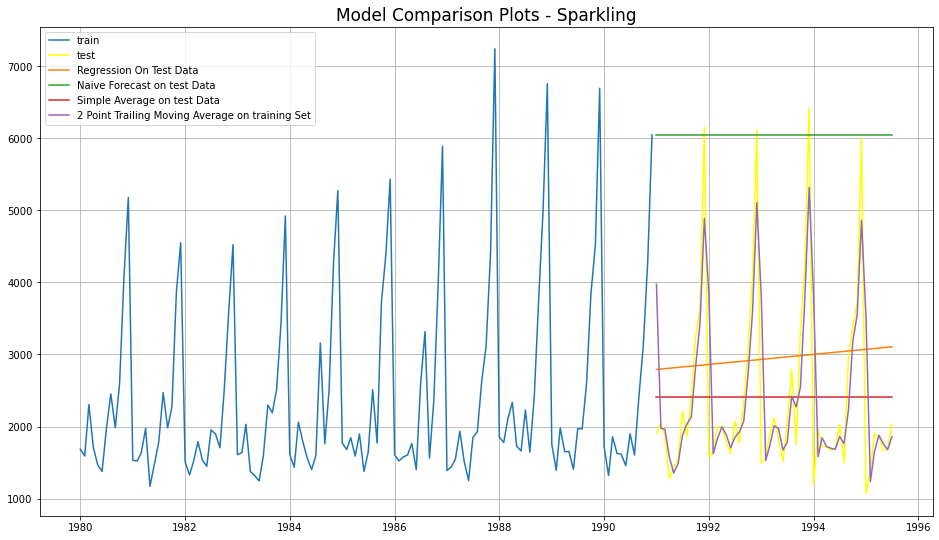

In [440]:
## Plotting on both rtraining and rtest data

plt.plot(strain['Sparkling'], label='train')
plt.plot(stest['Sparkling'], label='test', c='yellow')

plt.plot(LinearRegression_test['RegOnTime'], label='Regression On Test Data')

plt.plot(NaiveModel_test['naive'], label='Naive Forecast on test Data')

plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on test Data')

plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on training Set')


plt.legend(loc='best')
plt.title("Model Comparison Plots - Sparkling", fontsize=17)
plt.grid();

# Simple Exponential Smoothing, Holt's Model (Double Exponential Smoothing) & Holt-Winter's Model (Triple Exponential Smoothing)

In [441]:
# Importing the necessary packages

import statsmodels.tools.eval_measures as      em
from   statsmodels.tsa.api             import ExponentialSmoothing, SimpleExpSmoothing, Holt

## SES -  ETS(A, N, N) - Simple Exponential Smoothing with additive errors - ROSE


*SimpleExpSmoothing* class must be instantiated and passed the training data. 

The fit() function is then called providing the fit configuration, the alpha value, smoothing_level. 
If this is omitted or set to None, the model will automatically optimize the value.

In [442]:
# create class
model_SES = SimpleExpSmoothing(rtrain,initialization_method='estimated' )

/Users/chetan/DS/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [443]:
# Fitting the Simple Exponential Smoothing model and asking python to choose the optimal parameters
model_SES_autofit = model_SES.fit(optimized=True)

In [444]:
## Let us check the parameters

model_SES_autofit.params

{'smoothing_level': 0.09874920899865502,
 'smoothing_trend': nan,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 134.3871074301239,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

Here, Python has optimized the smoothing level to be almost 0.1

In [445]:
# Using the fitted model on the training set to forecast on the test set
SES_predict_rose = model_SES_autofit.forecast(steps=len(rtest))
SES_predict_rose

1991-01-01    87.10498
1991-02-01    87.10498
1991-03-01    87.10498
1991-04-01    87.10498
1991-05-01    87.10498
1991-06-01    87.10498
1991-07-01    87.10498
1991-08-01    87.10498
1991-09-01    87.10498
1991-10-01    87.10498
1991-11-01    87.10498
1991-12-01    87.10498
1992-01-01    87.10498
1992-02-01    87.10498
1992-03-01    87.10498
1992-04-01    87.10498
1992-05-01    87.10498
1992-06-01    87.10498
1992-07-01    87.10498
1992-08-01    87.10498
1992-09-01    87.10498
1992-10-01    87.10498
1992-11-01    87.10498
1992-12-01    87.10498
1993-01-01    87.10498
1993-02-01    87.10498
1993-03-01    87.10498
1993-04-01    87.10498
1993-05-01    87.10498
1993-06-01    87.10498
1993-07-01    87.10498
1993-08-01    87.10498
1993-09-01    87.10498
1993-10-01    87.10498
1993-11-01    87.10498
1993-12-01    87.10498
1994-01-01    87.10498
1994-02-01    87.10498
1994-03-01    87.10498
1994-04-01    87.10498
1994-05-01    87.10498
1994-06-01    87.10498
1994-07-01    87.10498
1994-08-01 

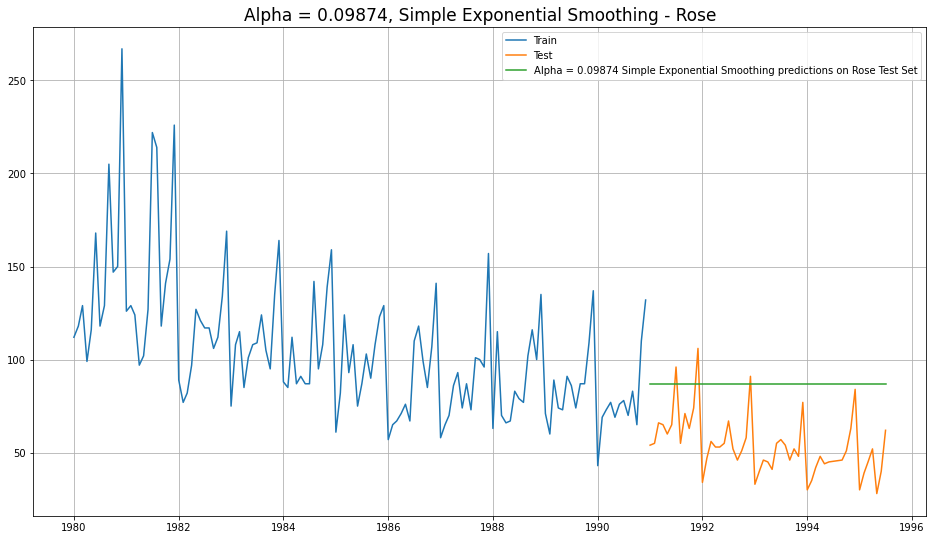

In [446]:
## Plotting the Training data, Test data and the forecasted values

plt.plot(rtrain, label='Train')
plt.plot(rtest, label='Test')

plt.plot(SES_predict_rose, label='Alpha = 0.09874 Simple Exponential Smoothing predictions on Rose Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Alpha = 0.09874, Simple Exponential Smoothing - Rose', fontsize=17);
plt.savefig('rose_ses.jpg', bbox_inches='tight');

In [447]:
## Mean Absolute Percentage Error (MAPE) - Function Definition

def MAPE(y_true, y_pred):
    return np.mean((np.abs(y_true-y_pred))/(y_true))*100

In [448]:
print('SES RMSE:',mean_squared_error(rtest.values,SES_predict_rose.values,squared=False))
#different way to calculate RMSE
print('SES RMSE (calculated using statsmodels):',em.rmse(rtest.values,SES_predict_rose.values)[0])

SES RMSE: 36.79622482462249
SES RMSE (calculated using statsmodels): 36.796224824622485


In [449]:
resultsDf_rses = pd.DataFrame({'Test RMSE Rose': [em.rmse(rtest.values,SES_predict_rose.values)[0]]},index=['Simple Exponential Smoothing'])
resultsDf_rses

Test RMSE Rose
Simple Exponential Smoothing       36.796225

## SES -  ETS(A, N, N) - Simple Exponential Smoothing with additive errors - SPARKLING


*SimpleExpSmoothing* class must be instantiated and passed the training data. 

The fit() function is then called providing the fit configuration, the alpha value, smoothing_level. 
If this is omitted or set to None, the model will automatically optimize the value.

In [450]:
# create class
model_SES = SimpleExpSmoothing(strain,initialization_method='estimated' )

/Users/chetan/DS/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [451]:
# Fitting the Simple Exponential Smoothing model and asking python to choose the optimal parameters
model_SES_autofit = model_SES.fit(optimized=True)

/Users/chetan/DS/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/holtwinters/model.py:922: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning,


In [452]:
## Let us check the parameters

model_SES_autofit.params

{'smoothing_level': 0.07028781460389563,
 'smoothing_trend': nan,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 1763.9269926897732,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [453]:
# Using the fitted model on the training set to forecast on the test set
SES_predict_spark = model_SES_autofit.forecast(steps=len(stest))
SES_predict_spark

1991-01-01    2804.662714
1991-02-01    2804.662714
1991-03-01    2804.662714
1991-04-01    2804.662714
1991-05-01    2804.662714
1991-06-01    2804.662714
1991-07-01    2804.662714
1991-08-01    2804.662714
1991-09-01    2804.662714
1991-10-01    2804.662714
1991-11-01    2804.662714
1991-12-01    2804.662714
1992-01-01    2804.662714
1992-02-01    2804.662714
1992-03-01    2804.662714
1992-04-01    2804.662714
1992-05-01    2804.662714
1992-06-01    2804.662714
1992-07-01    2804.662714
1992-08-01    2804.662714
1992-09-01    2804.662714
1992-10-01    2804.662714
1992-11-01    2804.662714
1992-12-01    2804.662714
1993-01-01    2804.662714
1993-02-01    2804.662714
1993-03-01    2804.662714
1993-04-01    2804.662714
1993-05-01    2804.662714
1993-06-01    2804.662714
1993-07-01    2804.662714
1993-08-01    2804.662714
1993-09-01    2804.662714
1993-10-01    2804.662714
1993-11-01    2804.662714
1993-12-01    2804.662714
1994-01-01    2804.662714
1994-02-01    2804.662714
1994-03-01  

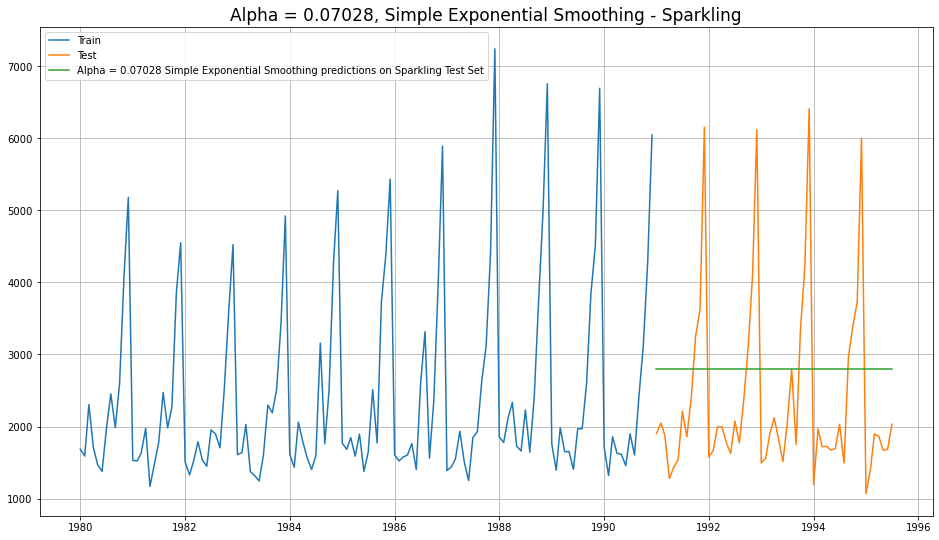

In [454]:
## Plotting the Training data, Test data and the forecasted values

plt.plot(strain, label='Train')
plt.plot(stest, label='Test')

plt.plot(SES_predict_spark, label='Alpha = 0.07028 Simple Exponential Smoothing predictions on Sparkling Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Alpha = 0.07028, Simple Exponential Smoothing - Sparkling', fontsize=17);
plt.savefig('spark_ses.jpg', bbox_inches='tight');

In [455]:
## Mean Absolute Percentage Error (MAPE) - Function Definition

def MAPE(y_true, y_pred):
    return np.mean((np.abs(y_true-y_pred))/(y_true))*100

In [456]:
print('SES RMSE:',mean_squared_error(stest.values,SES_predict_spark.values,squared=False))
#different way to calculate RMSE
print('SES RMSE (calculated using statsmodels):',em.rmse(rtest.values,SES_predict_spark.values)[0])

SES RMSE: 1338.0046232563645
SES RMSE (calculated using statsmodels): 2750.8533130338337


In [457]:
resultsDf_sses = pd.DataFrame({'Test RMSE Sparkling': [em.rmse(stest.values,SES_predict_spark.values)[0]]},index=['Simple Exponential Smoothing'])
resultsDf_sses

Test RMSE Sparkling
Simple Exponential Smoothing          1338.004623

In [458]:
resultsDf7 = resultsDf_rses.join(resultsDf_sses, how='outer')
resultsDf7

Test RMSE Rose  Test RMSE Sparkling
Simple Exponential Smoothing       36.796225          1338.004623

In [459]:
resultsDf8 = pd.concat([resultsDf, resultsDf7], axis=0)
resultsDf8

Test RMSE Rose  Test RMSE Sparkling
RegressionOnTime                   15.268955          1389.135175
NaiveModel                         79.718773          3864.279352
SimpleAverageModel                 53.460570          1275.081804
2pointTrailingMovingAverage        11.529278           813.400684
4pointTrailingMovingAverage        14.451403          1156.589694
6pointTrailingMovingAverage        14.566327          1283.927428
9pointTrailingMovingAverage        14.727630          1346.278315
Simple Exponential Smoothing       36.796225          1338.004623

In [460]:
resultsDf = resultsDf8.copy()

## Holt - ETS(A, A, N) - Holt's linear method with additive errors - Rose

## Double Exponential Smoothing - Rose

* One of the drawbacks of the simple exponential smoothing is that the model does not do well in the presence of the trend.
* This model is an extension of SES known as Double Exponential model which estimates two smoothing parameters.
* Applicable when data has Trend but no seasonality.
* Two separate components are considered: Level and Trend.
* Level is the local mean.
* One smoothing parameter α corresponds to the level series
* A second smoothing parameter β corresponds to the trend series.

In [461]:
# Initializing the Double Exponential Smoothing Model
model_DES = Holt(rtrain,initialization_method='estimated')
# Fitting the model
model_DES = model_DES.fit()

print('')
print('Holt model Exponential Smoothing Estimated Parameters :')
print('')
print(model_DES.params)


Holt model Exponential Smoothing Estimated Parameters :

{'smoothing_level': 1.4901161193847656e-08, 'smoothing_trend': 5.448169774560283e-09, 'smoothing_seasonal': nan, 'damping_trend': nan, 'initial_level': 137.81762949544608, 'initial_trend': -0.4943507283995123, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


/Users/chetan/DS/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [462]:
# Forecasting using this model for the duration of the test set
DES_predict_rose =  model_DES.forecast(len(rtest))
DES_predict_rose

1991-01-01    72.068983
1991-02-01    71.574632
1991-03-01    71.080281
1991-04-01    70.585930
1991-05-01    70.091580
1991-06-01    69.597229
1991-07-01    69.102878
1991-08-01    68.608528
1991-09-01    68.114177
1991-10-01    67.619826
1991-11-01    67.125475
1991-12-01    66.631125
1992-01-01    66.136774
1992-02-01    65.642423
1992-03-01    65.148072
1992-04-01    64.653722
1992-05-01    64.159371
1992-06-01    63.665020
1992-07-01    63.170669
1992-08-01    62.676319
1992-09-01    62.181968
1992-10-01    61.687617
1992-11-01    61.193267
1992-12-01    60.698916
1993-01-01    60.204565
1993-02-01    59.710214
1993-03-01    59.215864
1993-04-01    58.721513
1993-05-01    58.227162
1993-06-01    57.732811
1993-07-01    57.238461
1993-08-01    56.744110
1993-09-01    56.249759
1993-10-01    55.755409
1993-11-01    55.261058
1993-12-01    54.766707
1994-01-01    54.272356
1994-02-01    53.778006
1994-03-01    53.283655
1994-04-01    52.789304
1994-05-01    52.294953
1994-06-01    51

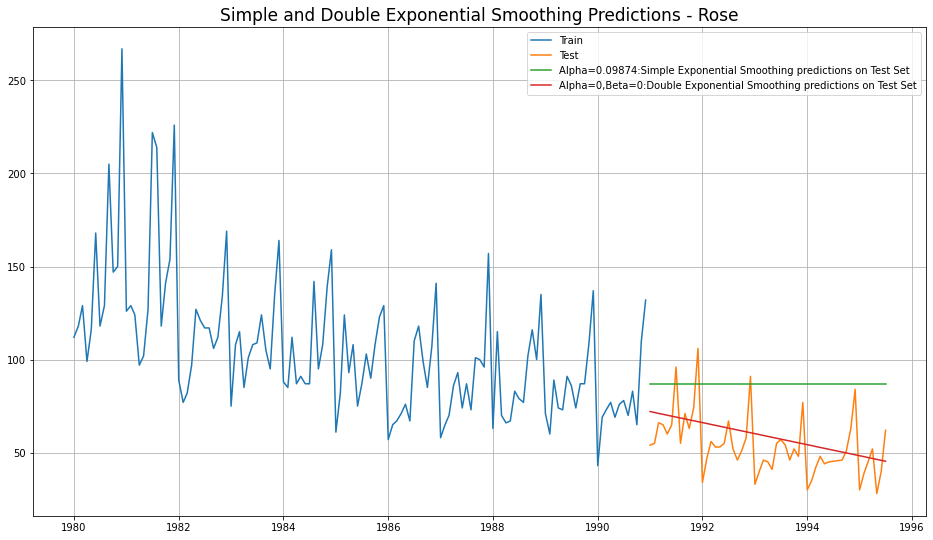

In [463]:
## Plotting the Training data, Test data and the forecasted values

plt.plot(rtrain, label='Train')
plt.plot(rtest, label='Test')

plt.plot(SES_predict_rose, label='Alpha=0.09874:Simple Exponential Smoothing predictions on Test Set')
plt.plot(DES_predict_rose, label='Alpha=0,Beta=0:Double Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Simple and Double Exponential Smoothing Predictions - Rose', fontsize=17);
plt.savefig('rose_rdes.jpg', bbox_inches='tight');

We see that the double exponential smoothing is picking up the trend component along with the level component as well.

In [464]:
print('DES RMSE:',mean_squared_error(rtest.values,DES_predict_rose.values,squared=False))

DES RMSE: 15.27096843395306


In [465]:
resultsDf_temp = pd.DataFrame({'Test RMSE Rose': [mean_squared_error(rtest.values,DES_predict_rose.values,squared=False)]}
                           ,index=['Double Exponential Smoothing'])

# resultsDf = pd.concat([resultsDf, resultsDf_temp])
resultsDf_temp

Test RMSE Rose
Double Exponential Smoothing       15.270968

## Holt - ETS(A, A, N) - Holt's linear method with additive errors - Sparkling

## Double Exponential Smoothing - Sparkling



In [466]:
# Initializing the Double Exponential Smoothing Model
model_DES = Holt(strain,initialization_method='estimated')
# Fitting the model
model_DES = model_DES.fit()

print('')
print('Holt model Exponential Smoothing Estimated Parameters :')
print('')
print(model_DES.params)


Holt model Exponential Smoothing Estimated Parameters :

{'smoothing_level': 0.6649999999999999, 'smoothing_trend': 0.0001, 'smoothing_seasonal': nan, 'damping_trend': nan, 'initial_level': 1502.1999999999998, 'initial_trend': 74.87272727272733, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


/Users/chetan/DS/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/chetan/DS/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/holtwinters/model.py:922: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning,


In [467]:
# Forecasting using this model for the duration of the test set
DES_predict_spark =  model_DES.forecast(len(stest))
DES_predict_spark

1991-01-01    5401.733026
1991-02-01    5476.005230
1991-03-01    5550.277433
1991-04-01    5624.549637
1991-05-01    5698.821840
1991-06-01    5773.094044
1991-07-01    5847.366248
1991-08-01    5921.638451
1991-09-01    5995.910655
1991-10-01    6070.182858
1991-11-01    6144.455062
1991-12-01    6218.727266
1992-01-01    6292.999469
1992-02-01    6367.271673
1992-03-01    6441.543876
1992-04-01    6515.816080
1992-05-01    6590.088284
1992-06-01    6664.360487
1992-07-01    6738.632691
1992-08-01    6812.904894
1992-09-01    6887.177098
1992-10-01    6961.449302
1992-11-01    7035.721505
1992-12-01    7109.993709
1993-01-01    7184.265912
1993-02-01    7258.538116
1993-03-01    7332.810320
1993-04-01    7407.082523
1993-05-01    7481.354727
1993-06-01    7555.626930
1993-07-01    7629.899134
1993-08-01    7704.171338
1993-09-01    7778.443541
1993-10-01    7852.715745
1993-11-01    7926.987948
1993-12-01    8001.260152
1994-01-01    8075.532356
1994-02-01    8149.804559
1994-03-01  

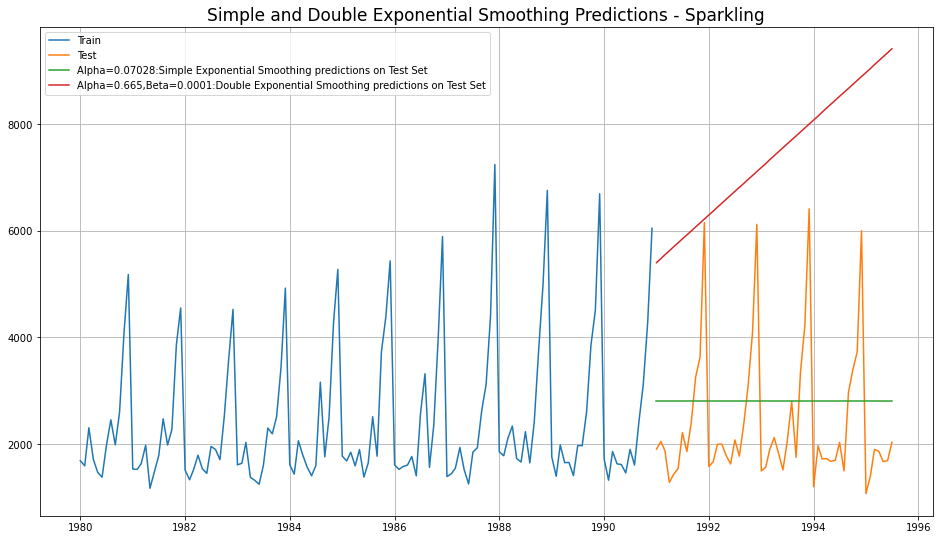

In [468]:
## Plotting the Training data, Test data and the forecasted values

plt.plot(strain, label='Train')
plt.plot(stest, label='Test')

plt.plot(SES_predict_spark, label='Alpha=0.07028:Simple Exponential Smoothing predictions on Test Set')
plt.plot(DES_predict_spark, label='Alpha=0.665,Beta=0.0001:Double Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Simple and Double Exponential Smoothing Predictions - Sparkling', fontsize=17);
plt.savefig('spark_des.jpg', bbox_inches='tight');

In [469]:
print('DES RMSE:',mean_squared_error(stest.values,DES_predict_spark.values,squared=False))

DES RMSE: 5291.879833226911


In [470]:
resultsDf_temp1 = pd.DataFrame({'Test RMSE Sparkling': [mean_squared_error(stest.values,DES_predict_spark.values,squared=False)]}
                           ,index=['Double Exponential Smoothing'])

# resultsDf = pd.concat([resultsDf, resultsDf_temp])
resultsDf_temp1

Test RMSE Sparkling
Double Exponential Smoothing          5291.879833

In [471]:
resultsDf9 = resultsDf_temp.join(resultsDf_temp1, how='outer')
resultsDf9

Test RMSE Rose  Test RMSE Sparkling
Double Exponential Smoothing       15.270968          5291.879833

In [472]:
resultsDf10 = pd.concat([resultsDf, resultsDf9], axis=0)
resultsDf10

Test RMSE Rose  Test RMSE Sparkling
RegressionOnTime                   15.268955          1389.135175
NaiveModel                         79.718773          3864.279352
SimpleAverageModel                 53.460570          1275.081804
2pointTrailingMovingAverage        11.529278           813.400684
4pointTrailingMovingAverage        14.451403          1156.589694
6pointTrailingMovingAverage        14.566327          1283.927428
9pointTrailingMovingAverage        14.727630          1346.278315
Simple Exponential Smoothing       36.796225          1338.004623
Double Exponential Smoothing       15.270968          5291.879833

In [473]:
resultsDf = resultsDf10.copy()
resultsDf

Test RMSE Rose  Test RMSE Sparkling
RegressionOnTime                   15.268955          1389.135175
NaiveModel                         79.718773          3864.279352
SimpleAverageModel                 53.460570          1275.081804
2pointTrailingMovingAverage        11.529278           813.400684
4pointTrailingMovingAverage        14.451403          1156.589694
6pointTrailingMovingAverage        14.566327          1283.927428
9pointTrailingMovingAverage        14.727630          1346.278315
Simple Exponential Smoothing       36.796225          1338.004623
Double Exponential Smoothing       15.270968          5291.879833

### Inference

Here, we see that the Double Exponential Smoothing has actually done well when compared to the Simple Exponential Smoothing. This is because of the fact that the Double Exponential Smoothing model has picked up the trend component as well.

<!-- The Holt's model in Python has certain other options of exponential trends or whether the smoothing parameters should be damped. You can try these out later to check whether you get a better forecast. -->

## Holt-Winters - ETS(A, A, A) - Holt Winter's linear method with additive errors - ROSE

In [474]:
# Initializing the Double Exponential Smoothing Model
model_TES = ExponentialSmoothing(rtrain,trend='additive',seasonal='additive',initialization_method='estimated')
# Fitting the model
model_TES = model_TES.fit()

print('')
print('==Holt Winters model Exponential Smoothing Estimated Parameters ==')
print('')
print(model_TES.params)


==Holt Winters model Exponential Smoothing Estimated Parameters ==

{'smoothing_level': 0.08491574907842013, 'smoothing_trend': 5.5205494088745035e-06, 'smoothing_seasonal': 0.0005477182208247348, 'damping_trend': nan, 'initial_level': 147.05898703809248, 'initial_trend': -0.5496981430927392, 'initial_seasons': array([-31.16021285, -18.81317648, -10.81406896, -21.41413199,
       -12.6036696 ,  -7.23553106,   2.76744902,   8.85548059,
         4.83969803,   2.95125217,  21.07934859,  63.31472515]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


/Users/chetan/DS/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [475]:
# Forecasting using this model for the duration of the test set
TES_predict_add_rose =  model_TES.forecast(len(rtest))
TES_predict_add_rose

1991-01-01     42.574560
1991-02-01     54.372099
1991-03-01     61.821511
1991-04-01     50.671639
1991-05-01     58.932400
1991-06-01     63.751320
1991-07-01     73.204015
1991-08-01     78.742349
1991-09-01     74.177124
1991-10-01     71.738917
1991-11-01     89.317129
1991-12-01    131.006255
1992-01-01     35.978169
1992-02-01     47.775707
1992-03-01     55.225119
1992-04-01     44.075248
1992-05-01     52.336008
1992-06-01     57.154928
1992-07-01     66.607623
1992-08-01     72.145958
1992-09-01     67.580733
1992-10-01     65.142526
1992-11-01     82.720737
1992-12-01    124.409864
1993-01-01     29.381777
1993-02-01     41.179316
1993-03-01     48.628728
1993-04-01     37.478856
1993-05-01     45.739616
1993-06-01     50.558536
1993-07-01     60.011232
1993-08-01     65.549566
1993-09-01     60.984341
1993-10-01     58.546134
1993-11-01     76.124346
1993-12-01    117.813472
1994-01-01     22.785386
1994-02-01     34.582924
1994-03-01     42.032336
1994-04-01     30.882464


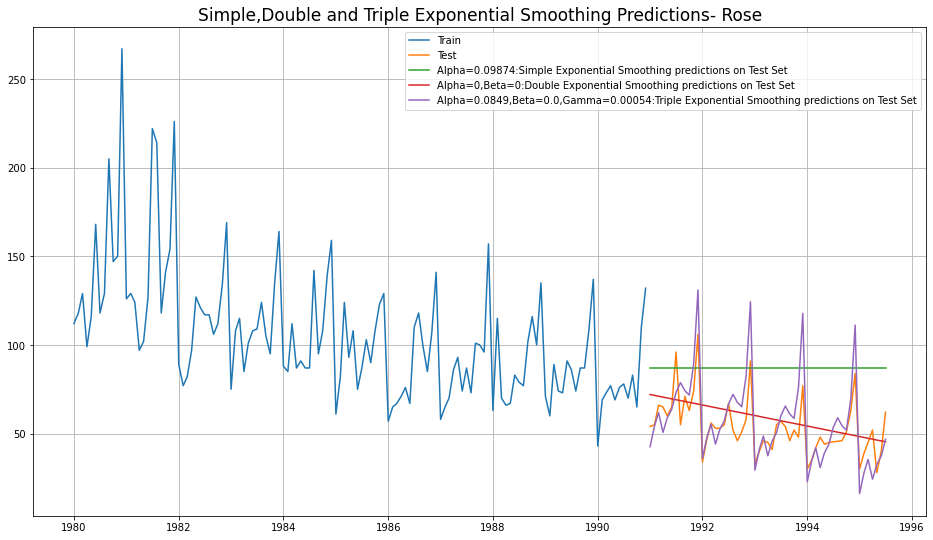

In [476]:
## Plotting the Training data, Test data and the forecasted values

plt.plot(rtrain, label='Train')
plt.plot(rtest, label='Test')

plt.plot(SES_predict_rose, label='Alpha=0.09874:Simple Exponential Smoothing predictions on Test Set')
plt.plot(DES_predict_rose, label='Alpha=0,Beta=0:Double Exponential Smoothing predictions on Test Set')
plt.plot(TES_predict_add_rose, label='Alpha=0.0849,Beta=0.0,Gamma=0.00054:Triple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Simple,Double and Triple Exponential Smoothing Predictions- Rose', fontsize=17);
plt.savefig('rose_add_tes.jpg', bbox_inches='tight');

We see that the Triple Exponential Smoothing is picking up the seasonal component as well.

In [477]:
print('TES RMSE:',mean_squared_error(rtest.values,TES_predict_add_rose.values,squared=False))

TES RMSE: 14.24323950074202


In [478]:
resultsDf_temp = pd.DataFrame({'Test RMSE Rose': [mean_squared_error(rtest.values,TES_predict_add_rose.values,squared=False)]}
                           ,index=['Triple Exponential Smoothing (Additive Season)'])

import textwrap
textwrap.TextWrapper(resultsDf_temp.index)

# resultsDf = pd.concat([resultsDf, resultsDf_temp])
resultsDf_temp

Test RMSE Rose
Triple Exponential Smoothing (Additive Season)        14.24324

### Inference

Triple Exponential Smoothing has performed the best on the test as expected since the data had both trend and seasonality. 

<!-- But we see that our triple exponential smoothing is under forecasting. Let us try to tweak some of the parameters in order to get a better forecast on the test set. -->

## Holt-Winters - ETS(A, A, A) - Holt Winter's linear method with additive errors - SPARKLING

In [479]:
# Initializing the Double Exponential Smoothing Model
model_TES = ExponentialSmoothing(strain,trend='additive',seasonal='additive',initialization_method='estimated')
# Fitting the model
model_TES = model_TES.fit()

print('')
print('==Holt Winters model Exponential Smoothing Estimated Parameters ==')
print('')
print(model_TES.params)


==Holt Winters model Exponential Smoothing Estimated Parameters ==

{'smoothing_level': 0.11127217859992398, 'smoothing_trend': 0.01236078328796452, 'smoothing_seasonal': 0.4607177642170641, 'damping_trend': nan, 'initial_level': 2356.578308185137, 'initial_trend': -0.01853556812789492, 'initial_seasons': array([-636.23360535, -722.98363367, -398.6436108 , -473.43084469,
       -808.42525514, -815.35024951, -384.23066987,   72.99508063,
       -237.44272911,  272.32584554, 1541.3782103 , 2590.0775386 ]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


/Users/chetan/DS/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [480]:
# Forecasting using this model for the duration of the test set
TES_predict_add_spark =  model_TES.forecast(len(stest))
TES_predict_add_spark

1991-01-01    1490.574426
1991-02-01    1204.714325
1991-03-01    1688.941106
1991-04-01    1551.450810
1991-05-01    1461.440427
1991-06-01    1278.907163
1991-07-01    1805.164022
1991-08-01    1679.251392
1991-09-01    2315.687649
1991-10-01    3225.308906
1991-11-01    4299.652360
1991-12-01    6411.161332
1992-01-01    1483.296578
1992-02-01    1197.436477
1992-03-01    1681.663258
1992-04-01    1544.172962
1992-05-01    1454.162580
1992-06-01    1271.629315
1992-07-01    1797.886174
1992-08-01    1671.973544
1992-09-01    2308.409801
1992-10-01    3218.031058
1992-11-01    4292.374513
1992-12-01    6403.883484
1993-01-01    1476.018731
1993-02-01    1190.158629
1993-03-01    1674.385411
1993-04-01    1536.895114
1993-05-01    1446.884732
1993-06-01    1264.351467
1993-07-01    1790.608327
1993-08-01    1664.695696
1993-09-01    2301.131954
1993-10-01    3210.753211
1993-11-01    4285.096665
1993-12-01    6396.605637
1994-01-01    1468.740883
1994-02-01    1182.880782
1994-03-01  

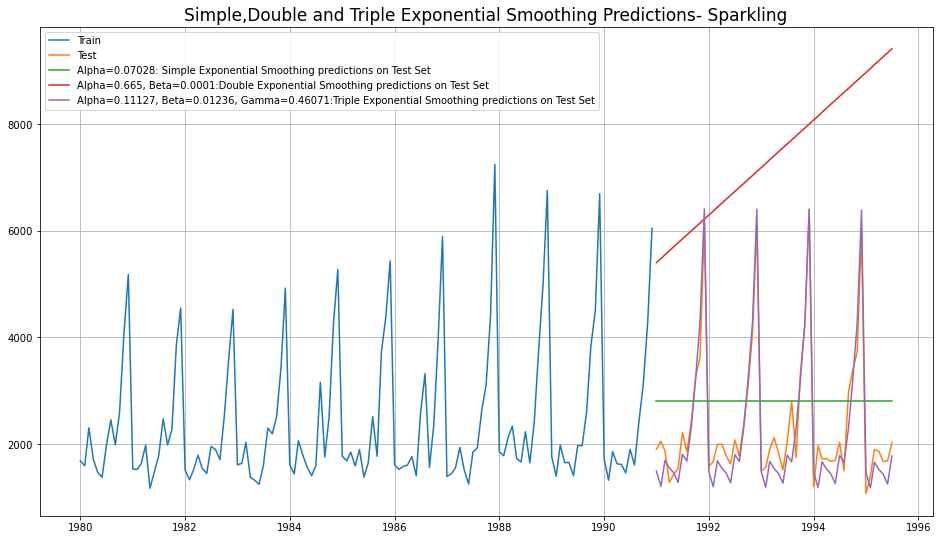

In [481]:
## Plotting the Training data, Test data and the forecasted values

plt.plot(strain, label='Train')
plt.plot(stest, label='Test')

plt.plot(SES_predict_spark, label='Alpha=0.07028: Simple Exponential Smoothing predictions on Test Set')
plt.plot(DES_predict_spark, label='Alpha=0.665, Beta=0.0001:Double Exponential Smoothing predictions on Test Set')
plt.plot(TES_predict_add_spark, label='Alpha=0.11127, Beta=0.01236, Gamma=0.46071:Triple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Simple,Double and Triple Exponential Smoothing Predictions- Sparkling', fontsize=17);
plt.savefig('spark_add_tes.jpg', bbox_inches='tight');

We see that the Triple Exponential Smoothing is picking up the seasonal component as well.

In [482]:
print('TES RMSE:',mean_squared_error(stest.values,TES_predict_add_spark.values,squared=False))

TES RMSE: 378.6262408893861


In [483]:
resultsDf_temp1 = pd.DataFrame({'Test RMSE Sparkling': [mean_squared_error(stest.values,TES_predict_add_spark.values,squared=False)]}
                           ,index=['Triple Exponential Smoothing (Additive Season)'])

import textwrap
textwrap.TextWrapper(resultsDf_temp.index)

# resultsDf = pd.concat([resultsDf, resultsDf_temp])
resultsDf_temp1

Test RMSE Sparkling
Triple Exponential Smoothing (Additive Season)           378.626241

In [484]:
resultsDf11 = resultsDf_temp.join(resultsDf_temp1, how='outer')
resultsDf11

Test RMSE Rose  \
Triple Exponential Smoothing (Additive Season)        14.24324   

                                                Test RMSE Sparkling  
Triple Exponential Smoothing (Additive Season)           378.626241

In [485]:
resultsDf12 = pd.concat([resultsDf, resultsDf11], axis=0)
resultsDf12

Test RMSE Rose  \
RegressionOnTime                                     15.268955   
NaiveModel                                           79.718773   
SimpleAverageModel                                   53.460570   
2pointTrailingMovingAverage                          11.529278   
4pointTrailingMovingAverage                          14.451403   
6pointTrailingMovingAverage                          14.566327   
9pointTrailingMovingAverage                          14.727630   
Simple Exponential Smoothing                         36.796225   
Double Exponential Smoothing                         15.270968   
Triple Exponential Smoothing (Additive Season)       14.243240   

                                                Test RMSE Sparkling  
RegressionOnTime                                        1389.135175  
NaiveModel                                              3864.279352  
SimpleAverageModel                                      1275.081804  
2pointTrailingMovingAverage                              813.400684  
4pointTrailingMovingAverage                             1156.589694  
6pointTrailingMovingAverage                             1283.927428  
9pointTrailingMovingAverage                             1346.278315  
Simple Exponential Smoothing                            1338.004623  
Double Exponential Smoothing                            5291.879833  
Triple Exponential Smoothing (Additive Season)           378.626241

In [486]:
resultsDf = resultsDf12.copy()

## Holt-Winters - ETS(A, A, M) - Holt Winter's linear method - ROSE

### ETS(A, A, M) model - Taking MULTIPLICATIVE SEASONALITY

In [487]:
# Initializing the Double Exponential Smoothing Model
model_TES_am = ExponentialSmoothing(rtrain,trend='add',seasonal='multiplicative',initialization_method='estimated')
# Fitting the model
model_TES_am = model_TES_am.fit()

print('')
print('==Holt Winters model Exponential Smoothing Estimated Parameters ==')
print('')
print(model_TES_am.params)

/Users/chetan/DS/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)



==Holt Winters model Exponential Smoothing Estimated Parameters ==

{'smoothing_level': 0.07736040004765096, 'smoothing_trend': 0.03936496779735522, 'smoothing_seasonal': 0.0008375039104357999, 'damping_trend': nan, 'initial_level': 156.90674503596637, 'initial_trend': -0.9061396720042346, 'initial_seasons': array([0.7142168 , 0.80982439, 0.88543128, 0.77363782, 0.87046319,
       0.94699283, 1.04196135, 1.11012703, 1.04835489, 1.0276963 ,
       1.19783562, 1.6514144 ]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


In [488]:
# Forecasting using this model for the duration of the test set
TES_predict_am_rose =  model_TES_am.forecast(len(rtest))
TES_predict_am_rose

1991-01-01     55.942246
1991-02-01     63.240624
1991-03-01     68.899674
1991-04-01     60.007486
1991-05-01     67.257150
1991-06-01     72.880875
1991-07-01     79.913317
1991-08-01     84.831135
1991-09-01     79.856761
1991-10-01     78.009465
1991-11-01     90.608817
1991-12-01    124.421985
1992-01-01     53.620022
1992-02-01     60.606323
1992-03-01     66.019647
1992-04-01     57.490388
1992-05-01     64.426058
1992-06-01     69.802261
1992-07-01     76.525716
1992-08-01     81.222314
1992-09-01     76.447471
1992-10-01     74.667150
1992-11-01     86.712771
1992-12-01    119.052784
1993-01-01     51.297798
1993-02-01     57.972023
1993-03-01     63.139621
1993-04-01     54.973289
1993-05-01     61.594966
1993-06-01     66.723648
1993-07-01     73.138115
1993-08-01     77.613494
1993-09-01     73.038180
1993-10-01     71.324834
1993-11-01     82.816725
1993-12-01    113.683583
1994-01-01     48.975574
1994-02-01     55.337723
1994-03-01     60.259594
1994-04-01     52.456191


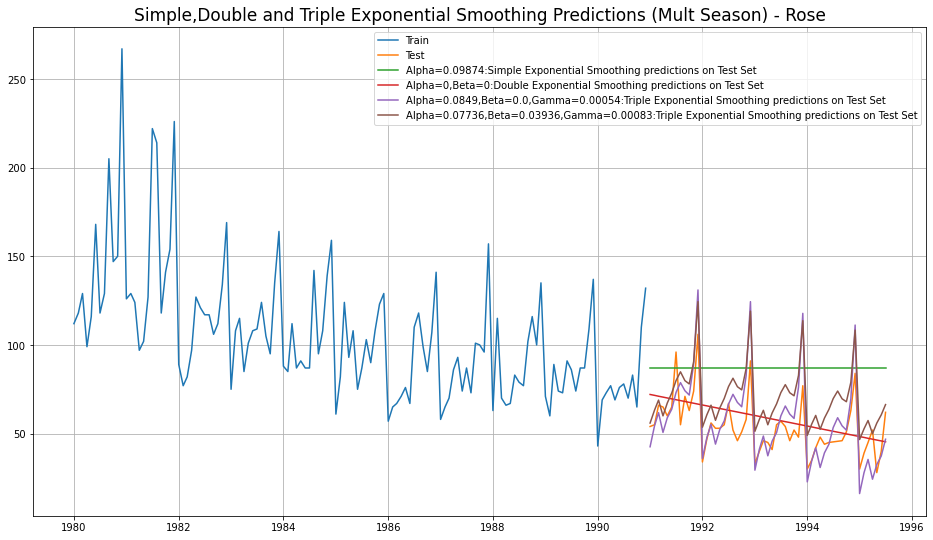

In [489]:
## Plotting the Training data, Test data and the forecasted values

plt.plot(rtrain, label='Train')
plt.plot(rtest, label='Test')

plt.plot(SES_predict_rose, label='Alpha=0.09874:Simple Exponential Smoothing predictions on Test Set')
plt.plot(DES_predict_rose, label='Alpha=0,Beta=0:Double Exponential Smoothing predictions on Test Set')
plt.plot(TES_predict_add_rose, label='Alpha=0.0849,Beta=0.0,Gamma=0.00054:Triple Exponential Smoothing predictions on Test Set')
plt.plot(TES_predict_am_rose, label='Alpha=0.07736,Beta=0.03936,Gamma=0.00083:Triple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Simple,Double and Triple Exponential Smoothing Predictions (Mult Season) - Rose', fontsize=17);

plt.savefig('rose_mul_tes.jpg', bbox_inches='tight');

### Report model accuracy

In [490]:
print('TES_am RMSE_rose:',mean_squared_error(rtest.values,TES_predict_am_rose.values,squared=False))

TES_am RMSE_rose: 19.113110215160134


In [491]:
# resultsDf_temp = pd.DataFrame({'Test RMSE': [mean_squared_error(test.values,TES_predict_am.values,squared=False)]}
#                            ,index=['Alpha=0.74,Beta=2.73e-06,Gamma=5.2e-07,Gamma=0:TES'])

# resultsDf = pd.concat([resultsDf, resultsDf_temp])
# resultsDf

resultsDf_temp = pd.DataFrame({'Test RMSE Rose': [mean_squared_error(rtest.values,TES_predict_am_rose.values,squared=False)]}
                           ,index=['Triple Exponential Smoothing (Multiplicative Season)'])



resultsDf_temp

Test RMSE Rose
Triple Exponential Smoothing (Multiplicative Se...        19.11311

We see that the multiplicative seasonality model has not done that well when compared to the additive seasonality Triple Exponential Smoothing model.

<!-- There are various other parameters in the models. Please do feel free to play around with those in the hope of getting a better forecast on the test set. -->

## Holt-Winters - ETS(A, A, M) - Holt Winter's linear method - SPARKLING

### ETS(A, A, M) model - Taking MULTIPLICATIVE SEASONALITY

In [492]:
# Initializing the Double Exponential Smoothing Model
model_TES_am = ExponentialSmoothing(strain,trend='add',seasonal='multiplicative',initialization_method='estimated')
# Fitting the model
model_TES_am = model_TES_am.fit()

print('')
print('==Holt Winters model Exponential Smoothing Estimated Parameters ==')
print('')
print(model_TES_am.params)


==Holt Winters model Exponential Smoothing Estimated Parameters ==

{'smoothing_level': 0.11119949831569428, 'smoothing_trend': 0.049430920023313805, 'smoothing_seasonal': 0.3620525701498937, 'damping_trend': nan, 'initial_level': 2356.5264391986907, 'initial_trend': -9.443690175376352, 'initial_seasons': array([0.71325627, 0.68332509, 0.90537798, 0.80561841, 0.65639659,
       0.65451508, 0.88690241, 1.13423953, 0.91927727, 1.21396745,
       1.86941738, 2.3734461 ]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


/Users/chetan/DS/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [493]:
# Forecasting using this model for the duration of the test set
TES_predict_am_spark =  model_TES_am.forecast(len(stest))
TES_predict_am_spark

1991-01-01    1587.685845
1991-02-01    1356.590237
1991-03-01    1763.121866
1991-04-01    1656.379813
1991-05-01    1542.186697
1991-06-01    1355.276292
1991-07-01    1854.460265
1991-08-01    1820.822870
1991-09-01    2277.203230
1991-10-01    3122.460625
1991-11-01    4129.148636
1991-12-01    5891.184787
1992-01-01    1538.578232
1992-02-01    1314.522051
1992-03-01    1708.305381
1992-04-01    1604.748228
1992-05-01    1493.989468
1992-06-01    1312.809887
1992-07-01    1796.200235
1992-08-01    1763.469447
1992-09-01    2205.285676
1992-10-01    3023.588340
1992-11-01    3998.053790
1992-12-01    5703.651532
1993-01-01    1489.470618
1993-02-01    1272.453864
1993-03-01    1653.488895
1993-04-01    1553.116644
1993-05-01    1445.792238
1993-06-01    1270.343481
1993-07-01    1737.940206
1993-08-01    1706.116024
1993-09-01    2133.368122
1993-10-01    2924.716056
1993-11-01    3866.958944
1993-12-01    5516.118277
1994-01-01    1440.363005
1994-02-01    1230.385677
1994-03-01  

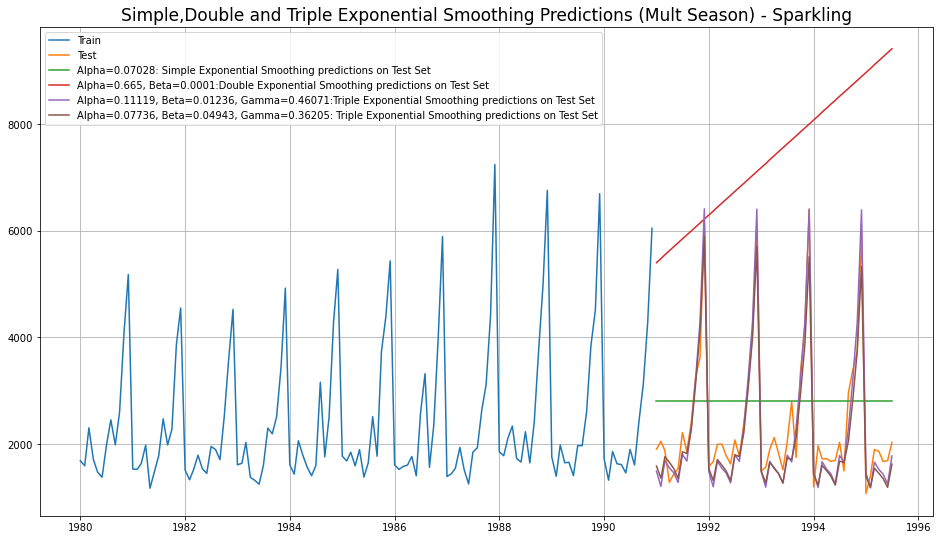

In [494]:
## Plotting the Training data, Test data and the forecasted values

plt.plot(strain, label='Train')
plt.plot(stest, label='Test')

plt.plot(SES_predict_spark, label='Alpha=0.07028: Simple Exponential Smoothing predictions on Test Set')
plt.plot(DES_predict_spark, label='Alpha=0.665, Beta=0.0001:Double Exponential Smoothing predictions on Test Set')
plt.plot(TES_predict_add_spark, label='Alpha=0.11119, Beta=0.01236, Gamma=0.46071:Triple Exponential Smoothing predictions on Test Set')

plt.plot(TES_predict_am_spark, label='Alpha=0.07736, Beta=0.04943, Gamma=0.36205: Triple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Simple,Double and Triple Exponential Smoothing Predictions (Mult Season) - Sparkling', fontsize=17);

plt.savefig('spark_mul_tes.jpg', bbox_inches='tight');

### Report model accuracy

In [495]:
print('TES_am RMSE_spark:',mean_squared_error(stest.values,TES_predict_am_spark.values,squared=False))

TES_am RMSE_spark: 403.7062277856435


In [496]:
# resultsDf_temp = pd.DataFrame({'Test RMSE': [mean_squared_error(test.values,TES_predict_am.values,squared=False)]}
#                            ,index=['Alpha=0.74,Beta=2.73e-06,Gamma=5.2e-07,Gamma=0:TES'])

# resultsDf = pd.concat([resultsDf, resultsDf_temp])
# resultsDf

resultsDf_temp1 = pd.DataFrame({'Test RMSE Sparkling': [mean_squared_error(stest.values,TES_predict_am_spark.values,squared=False)]}
                           ,index=['Triple Exponential Smoothing (Multiplicative Season)'])



resultsDf_temp1

Test RMSE Sparkling
Triple Exponential Smoothing (Multiplicative Se...           403.706228

In [497]:
resultsDf13 = resultsDf_temp.join(resultsDf_temp1, how='outer')
resultsDf13

Test RMSE Rose  \
Triple Exponential Smoothing (Multiplicative Se...        19.11311   

                                                    Test RMSE Sparkling  
Triple Exponential Smoothing (Multiplicative Se...           403.706228

In [498]:
resultsDf14 = pd.concat([resultsDf, resultsDf13], axis=0)
resultsDf14

Test RMSE Rose  \
RegressionOnTime                                         15.268955   
NaiveModel                                               79.718773   
SimpleAverageModel                                       53.460570   
2pointTrailingMovingAverage                              11.529278   
4pointTrailingMovingAverage                              14.451403   
6pointTrailingMovingAverage                              14.566327   
9pointTrailingMovingAverage                              14.727630   
Simple Exponential Smoothing                             36.796225   
Double Exponential Smoothing                             15.270968   
Triple Exponential Smoothing (Additive Season)           14.243240   
Triple Exponential Smoothing (Multiplicative Se...       19.113110   

                                                    Test RMSE Sparkling  
RegressionOnTime                                            1389.135175  
NaiveModel                                                  3864.279352  
SimpleAverageModel                                          1275.081804  
2pointTrailingMovingAverage                                  813.400684  
4pointTrailingMovingAverage                                 1156.589694  
6pointTrailingMovingAverage                                 1283.927428  
9pointTrailingMovingAverage                                 1346.278315  
Simple Exponential Smoothing                                1338.004623  
Double Exponential Smoothing                                5291.879833  
Triple Exponential Smoothing (Additive Season)               378.626241  
Triple Exponential Smoothing (Multiplicative Se...           403.706228

In [499]:
resultsDf = resultsDf14.copy()
resultsDf

Test RMSE Rose  \
RegressionOnTime                                         15.268955   
NaiveModel                                               79.718773   
SimpleAverageModel                                       53.460570   
2pointTrailingMovingAverage                              11.529278   
4pointTrailingMovingAverage                              14.451403   
6pointTrailingMovingAverage                              14.566327   
9pointTrailingMovingAverage                              14.727630   
Simple Exponential Smoothing                             36.796225   
Double Exponential Smoothing                             15.270968   
Triple Exponential Smoothing (Additive Season)           14.243240   
Triple Exponential Smoothing (Multiplicative Se...       19.113110   

                                                    Test RMSE Sparkling  
RegressionOnTime                                            1389.135175  
NaiveModel                                                  3864.279352  
SimpleAverageModel                                          1275.081804  
2pointTrailingMovingAverage                                  813.400684  
4pointTrailingMovingAverage                                 1156.589694  
6pointTrailingMovingAverage                                 1283.927428  
9pointTrailingMovingAverage                                 1346.278315  
Simple Exponential Smoothing                                1338.004623  
Double Exponential Smoothing                                5291.879833  
Triple Exponential Smoothing (Additive Season)               378.626241  
Triple Exponential Smoothing (Multiplicative Se...           403.706228

In [500]:
resultsDf.to_csv('results_all.csv')

## Holt-Winters - ETS(A, Ad, A) - Holt Winter's linear method with additive errors - ROSE

### USING DAMPED TREND

In [501]:
# Initializing the Double Exponential Smoothing Model
model_TES = ExponentialSmoothing(rtrain,trend='additive',seasonal='additive',initialization_method='estimated', damped_trend=True)
# Fitting the model
model_TES = model_TES.fit()

print('')
print('==Holt Winters model Exponential Smoothing Estimated Parameters ==')
print('')
print(model_TES.params)


==Holt Winters model Exponential Smoothing Estimated Parameters ==

{'smoothing_level': 0.078427104063884, 'smoothing_trend': 0.01153866433417042, 'smoothing_seasonal': 0.07738829492070835, 'damping_trend': 0.9750377514944137, 'initial_level': 154.9897068813286, 'initial_trend': -1.5499014050433666, 'initial_seasons': array([-30.30786975, -18.40126802, -10.48833896, -22.28116478,
       -13.28355027,  -6.39129518,   3.09819437,  10.14129915,
         6.22649505,   3.88233102,  21.66685209,  65.85365321]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


/Users/chetan/DS/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [502]:
# Forecasting using this model for the duration of the test set
TES_predict_add_damp_rose =  model_TES.forecast(len(rtest))
TES_predict_add_damp_rose

1991-01-01     48.231055
1991-02-01     61.045359
1991-03-01     68.342667
1991-04-01     58.197362
1991-05-01     65.575659
1991-06-01     70.640514
1991-07-01     79.851872
1991-08-01     85.224146
1991-09-01     83.117518
1991-10-01     81.244162
1991-11-01     99.227179
1991-12-01    140.741504
1992-01-01     47.004340
1992-02-01     59.849266
1992-03-01     67.176431
1992-04-01     57.060238
1992-05-01     64.466920
1992-06-01     69.559452
1992-07-01     78.797795
1992-08-01     84.196381
1992-09-01     82.115409
1992-10-01     80.267067
1992-11-01     98.274475
1992-12-01    139.812581
1993-01-01     46.098605
1993-02-01     58.966140
1993-03-01     66.315350
1993-04-01     56.220652
1993-05-01     63.648292
1993-06-01     68.761258
1993-07-01     78.019527
1993-08-01     83.437540
1993-09-01     81.375510
1993-10-01     79.545638
1993-11-01     97.571055
1993-12-01    139.126720
1994-01-01     45.429864
1994-02-01     58.314093
1994-03-01     65.679579
1994-04-01     55.600751


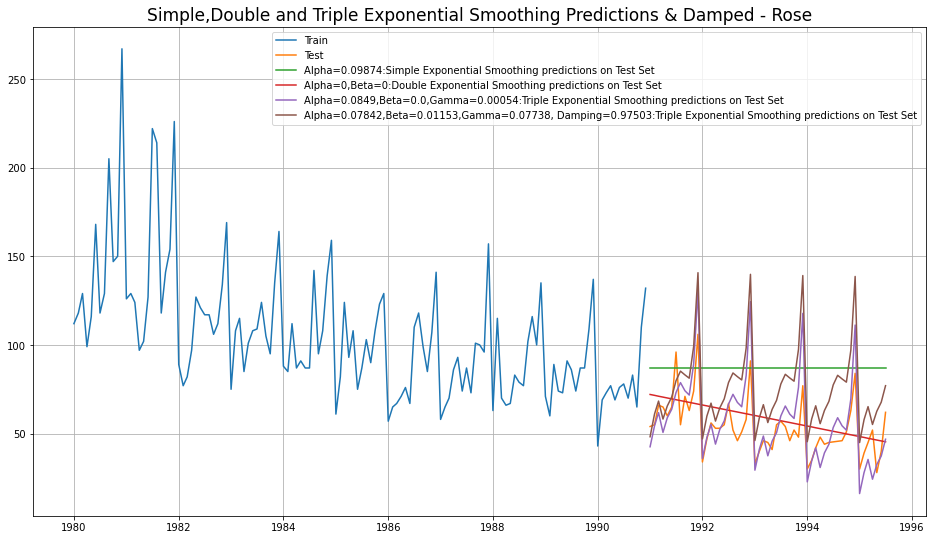

In [503]:
## Plotting the Training data, Test data and the forecasted values

plt.plot(rtrain, label='Train')
plt.plot(rtest, label='Test')

plt.plot(SES_predict_rose, label='Alpha=0.09874:Simple Exponential Smoothing predictions on Test Set')
plt.plot(DES_predict_rose, label='Alpha=0,Beta=0:Double Exponential Smoothing predictions on Test Set')
plt.plot(TES_predict_add_rose, label='Alpha=0.0849,Beta=0.0,Gamma=0.00054:Triple Exponential Smoothing predictions on Test Set')
plt.plot(TES_predict_add_damp_rose, label='Alpha=0.07842,Beta=0.01153,Gamma=0.07738, Damping=0.97503:Triple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Simple,Double and Triple Exponential Smoothing Predictions & Damped - Rose', fontsize=17);
plt.savefig('rose_add_damp_tes.jpg', bbox_inches='tight');

In [504]:
print('TES RMSE DAMPED ROSE:',mean_squared_error(rtest.values,TES_predict_add_damp_rose.values,squared=False))

TES RMSE DAMPED ROSE: 26.039947558125956


In [505]:
resultsDf_temp = pd.DataFrame({'Test RMSE Rose': [mean_squared_error(rtest.values,TES_predict_add_damp_rose.values,squared=False)]}
                           ,index=['Triple Exponential Smoothing (Additive Season, Damped Trend)'])

import textwrap
textwrap.TextWrapper(resultsDf_temp.index)

# resultsDf = pd.concat([resultsDf, resultsDf_temp])
resultsDf_temp

Test RMSE Rose
Triple Exponential Smoothing (Additive Season, ...       26.039948

## Holt-Winters - ETS(A, A, A) - Holt Winter's linear method with additive errors - SPARKLING

### USING DAMPED TREND

In [506]:
# Initializing the Double Exponential Smoothing Model
model_TES = ExponentialSmoothing(strain,trend='additive',seasonal='additive',initialization_method='estimated', damped_trend=True)
# Fitting the model
model_TES = model_TES.fit()

print('')
print('==Holt Winters model Exponential Smoothing Estimated Parameters ==')
print('')
print(model_TES.params)


==Holt Winters model Exponential Smoothing Estimated Parameters ==

{'smoothing_level': 0.10062169418748235, 'smoothing_trend': 0.00018168671586953612, 'smoothing_seasonal': 0.511514820377231, 'damping_trend': 0.9702575091215162, 'initial_level': 2373.3349726249144, 'initial_trend': -5.20485555345566, 'initial_seasons': array([-668.12738741, -747.86212595, -344.25940902, -491.85127947,
       -840.22799617, -846.63257158, -387.82092411,  107.25493156,
       -279.9252947 ,  260.26683938, 1611.56995208, 2643.41954878]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


/Users/chetan/DS/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [507]:
# Forecasting using this model for the duration of the test set
TES_predict_add_damp_spark =  model_TES.forecast(len(stest))
TES_predict_add_damp_spark

1991-01-01    1502.750406
1991-02-01    1198.527164
1991-03-01    1697.164113
1991-04-01    1543.572592
1991-05-01    1464.154046
1991-06-01    1284.212633
1991-07-01    1801.409196
1991-08-01    1643.249695
1991-09-01    2325.526486
1991-10-01    3227.302621
1991-11-01    4302.234703
1991-12-01    6456.727997
1992-01-01    1501.617527
1992-02-01    1197.427979
1992-03-01    1696.097621
1992-04-01    1542.537820
1992-05-01    1463.150051
1992-06-01    1283.238499
1992-07-01    1800.464035
1992-08-01    1642.332646
1992-09-01    2324.636712
1992-10-01    3226.439311
1992-11-01    4301.397070
1992-12-01    6455.915278
1993-01-01    1500.828980
1993-02-01    1196.662885
1993-03-01    1695.355283
1993-04-01    1541.817561
1993-05-01    1462.451214
1993-06-01    1282.560448
1993-07-01    1799.806150
1993-08-01    1641.694328
1993-09-01    2324.017379
1993-10-01    3225.838400
1993-11-01    4300.814031
1993-12-01    6455.349579
1994-01-01    1500.280107
1994-02-01    1196.130337
1994-03-01  

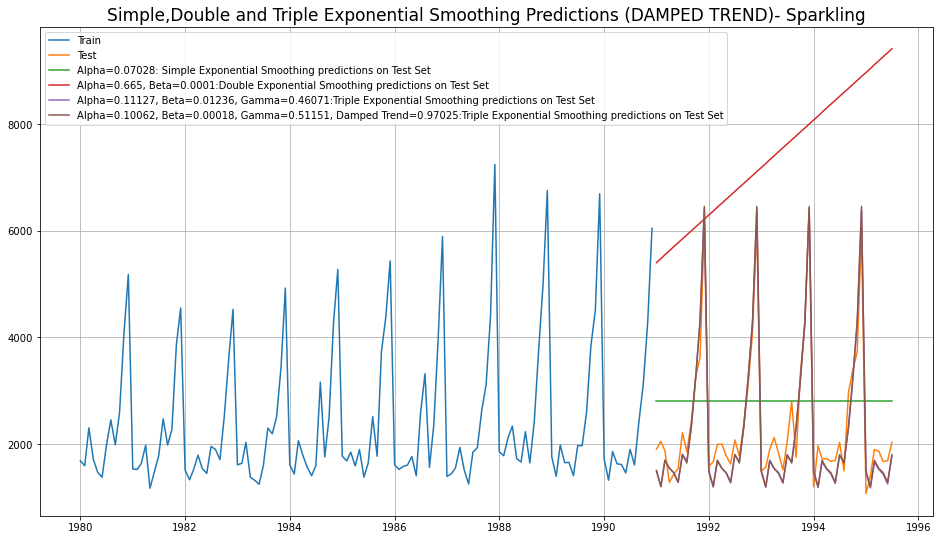

In [508]:
## Plotting the Training data, Test data and the forecasted values

plt.plot(strain, label='Train')
plt.plot(stest, label='Test')

plt.plot(SES_predict_spark, label='Alpha=0.07028: Simple Exponential Smoothing predictions on Test Set')
plt.plot(DES_predict_spark, label='Alpha=0.665, Beta=0.0001:Double Exponential Smoothing predictions on Test Set')
plt.plot(TES_predict_add_spark, label='Alpha=0.11127, Beta=0.01236, Gamma=0.46071:Triple Exponential Smoothing predictions on Test Set')
plt.plot(TES_predict_add_damp_spark, label='Alpha=0.10062, Beta=0.00018, Gamma=0.51151, Damped Trend=0.97025:Triple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Simple,Double and Triple Exponential Smoothing Predictions (DAMPED TREND)- Sparkling', fontsize=17);
plt.savefig('spark_add_damp_tes.jpg', bbox_inches='tight');

In [509]:
print('TES RMSE SPARK DAMPED:',mean_squared_error(stest.values,TES_predict_add_damp_spark.values,squared=False))

TES RMSE SPARK DAMPED: 378.9069424872413


In [510]:
resultsDf_temp1 = pd.DataFrame({'Test RMSE Sparkling': [mean_squared_error(stest.values,TES_predict_add_spark.values,squared=False)]}
                           ,index=['Triple Exponential Smoothing (Additive Season, Damped Trend)'])

import textwrap
textwrap.TextWrapper(resultsDf_temp.index)

# resultsDf = pd.concat([resultsDf, resultsDf_temp])
resultsDf_temp1

Test RMSE Sparkling
Triple Exponential Smoothing (Additive Season, ...           378.626241

In [511]:
resultsDf11 = resultsDf_temp.join(resultsDf_temp1, how='outer')
resultsDf11

Test RMSE Rose  \
Triple Exponential Smoothing (Additive Season, ...       26.039948   

                                                    Test RMSE Sparkling  
Triple Exponential Smoothing (Additive Season, ...           378.626241

In [512]:
resultsDf12 = pd.concat([resultsDf, resultsDf11], axis=0)
resultsDf12

Test RMSE Rose  \
RegressionOnTime                                         15.268955   
NaiveModel                                               79.718773   
SimpleAverageModel                                       53.460570   
2pointTrailingMovingAverage                              11.529278   
4pointTrailingMovingAverage                              14.451403   
6pointTrailingMovingAverage                              14.566327   
9pointTrailingMovingAverage                              14.727630   
Simple Exponential Smoothing                             36.796225   
Double Exponential Smoothing                             15.270968   
Triple Exponential Smoothing (Additive Season)           14.243240   
Triple Exponential Smoothing (Multiplicative Se...       19.113110   
Triple Exponential Smoothing (Additive Season, ...       26.039948   

                                                    Test RMSE Sparkling  
RegressionOnTime                                            1389.135175  
NaiveModel                                                  3864.279352  
SimpleAverageModel                                          1275.081804  
2pointTrailingMovingAverage                                  813.400684  
4pointTrailingMovingAverage                                 1156.589694  
6pointTrailingMovingAverage                                 1283.927428  
9pointTrailingMovingAverage                                 1346.278315  
Simple Exponential Smoothing                                1338.004623  
Double Exponential Smoothing                                5291.879833  
Triple Exponential Smoothing (Additive Season)               378.626241  
Triple Exponential Smoothing (Multiplicative Se...           403.706228  
Triple Exponential Smoothing (Additive Season, ...           378.626241

In [513]:
resultsDf = resultsDf12.copy()

## Holt-Winters - ETS(A, A, M) - Holt Winter's linear method - ROSE

### USING DAMPED TREND

### ETS(A, Ad, M) model - Taking MULTIPLICATIVE SEASONALITY

In [514]:
# Initializing the Double Exponential Smoothing Model
model_TES_am = ExponentialSmoothing(rtrain,trend='add',seasonal='multiplicative',initialization_method='estimated', damped_trend=True)
# Fitting the model
model_TES_am = model_TES_am.fit()

print('')
print('==Holt Winters model Exponential Smoothing Estimated Parameters ==')
print('')
print(model_TES_am.params)

/Users/chetan/DS/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)



==Holt Winters model Exponential Smoothing Estimated Parameters ==

{'smoothing_level': 0.05921476076079892, 'smoothing_trend': 0.020252774684074056, 'smoothing_seasonal': 0.004055776297607447, 'damping_trend': 0.9772370319747687, 'initial_level': 136.25811502851224, 'initial_trend': -1.4905747496073531, 'initial_seasons': array([0.87608681, 0.99240523, 1.08107113, 0.95302591, 1.0668395 ,
       1.15077788, 1.25932385, 1.34732797, 1.2768569 , 1.25150631,
       1.45495275, 1.98687924]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


In [515]:
# Forecasting using this model for the duration of the test set
TES_predict_am_damp_rose =  model_TES_am.forecast(len(rtest))
TES_predict_am_damp_rose

1991-01-01     57.798263
1991-02-01     65.505362
1991-03-01     71.234453
1991-04-01     62.758312
1991-05-01     70.050683
1991-06-01     75.329037
1991-07-01     82.357168
1991-08-01     87.915176
1991-09-01     83.325352
1991-10-01     81.585835
1991-11-01     94.777358
1991-12-01    129.083606
1992-01-01     56.797501
1992-02-01     64.395159
1992-03-01     70.052745
1992-04-01     61.739320
1992-05-01     68.937473
1992-06-01     74.157439
1992-07-01     81.103580
1992-08-01     86.605569
1992-09-01     82.110665
1992-10-01     80.421979
1992-11-01     93.454316
1992-12-01    127.320364
1993-01-01     56.038348
1993-02-01     63.552986
1993-03-01     69.156331
1993-04-01     60.966337
1993-05-01     68.093018
1993-06-01     73.268694
1993-07-01     80.152639
1993-08-01     85.612134
1993-09-01     81.189233
1993-10-01     79.539106
1993-11-01     92.450689
1993-12-01    125.982812
1994-01-01     55.462472
1994-02-01     62.914134
1994-03-01     68.476332
1994-04-01     60.379971


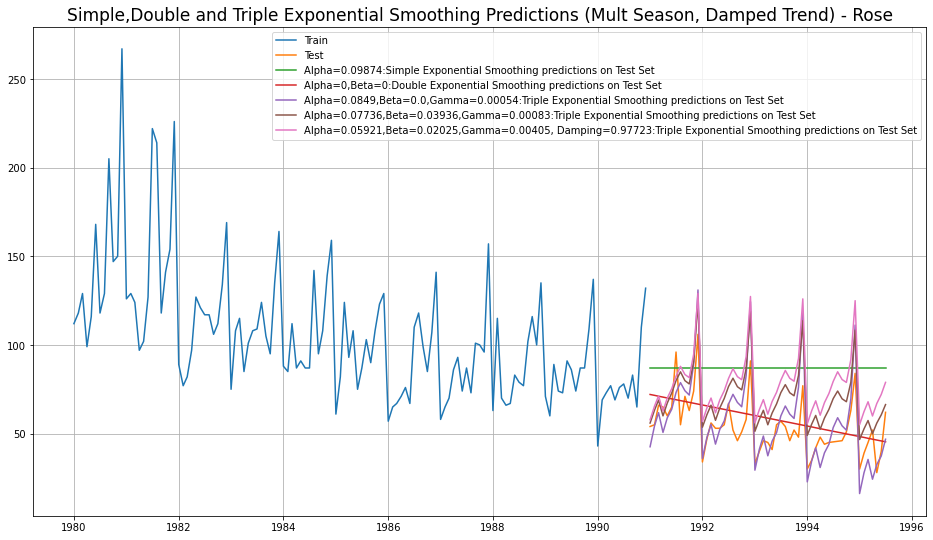

In [516]:
## Plotting the Training data, Test data and the forecasted values

plt.plot(rtrain, label='Train')
plt.plot(rtest, label='Test')

plt.plot(SES_predict_rose, label='Alpha=0.09874:Simple Exponential Smoothing predictions on Test Set')
plt.plot(DES_predict_rose, label='Alpha=0,Beta=0:Double Exponential Smoothing predictions on Test Set')
plt.plot(TES_predict_add_rose, label='Alpha=0.0849,Beta=0.0,Gamma=0.00054:Triple Exponential Smoothing predictions on Test Set')
plt.plot(TES_predict_am_rose, label='Alpha=0.07736,Beta=0.03936,Gamma=0.00083:Triple Exponential Smoothing predictions on Test Set')
plt.plot(TES_predict_am_damp_rose, label='Alpha=0.05921,Beta=0.02025,Gamma=0.00405, Damping=0.97723:Triple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Simple,Double and Triple Exponential Smoothing Predictions (Mult Season, Damped Trend) - Rose', fontsize=17);

plt.savefig('rose_mul_damp_tes.jpg', bbox_inches='tight');

### Report model accuracy

In [517]:
print('TES_am RMSE_rose DAMPED:',mean_squared_error(rtest.values,TES_predict_am_damp_rose.values,squared=False))

TES_am RMSE_rose DAMPED: 25.994866671581615


In [518]:
# resultsDf_temp = pd.DataFrame({'Test RMSE': [mean_squared_error(test.values,TES_predict_am.values,squared=False)]}
#                            ,index=['Alpha=0.74,Beta=2.73e-06,Gamma=5.2e-07,Gamma=0:TES'])

# resultsDf = pd.concat([resultsDf, resultsDf_temp])
# resultsDf

resultsDf_temp = pd.DataFrame({'Test RMSE Rose': [mean_squared_error(rtest.values,TES_predict_am_damp_rose.values,squared=False)]}
                           ,index=['Triple Exponential Smoothing (Multiplicative Season, Damped Trend)'])



resultsDf_temp

Test RMSE Rose
Triple Exponential Smoothing (Multiplicative Se...       25.994867

## Holt-Winters - ETS(A, A, M) - Holt Winter's linear method - SPARKLING

### ETS(A, A, M) model - Taking MULTIPLICATIVE SEASONALITY

### USING DAMPED TREND

In [519]:
# Initializing the Double Exponential Smoothing Model
model_TES_am = ExponentialSmoothing(strain,trend='add',seasonal='multiplicative',initialization_method='estimated', damped_trend=True)
# Fitting the model
model_TES_am = model_TES_am.fit()

print('')
print('==Holt Winters model Exponential Smoothing Estimated Parameters ==')
print('')
print(model_TES_am.params)


==Holt Winters model Exponential Smoothing Estimated Parameters ==

{'smoothing_level': 0.11107167193609957, 'smoothing_trend': 0.03702389980900021, 'smoothing_seasonal': 0.39507932654880007, 'damping_trend': 0.9899999404869427, 'initial_level': 2356.5417871804284, 'initial_trend': -9.180203948562786, 'initial_seasons': array([0.71435356, 0.69069064, 0.89984145, 0.80656905, 0.65538317,
       0.65588695, 0.88269091, 1.12243518, 0.91850081, 1.19454491,
       1.85207394, 2.34037914]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


/Users/chetan/DS/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [520]:
# Forecasting using this model for the duration of the test set
TES_predict_am_damp_spark =  model_TES_am.forecast(len(stest))
TES_predict_am_damp_spark

1991-01-01    1591.400712
1991-02-01    1348.109039
1991-03-01    1768.331811
1991-04-01    1654.048544
1991-05-01    1548.113612
1991-06-01    1363.568481
1991-07-01    1862.870528
1991-08-01    1797.339996
1991-09-01    2310.534562
1991-10-01    3163.672919
1991-11-01    4176.949302
1991-12-01    5994.180382
1992-01-01    1558.894787
1992-02-01    1320.798853
1992-03-01    1732.803577
1992-04-01    1621.090460
1992-05-01    1517.521178
1992-06-01    1336.845841
1992-07-01    1826.665407
1992-08-01    1762.698529
1992-09-01    2266.372327
1992-10-01    3103.708097
1992-11-01    4098.439393
1992-12-01    5882.455650
1993-01-01    1530.082048
1993-02-01    1296.591536
1993-03-01    1701.311911
1993-04-01    1591.876934
1993-05-01    1490.404527
1993-06-01    1313.159315
1993-07-01    1794.573759
1993-08-01    1731.992878
1993-09-01    2227.227618
1993-10-01    3050.556224
1993-11-01    4028.849447
1993-12-01    5783.424610
1994-01-01    1504.542891
1994-02-01    1275.134551
1994-03-01  

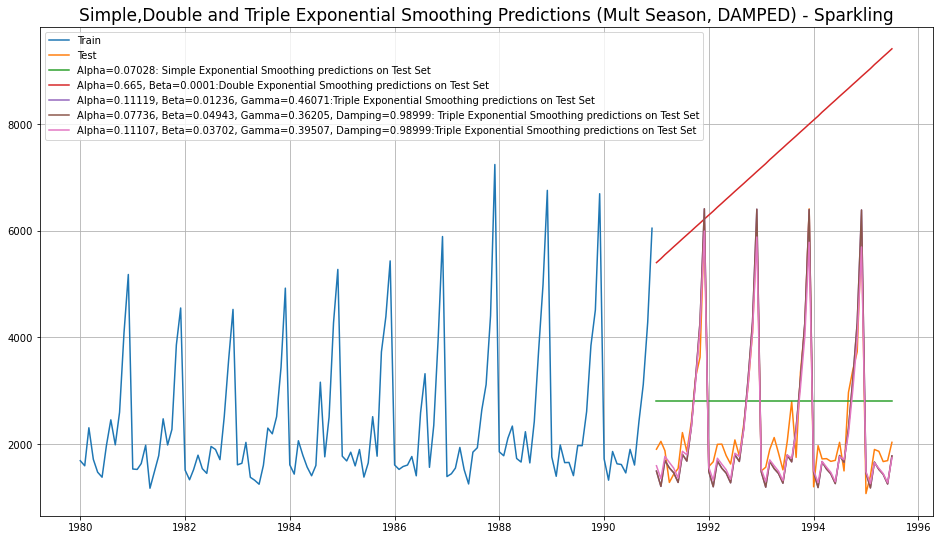

In [521]:
## Plotting the Training data, Test data and the forecasted values

plt.plot(strain, label='Train')
plt.plot(stest, label='Test')

plt.plot(SES_predict_spark, label='Alpha=0.07028: Simple Exponential Smoothing predictions on Test Set')
plt.plot(DES_predict_spark, label='Alpha=0.665, Beta=0.0001:Double Exponential Smoothing predictions on Test Set')
plt.plot(TES_predict_add_spark, label='Alpha=0.11119, Beta=0.01236, Gamma=0.46071:Triple Exponential Smoothing predictions on Test Set')
plt.plot(TES_predict_add_spark, label='Alpha=0.07736, Beta=0.04943, Gamma=0.36205, Damping=0.98999: Triple Exponential Smoothing predictions on Test Set')
plt.plot(TES_predict_am_damp_spark, label='Alpha=0.11107, Beta=0.03702, Gamma=0.39507, Damping=0.98999:Triple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Simple,Double and Triple Exponential Smoothing Predictions (Mult Season, DAMPED) - Sparkling', fontsize=17);

plt.savefig('spark_mul_damp_tes.jpg', bbox_inches='tight');

### Report model accuracy

In [522]:
print('TES_am DAMPED RMSE_spark:',mean_squared_error(stest.values,TES_predict_am_damp_spark.values,squared=False))

TES_am DAMPED RMSE_spark: 352.45096645100705


In [523]:
# resultsDf_temp = pd.DataFrame({'Test RMSE': [mean_squared_error(test.values,TES_predict_am.values,squared=False)]}
#                            ,index=['Alpha=0.74,Beta=2.73e-06,Gamma=5.2e-07,Gamma=0:TES'])

# resultsDf = pd.concat([resultsDf, resultsDf_temp])
# resultsDf

resultsDf_temp1 = pd.DataFrame({'Test RMSE Sparkling': [mean_squared_error(stest.values,TES_predict_am_damp_spark.values,squared=False)]}
                           ,index=['Triple Exponential Smoothing (Multiplicative Season, Damped Trend)'])



resultsDf_temp1

Test RMSE Sparkling
Triple Exponential Smoothing (Multiplicative Se...           352.450966

In [524]:
resultsDf13 = resultsDf_temp.join(resultsDf_temp1, how='outer')
resultsDf13

Test RMSE Rose  \
Triple Exponential Smoothing (Multiplicative Se...       25.994867   

                                                    Test RMSE Sparkling  
Triple Exponential Smoothing (Multiplicative Se...           352.450966

In [525]:
resultsDf14 = pd.concat([resultsDf, resultsDf13], axis=0)
resultsDf14

Test RMSE Rose  \
RegressionOnTime                                         15.268955   
NaiveModel                                               79.718773   
SimpleAverageModel                                       53.460570   
2pointTrailingMovingAverage                              11.529278   
4pointTrailingMovingAverage                              14.451403   
6pointTrailingMovingAverage                              14.566327   
9pointTrailingMovingAverage                              14.727630   
Simple Exponential Smoothing                             36.796225   
Double Exponential Smoothing                             15.270968   
Triple Exponential Smoothing (Additive Season)           14.243240   
Triple Exponential Smoothing (Multiplicative Se...       19.113110   
Triple Exponential Smoothing (Additive Season, ...       26.039948   
Triple Exponential Smoothing (Multiplicative Se...       25.994867   

                                                    Test RMSE Sparkling  
RegressionOnTime                                            1389.135175  
NaiveModel                                                  3864.279352  
SimpleAverageModel                                          1275.081804  
2pointTrailingMovingAverage                                  813.400684  
4pointTrailingMovingAverage                                 1156.589694  
6pointTrailingMovingAverage                                 1283.927428  
9pointTrailingMovingAverage                                 1346.278315  
Simple Exponential Smoothing                                1338.004623  
Double Exponential Smoothing                                5291.879833  
Triple Exponential Smoothing (Additive Season)               378.626241  
Triple Exponential Smoothing (Multiplicative Se...           403.706228  
Triple Exponential Smoothing (Additive Season, ...           378.626241  
Triple Exponential Smoothing (Multiplicative Se...           352.450966

In [526]:
resultsDf = resultsDf14.copy()
resultsDf

Test RMSE Rose  \
RegressionOnTime                                         15.268955   
NaiveModel                                               79.718773   
SimpleAverageModel                                       53.460570   
2pointTrailingMovingAverage                              11.529278   
4pointTrailingMovingAverage                              14.451403   
6pointTrailingMovingAverage                              14.566327   
9pointTrailingMovingAverage                              14.727630   
Simple Exponential Smoothing                             36.796225   
Double Exponential Smoothing                             15.270968   
Triple Exponential Smoothing (Additive Season)           14.243240   
Triple Exponential Smoothing (Multiplicative Se...       19.113110   
Triple Exponential Smoothing (Additive Season, ...       26.039948   
Triple Exponential Smoothing (Multiplicative Se...       25.994867   

                                                    Test RMSE Sparkling  
RegressionOnTime                                            1389.135175  
NaiveModel                                                  3864.279352  
SimpleAverageModel                                          1275.081804  
2pointTrailingMovingAverage                                  813.400684  
4pointTrailingMovingAverage                                 1156.589694  
6pointTrailingMovingAverage                                 1283.927428  
9pointTrailingMovingAverage                                 1346.278315  
Simple Exponential Smoothing                                1338.004623  
Double Exponential Smoothing                                5291.879833  
Triple Exponential Smoothing (Additive Season)               378.626241  
Triple Exponential Smoothing (Multiplicative Se...           403.706228  
Triple Exponential Smoothing (Additive Season, ...           378.626241  
Triple Exponential Smoothing (Multiplicative Se...           352.450966

In [527]:
resultsDf.to_csv('results_all.csv')

## Best Model for Rose till Now - 2 Pt Moving Average

In [528]:
MovingAverage = dfr.copy()
MovingAverage.head()

Rose
YearMonth        
1980-01-01  112.0
1980-02-01  118.0
1980-03-01  129.0
1980-04-01   99.0
1980-05-01  116.0

#### Trailing moving averages

In [529]:

MovingAverage['Trailing_2'] = MovingAverage['Rose'].rolling(2).mean()

MovingAverage.head()

Rose  Trailing_2
YearMonth                    
1980-01-01  112.0         NaN
1980-02-01  118.0       115.0
1980-03-01  129.0       123.5
1980-04-01   99.0       114.0
1980-05-01  116.0       107.5

In [530]:
#Creating train and test set 
trailing_MovingAverage_train=MovingAverage[MovingAverage.index<'1991'] 
trailing_MovingAverage_test=MovingAverage[MovingAverage.index>='1991']

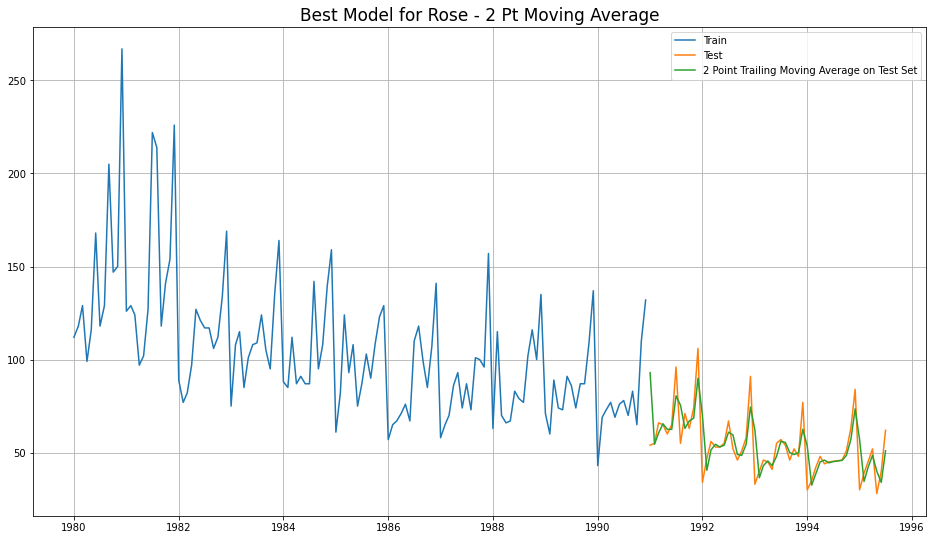

In [531]:
## Plotting on both the Training and Test data

plt.figure(figsize=(16,9))
plt.plot(trailing_MovingAverage_train['Rose'], label='Train')
plt.plot(trailing_MovingAverage_test['Rose'], label='Test')


plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on Test Set')


plt.legend(loc = 'best')
plt.grid();
plt.title('Best Model for Rose - 2 Pt Moving Average', fontsize=17);
plt.savefig('rose_best_model_2pt.jpg', bbox_inches='tight');

## Holt-Winters - ETS(A, A, M) - Best Model for Sparkling Till Now

### ETS(A, Ad, M) model - Taking MULTIPLICATIVE SEASONALITY

### USING DAMPED TREND

In [532]:
# Initializing the Double Exponential Smoothing Model
model_TES_am = ExponentialSmoothing(strain,trend='add',seasonal='multiplicative',initialization_method='estimated', damped_trend=True)
# Fitting the model
model_TES_am = model_TES_am.fit()

print('')
print('==Holt Winters model Exponential Smoothing Estimated Parameters ==')
print('')
print(model_TES_am.params)

/Users/chetan/DS/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)



==Holt Winters model Exponential Smoothing Estimated Parameters ==

{'smoothing_level': 0.11107167193609957, 'smoothing_trend': 0.03702389980900021, 'smoothing_seasonal': 0.39507932654880007, 'damping_trend': 0.9899999404869427, 'initial_level': 2356.5417871804284, 'initial_trend': -9.180203948562786, 'initial_seasons': array([0.71435356, 0.69069064, 0.89984145, 0.80656905, 0.65538317,
       0.65588695, 0.88269091, 1.12243518, 0.91850081, 1.19454491,
       1.85207394, 2.34037914]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


In [533]:
# Forecasting using this model for the duration of the test set
TES_predict_am_damp_spark =  model_TES_am.forecast(len(stest))
TES_predict_am_damp_spark

1991-01-01    1591.400712
1991-02-01    1348.109039
1991-03-01    1768.331811
1991-04-01    1654.048544
1991-05-01    1548.113612
1991-06-01    1363.568481
1991-07-01    1862.870528
1991-08-01    1797.339996
1991-09-01    2310.534562
1991-10-01    3163.672919
1991-11-01    4176.949302
1991-12-01    5994.180382
1992-01-01    1558.894787
1992-02-01    1320.798853
1992-03-01    1732.803577
1992-04-01    1621.090460
1992-05-01    1517.521178
1992-06-01    1336.845841
1992-07-01    1826.665407
1992-08-01    1762.698529
1992-09-01    2266.372327
1992-10-01    3103.708097
1992-11-01    4098.439393
1992-12-01    5882.455650
1993-01-01    1530.082048
1993-02-01    1296.591536
1993-03-01    1701.311911
1993-04-01    1591.876934
1993-05-01    1490.404527
1993-06-01    1313.159315
1993-07-01    1794.573759
1993-08-01    1731.992878
1993-09-01    2227.227618
1993-10-01    3050.556224
1993-11-01    4028.849447
1993-12-01    5783.424610
1994-01-01    1504.542891
1994-02-01    1275.134551
1994-03-01  

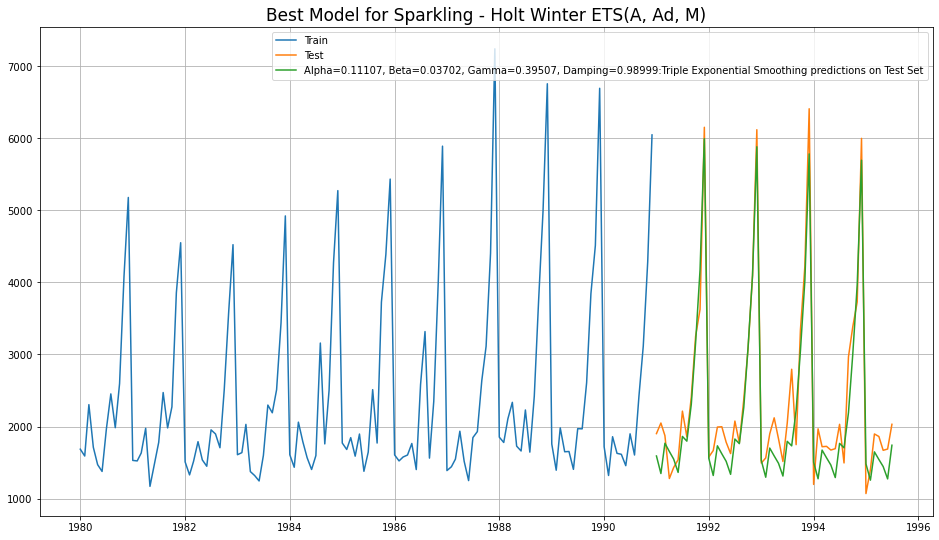

In [534]:
## Plotting the Training data, Test data and the forecasted values

plt.plot(strain, label='Train')
plt.plot(stest, label='Test')

plt.plot(TES_predict_am_damp_spark, label='Alpha=0.11107, Beta=0.03702, Gamma=0.39507, Damping=0.98999:Triple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Best Model for Sparkling - Holt Winter ETS(A, Ad, M)', fontsize=17);

plt.savefig('spark_best_model.jpg', bbox_inches='tight');

# ==================================================================================================================

# ==================================================================================================================

## Check Stationarity of ROSE Data

The Augmented Dickey-Fuller test is an unit root test which determines whether there is a unit root and subsequently whether the series is non-stationary.

The hypothesis in a simple form for the ADF test is:
* $H_0$ : The Time Series has a unit root and is thus non-stationary.
* $H_1$ : The Time Series does not have a unit root and is thus stationary.

We would want the series to be stationary for building ARIMA models and thus we would want the p-value of this test to be less than the $\alpha$ value.

In [535]:
from statsmodels.tsa.stattools import adfuller

In [536]:
dfrs = adfuller(dfr,regression='ct')
print('DF test statistic is %3.3f' %dfrs[0])
print('DF test p-value is' ,dfrs[1])
print('Number of lags used' ,dfrs[2])

DF test statistic is -2.240
DF test p-value is 0.46713716277931133
Number of lags used 13


We see that at 5% significant level the Time Series is non-stationary.

Let us take one level of differencing to see whether the series becomes stationary.

In [537]:
dfrs = adfuller(dfr.diff().dropna(),regression='ct')
print('DF test statistic is %3.3f' %dfrs[0])
print('DF test p-value is' ,dfrs[1])
print('Number of lags used' ,dfrs[2])

DF test statistic is -8.162
DF test p-value is 3.015976115827714e-11
Number of lags used 12


We see that p-value < alpha=0.05
Hence, we reject the Null Hypothesis

We conclude that with a lag 1 - now the Rose data is Stationary

Now, let us go ahead and plot the stationary series.

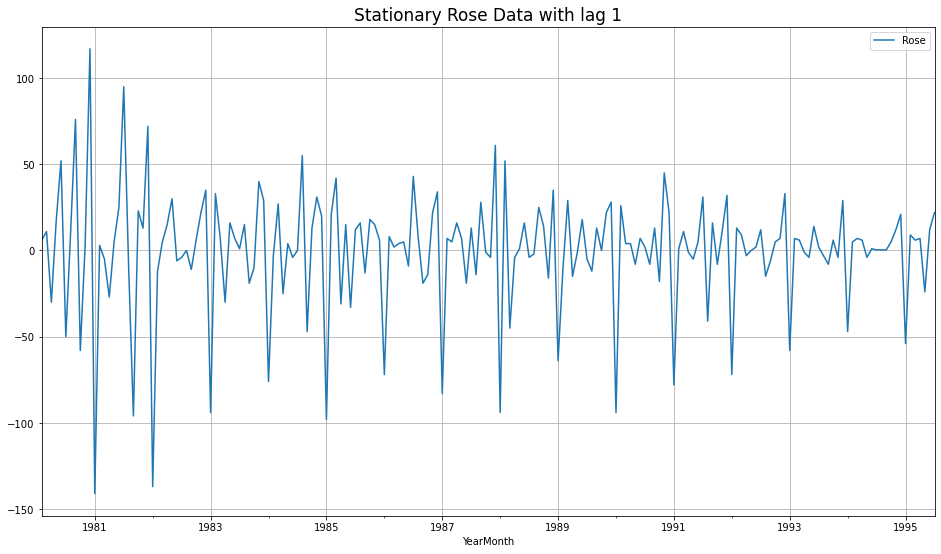

In [538]:
dfr.diff().dropna().plot(grid=True);
plt.title('Stationary Rose Data with lag 1', fontsize=17);
plt.savefig('rose_stationary.jpg', bbox_inches='tight');

## Check Stationarity of SPARKLING Data

The Augmented Dickey-Fuller test is an unit root test which determines whether there is a unit root and subsequently whether the series is non-stationary.

The hypothesis in a simple form for the ADF test is:
* $H_0$ : The Time Series has a unit root and is thus non-stationary.
* $H_1$ : The Time Series does not have a unit root and is thus stationary.

We would want the series to be stationary for building ARIMA models and thus we would want the p-value of this test to be less than the $\alpha$ value.

In [539]:
dfss = adfuller(dfs,regression='ct')
print('DF test statistic is %3.3f' %dfss[0])
print('DF test p-value is' ,dfss[1])
print('Number of lags used' ,dfss[2])

DF test statistic is -1.798
DF test p-value is 0.7055958459932584
Number of lags used 12


We see that at 5% significant level the Time Series is non-stationary.

Let us take one level of differencing to see whether the series becomes stationary.

In [540]:
dfss = adfuller(dfs.diff().dropna(),regression='ct')
print('DF test statistic is %3.3f' %dfss[0])
print('DF test p-value is' ,dfss[1])
print('Number of lags used' ,dfss[2])

DF test statistic is -44.912
DF test p-value is 0.0
Number of lags used 10


We see that p-value < alpha=0.05
Hence, we reject the Null Hypothesis

We conclude that with a lag 1 - now the Sparkling data is Stationary

Now, let us go ahead and plot the stationary series.

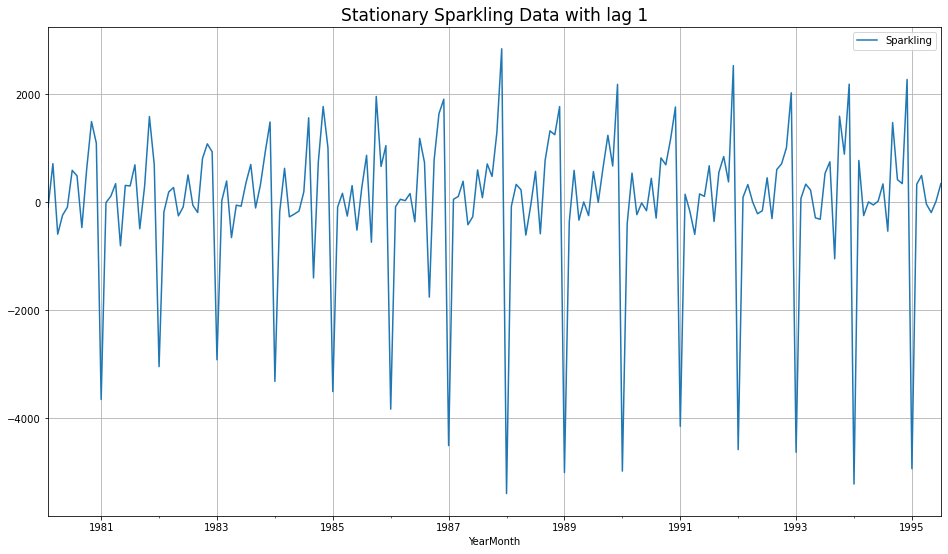

In [541]:
dfs.diff().dropna().plot(grid=True);
plt.title('Stationary Sparkling Data with lag 1', fontsize=17);
plt.savefig('spark_stationary.jpg', bbox_inches='tight');


## ARIMA / SARIMA on ROSE

### Check for Stationarity of Rose Train Data

Let us plot the training data once.

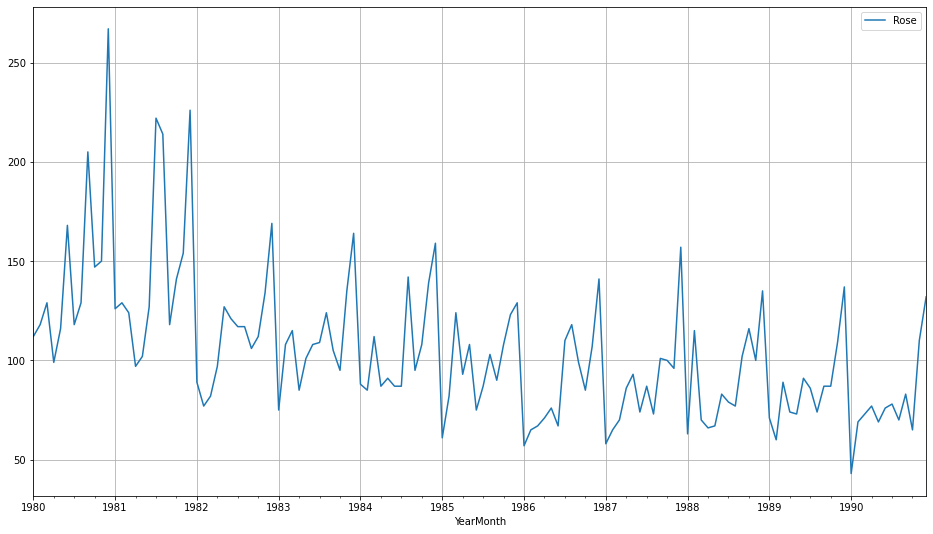

In [542]:
rtrain.plot(grid=True);

In [543]:
dftest = adfuller(rtrain,regression='ct')
print('DF test statistic is %3.3f' %dftest[0])
print('DF test p-value is' ,dftest[1])
print('Number of lags used' ,dftest[2])

DF test statistic is -1.686
DF test p-value is 0.7569093051047098
Number of lags used 13


The training data is non-stationary at 95% confidence level. Let us take a first level of differencing to stationarize the Time Series.

In [544]:
dftest = adfuller(rtrain.diff().dropna(),regression='ct')
print('DF test statistic is %3.3f' %dftest[0])
print('DF test p-value is' ,dftest[1])
print('Number of lags used' ,dftest[2])

DF test statistic is -6.804
DF test p-value is 3.8948313567828775e-08
Number of lags used 12


p-value < 0.05 ------> So at 95% Confidence Interval. Train Rose data is Stationary with lag 1
Now, let us go ahead and plot the differenced training data.

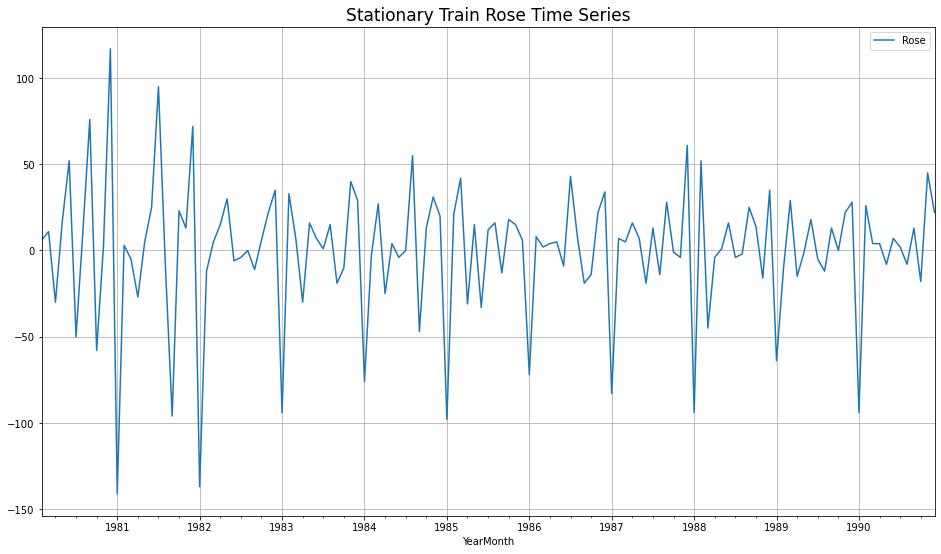

In [545]:
rtrain.diff().dropna().plot(grid=True);
plt.title('Stationary Train Rose Time Series', fontsize=17)
plt.savefig('rose_train_stationary.jpg', bbox_inches='tight');

In [546]:
rtrain.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 132 entries, 1980-01-01 to 1990-12-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Rose    132 non-null    float64
dtypes: float64(1)
memory usage: 2.1 KB


## Build an Automated version of an ARIMA model for which the best parameters are selected in accordance with the lowest Akaike Information Criteria (AIC).

##### Note: The data has some seasonality so ideally we should build a SARIMA model. But lets test on the lowest Akaike Information Criteria, which one suits best - ARIMA or SARIMA

In [547]:
## The following loop helps us in getting a combination of different parameters of p and q in the range of 0 and 2
## As seen before, Stationarity is achived with a difference of 1.
## We have kept the value of d as 1

import itertools

p = q = range(0, 4)
d= range(1,2)
pdq = list(itertools.product(p, d, q))

print('Examples of the parameter combinations for the Model')

for i in range(0,len(pdq)):
    print('Model: {}'.format(pdq[i]))

Examples of the parameter combinations for the Model
Model: (0, 1, 0)
Model: (0, 1, 1)
Model: (0, 1, 2)
Model: (0, 1, 3)
Model: (1, 1, 0)
Model: (1, 1, 1)
Model: (1, 1, 2)
Model: (1, 1, 3)
Model: (2, 1, 0)
Model: (2, 1, 1)
Model: (2, 1, 2)
Model: (2, 1, 3)
Model: (3, 1, 0)
Model: (3, 1, 1)
Model: (3, 1, 2)
Model: (3, 1, 3)


In [548]:
# Creating an empty Dataframe with column names only
ROSE_ARIMA_AIC = pd.DataFrame(columns=['param', 'AIC'])
ROSE_ARIMA_AIC

Empty DataFrame
Columns: [param, AIC]
Index: []

In [549]:
from statsmodels.tsa.arima.model import ARIMA

for param in pdq:# running a loop within the pdq parameters defined by itertools
    ARIMA_model = ARIMA(rtrain['Rose'].values,order=param).fit()#fitting the ARIMA model
    #using the parameters from the loop
    print('ARIMA{} - AIC:{}'.format(param,ARIMA_model.aic))#printing the parameters and the AIC
    #from the fitted models
    ROSE_ARIMA_AIC = ROSE_ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)
    #appending the AIC values and the model parameters to the previously created data frame
    #for easier understanding and sorting of the AIC values

ARIMA(0, 1, 0) - AIC:1333.1546729124348
ARIMA(0, 1, 1) - AIC:1282.3098319748333
ARIMA(0, 1, 2) - AIC:1279.6715288535797
ARIMA(0, 1, 3) - AIC:1280.5453761734648
ARIMA(1, 1, 0) - AIC:1317.3503105381526
ARIMA(1, 1, 1) - AIC:1280.5742295380078
ARIMA(1, 1, 2) - AIC:1279.870723423192
ARIMA(1, 1, 3) - AIC:1281.8707223309914
ARIMA(2, 1, 0) - AIC:1298.6110341604958
ARIMA(2, 1, 1) - AIC:1281.5078621868524
ARIMA(2, 1, 2) - AIC:1281.8707222264584


/Users/chetan/DS/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/Users/chetan/DS/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/chetan/DS/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ARIMA(2, 1, 3) - AIC:1274.6948698861079
ARIMA(3, 1, 0) - AIC:1297.4810917271725
ARIMA(3, 1, 1) - AIC:1282.419277627196
ARIMA(3, 1, 2) - AIC:1283.720740597716
ARIMA(3, 1, 3) - AIC:1278.6559777950524


/Users/chetan/DS/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


In [550]:
## Sort the above AIC values in the ascending order to get the parameters for the minimum AIC value

ROSE_ARIMA_AIC.sort_values(by='AIC',ascending=True).head()

param          AIC
11  (2, 1, 3)  1274.694870
15  (3, 1, 3)  1278.655978
2   (0, 1, 2)  1279.671529
6   (1, 1, 2)  1279.870723
3   (0, 1, 3)  1280.545376

In [551]:
auto_ARIMA = ARIMA(rtrain, order=(2,1,3))

results_auto_ARIMA = auto_ARIMA.fit()

print(results_auto_ARIMA.summary())

/Users/chetan/DS/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/chetan/DS/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/chetan/DS/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


                               SARIMAX Results                                
Dep. Variable:                   Rose   No. Observations:                  132
Model:                 ARIMA(2, 1, 3)   Log Likelihood                -631.347
Date:                Sat, 27 Mar 2021   AIC                           1274.695
Time:                        14:11:13   BIC                           1291.946
Sample:                    01-01-1980   HQIC                          1281.705
                         - 12-01-1990                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.6779      0.084    -20.038      0.000      -1.842      -1.514
ar.L2         -0.7287      0.084     -8.701      0.000      -0.893      -0.565
ma.L1          1.0447      0.660      1.583      0.1

/Users/chetan/DS/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


### Rose Train Diagnostics plot.

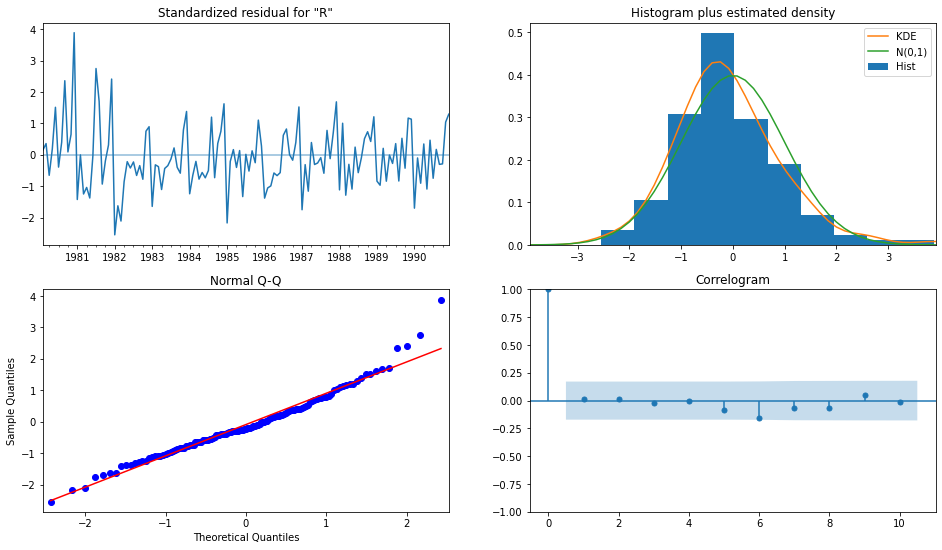

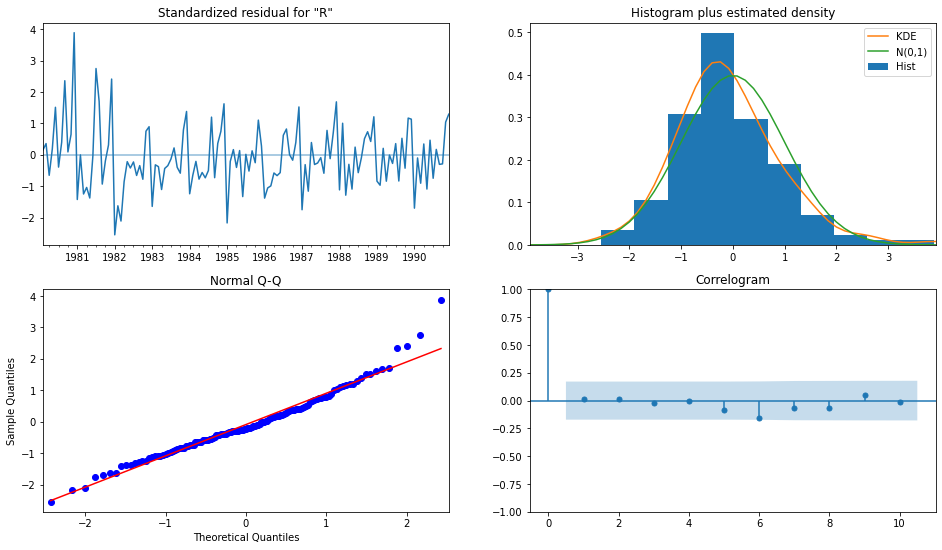

In [552]:

results_auto_ARIMA.plot_diagnostics();

plt.savefig('rose_diag_plot.jpg', bbox_inches='tight')

## Predict on the Rose Test Set using this model and evaluate the model.

In [553]:
predicted_auto_ARIMA = results_auto_ARIMA.forecast(steps=len(rtest))
predicted_auto_ARIMA

1991-01-01    85.580378
1991-02-01    90.550478
1991-03-01    81.951645
1991-04-01    92.757905
1991-05-01    80.892136
1991-06-01    92.927053
1991-07-01    81.380416
1991-08-01    91.984496
1991-09-01    82.606124
1991-10-01    90.614731
1991-11-01    84.011264
1991-12-01    89.255213
1992-01-01    85.268453
1992-02-01    88.136477
1992-03-01    86.229447
1992-04-01    87.339267
1992-05-01    86.866793
1992-06-01    86.850806
1992-07-01    87.221937
1992-08-01    86.610859
1992-09-01    87.365742
1992-10-01    86.544423
1992-11-01    87.372422
1992-12-01    86.581630
1993-01-01    87.305125
1993-02-01    86.667435
1993-03-01    87.210192
1993-04-01    86.764195
1993-05-01    87.117017
1993-06-01    86.850023
1993-07-01    87.040905
1993-08-01    86.915188
1993-09-01    86.987029
1993-10-01    86.958099
1993-11-01    86.954288
1993-12-01    86.981765
1994-01-01    86.938438
1994-02-01    86.991114
1994-03-01    86.934302
1994-04-01    86.991241
1994-05-01    86.937103
1994-06-01    86

In [554]:
## Mean Absolute Percentage Error (MAPE) - Function Definition

def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean((np.abs(y_true-y_pred))/(y_true))*100

## Importing the mean_squared_error function from sklearn to calculate the RMSE

from sklearn.metrics import mean_squared_error

In [555]:
rmse = mean_squared_error(rtest['Rose'],predicted_auto_ARIMA,squared=False)
mape = mean_absolute_percentage_error(rtest['Rose'],predicted_auto_ARIMA)
print('RMSE:',rmse,'\nMAPE:',mape)

RMSE: 36.81224915333075 
MAPE: 75.8371929255473


In [556]:
resultsR0 = pd.DataFrame({'Test RMSE Rose': rmse,'Test MAPE Rose':mape}
                           ,index=['ARIMA(2,1,3)'])

resultsR0.to_csv('rose_arima_auto_213.csv')
resultsR0

Test RMSE Rose  Test MAPE Rose
ARIMA(2,1,3)       36.812249       75.837193

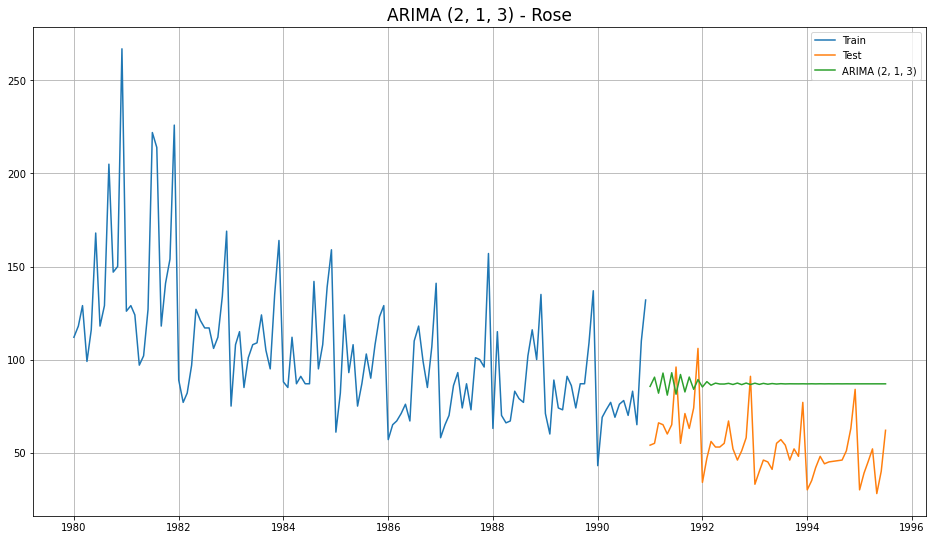

In [557]:
## Plotting the Training data, Test data and the forecasted values

plt.plot(rtrain, label='Train')
plt.plot(rtest, label='Test')
plt.plot(predicted_auto_ARIMA,label='ARIMA (2, 1, 3)')


plt.legend(loc='best')
plt.grid()
plt.title('ARIMA (2, 1, 3) - Rose', fontsize=17);

plt.savefig('rose_arima_auto_213.jpg', bbox_inches='tight');

## Build a version of the ARIMA model for which the best parameters are selected by looking at the ACF and the PACF plots on ROSE dataset

Let us look at the ACF and the PACF plots once more.

In [558]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

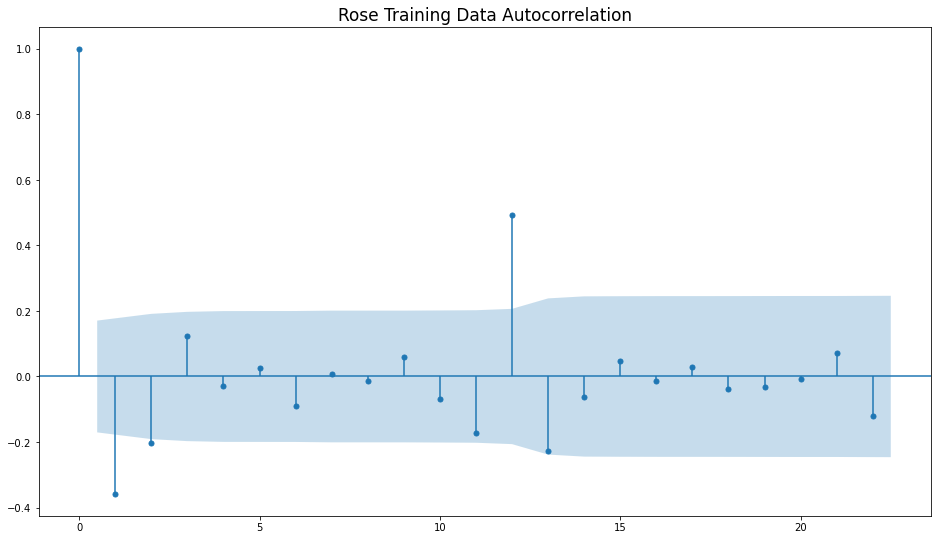

In [559]:
plot_acf(rtrain.diff(), missing='drop', alpha=0.05)
plt.title('Rose Training Data Autocorrelation',fontsize=17)
plt.savefig('rose_train_acf.jpg', bbox_inches='tight');


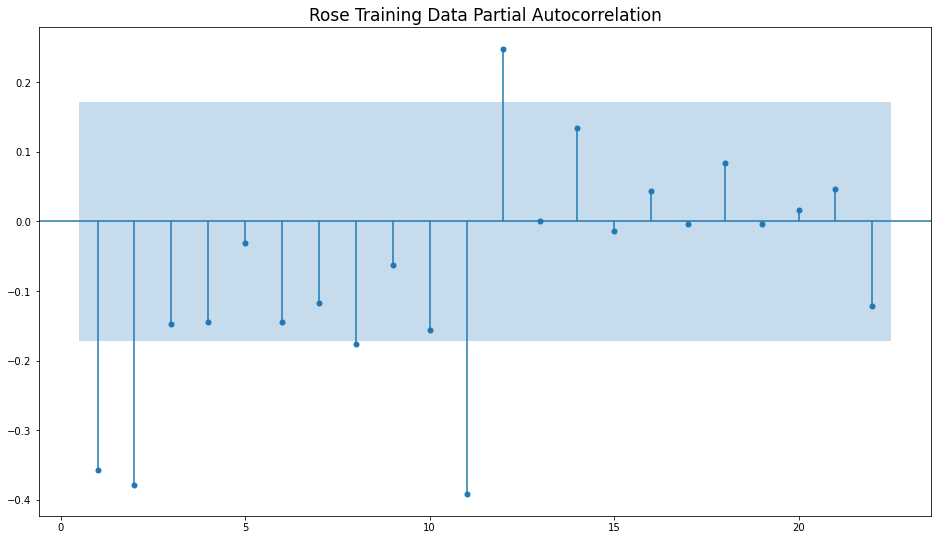

In [560]:
plot_pacf(rtrain.diff().dropna(), zero=False, alpha=0.05, method='ywmle')
plt.title('Rose Training Data Partial Autocorrelation',fontsize=17)
plt.savefig('rose_train_pacf.jpg', bbox_inches='tight');



Here, we have taken alpha=0.05.

* The Auto-Regressive parameter in an ARIMA model is 'p' which comes from the significant lag before which the PACF plot cuts-off
* The Moving-Average parameter in an ARIMA model is 'q' which comes from the significant lag before the ACF plot cuts-off

By looking at the above plots, we will take the value of p and q to be 2 and 2 respectively.

In [561]:
manual_ARIMA = ARIMA(rtrain['Rose'], order=(2,1,2))

results_manual_ARIMA = manual_ARIMA.fit()

print(results_manual_ARIMA.summary())

                               SARIMAX Results                                
Dep. Variable:                   Rose   No. Observations:                  132
Model:                 ARIMA(2, 1, 2)   Log Likelihood                -635.935
Date:                Sat, 27 Mar 2021   AIC                           1281.871
Time:                        14:11:18   BIC                           1296.247
Sample:                    01-01-1980   HQIC                          1287.712
                         - 12-01-1990                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4540      0.469     -0.969      0.333      -1.372       0.464
ar.L2          0.0001      0.170      0.001      0.999      -0.334       0.334
ma.L1         -0.2541      0.459     -0.554      0.5

/Users/chetan/DS/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/chetan/DS/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/chetan/DS/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Let us analyse the residuals from the various diagnostics plot.

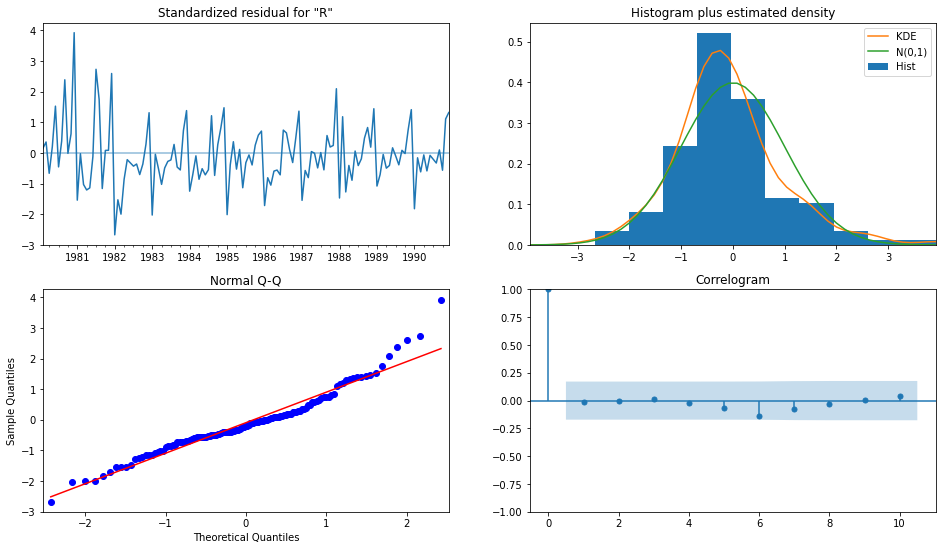

In [562]:
results_manual_ARIMA.plot_diagnostics();
plt.savefig('rose_train_manual_diag_plot.jpg', bbox_inches='tight');

## Predict on the Test Set using this model and evaluate the model.

In [563]:
predicted_manual_ARIMA = results_manual_ARIMA.forecast(steps=len(rtest))

In [564]:
rmse = mean_squared_error(rtest['Rose'],predicted_manual_ARIMA,squared=False)
mape = mean_absolute_percentage_error(rtest['Rose'],predicted_manual_ARIMA)
print('RMSE:',rmse,'\nMAPE:',mape)

RMSE: 36.871196615481196 
MAPE: 76.05621270892694


In [565]:
temp_resultsR2 = pd.DataFrame({'Test RMSE Rose': rmse,'Test MAPE Rose':mape}
                           ,index=['ARIMA(2,1,2)'])


resultsR2 = pd.concat([resultsR0,temp_resultsR2])

resultsR2

Test RMSE Rose  Test MAPE Rose
ARIMA(2,1,3)       36.812249       75.837193
ARIMA(2,1,2)       36.871197       76.056213

In [566]:
resultsR0 = resultsR2.copy()
resultsR0

Test RMSE Rose  Test MAPE Rose
ARIMA(2,1,3)       36.812249       75.837193
ARIMA(2,1,2)       36.871197       76.056213

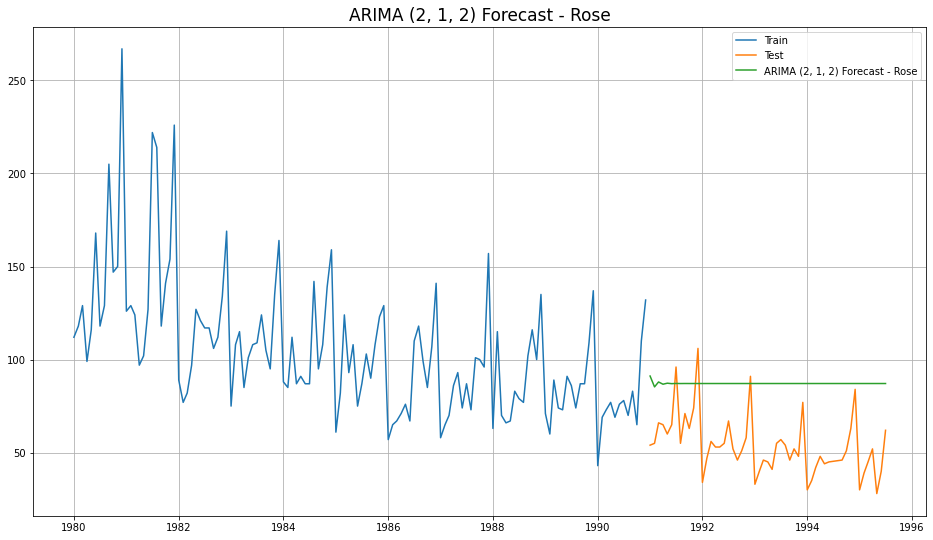

In [567]:
plt.plot(rtrain, label='Train')
plt.plot(rtest, label='Test')

plt.plot(predicted_manual_ARIMA, label = 'ARIMA (2, 1, 2) Forecast - Rose')
plt.grid()
plt.legend(loc='best')
plt.title('ARIMA (2, 1, 2) Forecast - Rose', fontsize=17)
plt.savefig('rose_arima_manual_forecast.jpg', bbox_inches='tight');

## Build an Automated version of a SARIMA model for which the best parameters are selected in accordance with the lowest Akaike Information Criteria (AIC) - ROSE DATA

Let us look at the ACF plot once more to understand the seasonal parameter for the SARIMA model.

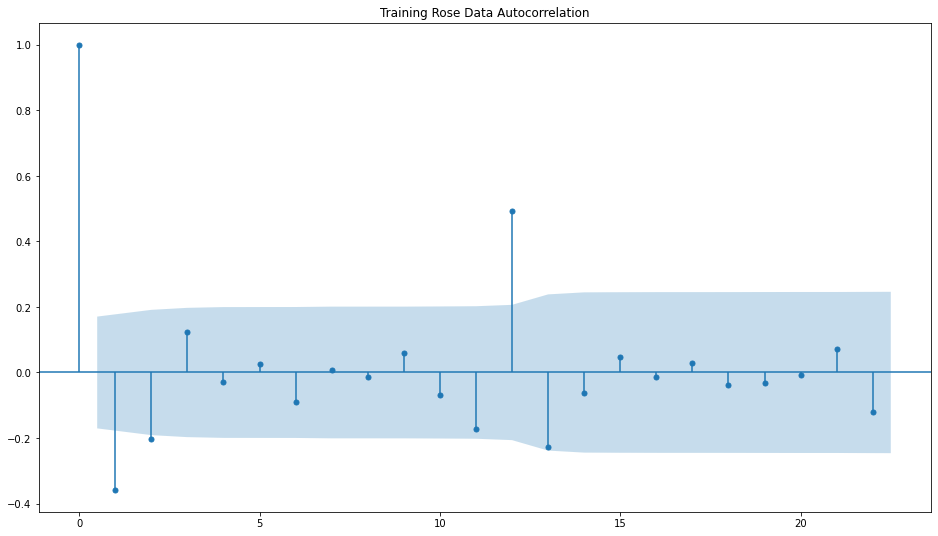

In [568]:
plot_acf(rtrain.diff(),title='Training Rose Data Autocorrelation',missing='drop');

We can see that there is a seasonality.

In [569]:
import itertools
p = q = range(0, 4)
d= range(1,2)
D = range(0,1)
pdq = list(itertools.product(p, d, q))
PDQ = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, D, q))]
print('Examples of the parameter combinations for the Model are')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], PDQ[i]))

Examples of the parameter combinations for the Model are
Model: (0, 1, 1)(0, 0, 1, 12)
Model: (0, 1, 2)(0, 0, 2, 12)
Model: (0, 1, 3)(0, 0, 3, 12)
Model: (1, 1, 0)(1, 0, 0, 12)
Model: (1, 1, 1)(1, 0, 1, 12)
Model: (1, 1, 2)(1, 0, 2, 12)
Model: (1, 1, 3)(1, 0, 3, 12)
Model: (2, 1, 0)(2, 0, 0, 12)
Model: (2, 1, 1)(2, 0, 1, 12)
Model: (2, 1, 2)(2, 0, 2, 12)
Model: (2, 1, 3)(2, 0, 3, 12)
Model: (3, 1, 0)(3, 0, 0, 12)
Model: (3, 1, 1)(3, 0, 1, 12)
Model: (3, 1, 2)(3, 0, 2, 12)
Model: (3, 1, 3)(3, 0, 3, 12)


In [570]:
SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC

Empty DataFrame
Columns: [param, seasonal, AIC]
Index: []

In [571]:
import statsmodels.api as sm

for param in pdq:
    for param_seasonal in PDQ:
        SARIMA_model = sm.tsa.statespace.SARIMAX(rtrain['Rose'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA = SARIMA_model.fit(maxiter=1000)
        print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)

SARIMA(0, 1, 0)x(0, 0, 0, 12) - AIC:1323.9657875279158
SARIMA(0, 1, 0)x(0, 0, 1, 12) - AIC:1145.4230827207302
SARIMA(0, 1, 0)x(0, 0, 2, 12) - AIC:976.4375296380902
SARIMA(0, 1, 0)x(0, 0, 3, 12) - AIC:4089.366325523335
SARIMA(0, 1, 0)x(1, 0, 0, 12) - AIC:1139.921738995602
SARIMA(0, 1, 0)x(1, 0, 1, 12) - AIC:1116.0207869385956
SARIMA(0, 1, 0)x(1, 0, 2, 12) - AIC:969.6913635751866


/Users/chetan/DS/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


SARIMA(0, 1, 0)x(1, 0, 3, 12) - AIC:4871.174291274871
SARIMA(0, 1, 0)x(2, 0, 0, 12) - AIC:960.8812220353041
SARIMA(0, 1, 0)x(2, 0, 1, 12) - AIC:962.8794540697567
SARIMA(0, 1, 0)x(2, 0, 2, 12) - AIC:955.5735408946032


/Users/chetan/DS/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


SARIMA(0, 1, 0)x(2, 0, 3, 12) - AIC:4546.361660702515
SARIMA(0, 1, 0)x(3, 0, 0, 12) - AIC:850.7535403931054
SARIMA(0, 1, 0)x(3, 0, 1, 12) - AIC:851.748270274044
SARIMA(0, 1, 0)x(3, 0, 2, 12) - AIC:850.5304136127387


/Users/chetan/DS/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


SARIMA(0, 1, 0)x(3, 0, 3, 12) - AIC:4264.059260075438
SARIMA(0, 1, 1)x(0, 0, 0, 12) - AIC:1263.5369097383966
SARIMA(0, 1, 1)x(0, 0, 1, 12) - AIC:1098.555482591834
SARIMA(0, 1, 1)x(0, 0, 2, 12) - AIC:923.631404938392


/Users/chetan/DS/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


SARIMA(0, 1, 1)x(0, 0, 3, 12) - AIC:3951.520972296334
SARIMA(0, 1, 1)x(1, 0, 0, 12) - AIC:1095.7936324918212
SARIMA(0, 1, 1)x(1, 0, 1, 12) - AIC:1054.7434330947335
SARIMA(0, 1, 1)x(1, 0, 2, 12) - AIC:918.8573483313946


/Users/chetan/DS/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


SARIMA(0, 1, 1)x(1, 0, 3, 12) - AIC:4816.697581315651
SARIMA(0, 1, 1)x(2, 0, 0, 12) - AIC:914.5982866535958
SARIMA(0, 1, 1)x(2, 0, 1, 12) - AIC:915.3332430461662
SARIMA(0, 1, 1)x(2, 0, 2, 12) - AIC:901.1988283582562


/Users/chetan/DS/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


SARIMA(0, 1, 1)x(2, 0, 3, 12) - AIC:4136.065524113511
SARIMA(0, 1, 1)x(3, 0, 0, 12) - AIC:798.588976480727
SARIMA(0, 1, 1)x(3, 0, 1, 12) - AIC:800.4844933829291
SARIMA(0, 1, 1)x(3, 0, 2, 12) - AIC:801.0595269385346


/Users/chetan/DS/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


SARIMA(0, 1, 1)x(3, 0, 3, 12) - AIC:3630.4233752862815
SARIMA(0, 1, 2)x(0, 0, 0, 12) - AIC:1251.6675430541045
SARIMA(0, 1, 2)x(0, 0, 1, 12) - AIC:1083.4866975265002
SARIMA(0, 1, 2)x(0, 0, 2, 12) - AIC:913.49384866177


/Users/chetan/DS/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


SARIMA(0, 1, 2)x(0, 0, 3, 12) - AIC:2727.244690029061
SARIMA(0, 1, 2)x(1, 0, 0, 12) - AIC:1088.833284341356
SARIMA(0, 1, 2)x(1, 0, 1, 12) - AIC:1045.5400933488863
SARIMA(0, 1, 2)x(1, 0, 2, 12) - AIC:904.8310913586356


/Users/chetan/DS/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


SARIMA(0, 1, 2)x(1, 0, 3, 12) - AIC:4534.123734471623
SARIMA(0, 1, 2)x(2, 0, 0, 12) - AIC:913.0105912257985
SARIMA(0, 1, 2)x(2, 0, 1, 12) - AIC:914.1707545031934
SARIMA(0, 1, 2)x(2, 0, 2, 12) - AIC:887.9375085676787


/Users/chetan/DS/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


SARIMA(0, 1, 2)x(2, 0, 3, 12) - AIC:3847.2228189120515
SARIMA(0, 1, 2)x(3, 0, 0, 12) - AIC:800.1020189374806
SARIMA(0, 1, 2)x(3, 0, 1, 12) - AIC:801.9941080533825
SARIMA(0, 1, 2)x(3, 0, 2, 12) - AIC:802.5206528518831


/Users/chetan/DS/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


SARIMA(0, 1, 2)x(3, 0, 3, 12) - AIC:2278.261877801292
SARIMA(0, 1, 3)x(0, 0, 0, 12) - AIC:1243.9501216739102
SARIMA(0, 1, 3)x(0, 0, 1, 12) - AIC:1076.7632646085688
SARIMA(0, 1, 3)x(0, 0, 2, 12) - AIC:905.6926533380737


/Users/chetan/DS/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


SARIMA(0, 1, 3)x(0, 0, 3, 12) - AIC:4599.139595118176
SARIMA(0, 1, 3)x(1, 0, 0, 12) - AIC:1089.205136121225
SARIMA(0, 1, 3)x(1, 0, 1, 12) - AIC:1034.8411212937158
SARIMA(0, 1, 3)x(1, 0, 2, 12) - AIC:896.8362523339639


/Users/chetan/DS/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


SARIMA(0, 1, 3)x(1, 0, 3, 12) - AIC:4662.943946838033
SARIMA(0, 1, 3)x(2, 0, 0, 12) - AIC:914.9477108987031
SARIMA(0, 1, 3)x(2, 0, 1, 12) - AIC:916.0630996894947
SARIMA(0, 1, 3)x(2, 0, 2, 12) - AIC:880.5509788250604


/Users/chetan/DS/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


SARIMA(0, 1, 3)x(2, 0, 3, 12) - AIC:4047.6452625095067
SARIMA(0, 1, 3)x(3, 0, 0, 12) - AIC:802.0987124692441
SARIMA(0, 1, 3)x(3, 0, 1, 12) - AIC:803.9928772338319
SARIMA(0, 1, 3)x(3, 0, 2, 12) - AIC:804.5150724212011


/Users/chetan/DS/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


SARIMA(0, 1, 3)x(3, 0, 3, 12) - AIC:3430.068906792863
SARIMA(1, 1, 0)x(0, 0, 0, 12) - AIC:1308.161871082466
SARIMA(1, 1, 0)x(0, 0, 1, 12) - AIC:1135.2955447585698
SARIMA(1, 1, 0)x(0, 0, 2, 12) - AIC:963.940539125769


/Users/chetan/DS/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


SARIMA(1, 1, 0)x(0, 0, 3, 12) - AIC:3786.3025965743686
SARIMA(1, 1, 0)x(1, 0, 0, 12) - AIC:1124.886078680457
SARIMA(1, 1, 0)x(1, 0, 1, 12) - AIC:1105.4080055021473
SARIMA(1, 1, 0)x(1, 0, 2, 12) - AIC:958.5001972948447


/Users/chetan/DS/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


SARIMA(1, 1, 0)x(1, 0, 3, 12) - AIC:5091.620397106478
SARIMA(1, 1, 0)x(2, 0, 0, 12) - AIC:939.0984778664048
SARIMA(1, 1, 0)x(2, 0, 1, 12) - AIC:940.9087133661072
SARIMA(1, 1, 0)x(2, 0, 2, 12) - AIC:942.2973103071184


/Users/chetan/DS/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


SARIMA(1, 1, 0)x(2, 0, 3, 12) - AIC:4056.993684557321
SARIMA(1, 1, 0)x(3, 0, 0, 12) - AIC:819.3931032272563
SARIMA(1, 1, 0)x(3, 0, 1, 12) - AIC:821.1501371573486
SARIMA(1, 1, 0)x(3, 0, 2, 12) - AIC:819.1305086849646


/Users/chetan/DS/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


SARIMA(1, 1, 0)x(3, 0, 3, 12) - AIC:3464.8232636810435
SARIMA(1, 1, 1)x(0, 0, 0, 12) - AIC:1262.1840064255512
SARIMA(1, 1, 1)x(0, 0, 1, 12) - AIC:1094.3172708640793
SARIMA(1, 1, 1)x(0, 0, 2, 12) - AIC:923.0862224063885
SARIMA(1, 1, 1)x(0, 0, 3, 12) - AIC:4057.0804418919747
SARIMA(1, 1, 1)x(1, 0, 0, 12) - AIC:1083.3937965028965
SARIMA(1, 1, 1)x(1, 0, 1, 12) - AIC:1054.7180547138016
SARIMA(1, 1, 1)x(1, 0, 2, 12) - AIC:916.3549428501447
SARIMA(1, 1, 1)x(1, 0, 3, 12) - AIC:4540.1769142489375
SARIMA(1, 1, 1)x(2, 0, 0, 12) - AIC:905.9249060843703
SARIMA(1, 1, 1)x(2, 0, 1, 12) - AIC:907.2972867470795
SARIMA(1, 1, 1)x(2, 0, 2, 12) - AIC:900.6725795936885


/Users/chetan/DS/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


SARIMA(1, 1, 1)x(2, 0, 3, 12) - AIC:3920.310950031987
SARIMA(1, 1, 1)x(3, 0, 0, 12) - AIC:789.23604393882
SARIMA(1, 1, 1)x(3, 0, 1, 12) - AIC:790.9603447834457
SARIMA(1, 1, 1)x(3, 0, 2, 12) - AIC:790.8113850264593
SARIMA(1, 1, 1)x(3, 0, 3, 12) - AIC:3735.9865464100894
SARIMA(1, 1, 2)x(0, 0, 0, 12) - AIC:1251.9495040706124
SARIMA(1, 1, 2)x(0, 0, 1, 12) - AIC:1085.4861928101138
SARIMA(1, 1, 2)x(0, 0, 2, 12) - AIC:915.493840234901


/Users/chetan/DS/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


SARIMA(1, 1, 2)x(0, 0, 3, 12) - AIC:3940.6630924837427
SARIMA(1, 1, 2)x(1, 0, 0, 12) - AIC:1090.7760917085018
SARIMA(1, 1, 2)x(1, 0, 1, 12) - AIC:1042.6183211456826
SARIMA(1, 1, 2)x(1, 0, 2, 12) - AIC:906.7318506493718


/Users/chetan/DS/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


SARIMA(1, 1, 2)x(1, 0, 3, 12) - AIC:4943.0207478954
SARIMA(1, 1, 2)x(2, 0, 0, 12) - AIC:906.16901968824
SARIMA(1, 1, 2)x(2, 0, 1, 12) - AIC:907.4597827777245
SARIMA(1, 1, 2)x(2, 0, 2, 12) - AIC:896.6869589008012


/Users/chetan/DS/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


SARIMA(1, 1, 2)x(2, 0, 3, 12) - AIC:4404.646381441038
SARIMA(1, 1, 2)x(3, 0, 0, 12) - AIC:791.0073801532765
SARIMA(1, 1, 2)x(3, 0, 1, 12) - AIC:792.6312809805688
SARIMA(1, 1, 2)x(3, 0, 2, 12) - AIC:792.1390307556442
SARIMA(1, 1, 2)x(3, 0, 3, 12) - AIC:3698.0081964441597
SARIMA(1, 1, 3)x(0, 0, 0, 12) - AIC:1245.5463125315998
SARIMA(1, 1, 3)x(0, 0, 1, 12) - AIC:1072.9849763092884
SARIMA(1, 1, 3)x(0, 0, 2, 12) - AIC:907.4130105110414
SARIMA(1, 1, 3)x(0, 0, 3, 12) - AIC:3103.6021753300624
SARIMA(1, 1, 3)x(1, 0, 0, 12) - AIC:1082.3281487676225
SARIMA(1, 1, 3)x(1, 0, 1, 12) - AIC:1036.1950930968878
SARIMA(1, 1, 3)x(1, 0, 2, 12) - AIC:897.5232291469268


/Users/chetan/DS/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


SARIMA(1, 1, 3)x(1, 0, 3, 12) - AIC:4874.468098558824
SARIMA(1, 1, 3)x(2, 0, 0, 12) - AIC:908.2687620481449
SARIMA(1, 1, 3)x(2, 0, 1, 12) - AIC:909.7955659025477
SARIMA(1, 1, 3)x(2, 0, 2, 12) - AIC:880.2886586959453


/Users/chetan/DS/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


SARIMA(1, 1, 3)x(2, 0, 3, 12) - AIC:3910.274051963264
SARIMA(1, 1, 3)x(3, 0, 0, 12) - AIC:793.011140336974
SARIMA(1, 1, 3)x(3, 0, 1, 12) - AIC:794.6310142429545
SARIMA(1, 1, 3)x(3, 0, 2, 12) - AIC:794.046792974162


/Users/chetan/DS/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


SARIMA(1, 1, 3)x(3, 0, 3, 12) - AIC:3543.210638961381
SARIMA(2, 1, 0)x(0, 0, 0, 12) - AIC:1280.2537561535767
SARIMA(2, 1, 0)x(0, 0, 1, 12) - AIC:1128.7773704710798
SARIMA(2, 1, 0)x(0, 0, 2, 12) - AIC:958.0793208829954
SARIMA(2, 1, 0)x(0, 0, 3, 12) - AIC:4100.575930511145
SARIMA(2, 1, 0)x(1, 0, 0, 12) - AIC:1099.5086021575914
SARIMA(2, 1, 0)x(1, 0, 1, 12) - AIC:1076.7863198641078
SARIMA(2, 1, 0)x(1, 0, 2, 12) - AIC:951.198816555945


/Users/chetan/DS/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


SARIMA(2, 1, 0)x(1, 0, 3, 12) - AIC:5151.132513920362
SARIMA(2, 1, 0)x(2, 0, 0, 12) - AIC:924.6004792645498
SARIMA(2, 1, 0)x(2, 0, 1, 12) - AIC:925.9757801384307
SARIMA(2, 1, 0)x(2, 0, 2, 12) - AIC:927.8380693280784


/Users/chetan/DS/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


SARIMA(2, 1, 0)x(2, 0, 3, 12) - AIC:4052.1596592861533
SARIMA(2, 1, 0)x(3, 0, 0, 12) - AIC:806.0536407408852
SARIMA(2, 1, 0)x(3, 0, 1, 12) - AIC:808.0472637903371
SARIMA(2, 1, 0)x(3, 0, 2, 12) - AIC:806.4988191372059


/Users/chetan/DS/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


SARIMA(2, 1, 0)x(3, 0, 3, 12) - AIC:3978.1392087195877
SARIMA(2, 1, 1)x(0, 0, 0, 12) - AIC:1263.2315231792063
SARIMA(2, 1, 1)x(0, 0, 1, 12) - AIC:1094.209349194938
SARIMA(2, 1, 1)x(0, 0, 2, 12) - AIC:922.9408472119637


/Users/chetan/DS/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


SARIMA(2, 1, 1)x(0, 0, 3, 12) - AIC:3900.22235330741
SARIMA(2, 1, 1)x(1, 0, 0, 12) - AIC:1071.4249601101305
SARIMA(2, 1, 1)x(1, 0, 1, 12) - AIC:1052.924447120127
SARIMA(2, 1, 1)x(1, 0, 2, 12) - AIC:916.2424912822785


/Users/chetan/DS/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


SARIMA(2, 1, 1)x(1, 0, 3, 12) - AIC:4884.98320868677
SARIMA(2, 1, 1)x(2, 0, 0, 12) - AIC:896.5181608114812
SARIMA(2, 1, 1)x(2, 0, 1, 12) - AIC:897.6399565369518
SARIMA(2, 1, 1)x(2, 0, 2, 12) - AIC:899.4835866300249


/Users/chetan/DS/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


SARIMA(2, 1, 1)x(2, 0, 3, 12) - AIC:4053.918706391581
SARIMA(2, 1, 1)x(3, 0, 0, 12) - AIC:785.3932600265109
SARIMA(2, 1, 1)x(3, 0, 1, 12) - AIC:787.3639259188445
SARIMA(2, 1, 1)x(3, 0, 2, 12) - AIC:787.0598886812803


/Users/chetan/DS/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


SARIMA(2, 1, 1)x(3, 0, 3, 12) - AIC:3576.9915920603926
SARIMA(2, 1, 2)x(0, 0, 0, 12) - AIC:1253.9102116146653
SARIMA(2, 1, 2)x(0, 0, 1, 12) - AIC:1085.9643552598193
SARIMA(2, 1, 2)x(0, 0, 2, 12) - AIC:916.3258311113823


/Users/chetan/DS/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


SARIMA(2, 1, 2)x(0, 0, 3, 12) - AIC:3633.774089322332
SARIMA(2, 1, 2)x(1, 0, 0, 12) - AIC:1073.2912713647358
SARIMA(2, 1, 2)x(1, 0, 1, 12) - AIC:1044.1909354079382
SARIMA(2, 1, 2)x(1, 0, 2, 12) - AIC:907.6661488803095


/Users/chetan/DS/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


SARIMA(2, 1, 2)x(1, 0, 3, 12) - AIC:4957.761937989
SARIMA(2, 1, 2)x(2, 0, 0, 12) - AIC:897.3464439903059
SARIMA(2, 1, 2)x(2, 0, 1, 12) - AIC:898.3781888656102
SARIMA(2, 1, 2)x(2, 0, 2, 12) - AIC:890.6687980831923


/Users/chetan/DS/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


SARIMA(2, 1, 2)x(2, 0, 3, 12) - AIC:4350.478253367723
SARIMA(2, 1, 2)x(3, 0, 0, 12) - AIC:785.1199712000284
SARIMA(2, 1, 2)x(3, 0, 1, 12) - AIC:786.9410035572644
SARIMA(2, 1, 2)x(3, 0, 2, 12) - AIC:786.9640485973642


/Users/chetan/DS/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


SARIMA(2, 1, 2)x(3, 0, 3, 12) - AIC:3398.187540191992
SARIMA(2, 1, 3)x(0, 0, 0, 12) - AIC:1237.8703532286174
SARIMA(2, 1, 3)x(0, 0, 1, 12) - AIC:1067.8073333288985
SARIMA(2, 1, 3)x(0, 0, 2, 12) - AIC:908.3349287560114


/Users/chetan/DS/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


SARIMA(2, 1, 3)x(0, 0, 3, 12) - AIC:3943.3919761974244
SARIMA(2, 1, 3)x(1, 0, 0, 12) - AIC:1073.2563215611572
SARIMA(2, 1, 3)x(1, 0, 1, 12) - AIC:1024.0462175045611
SARIMA(2, 1, 3)x(1, 0, 2, 12) - AIC:890.9483354879636
SARIMA(2, 1, 3)x(1, 0, 3, 12) - AIC:4875.380195043681
SARIMA(2, 1, 3)x(2, 0, 0, 12) - AIC:893.3579301967291
SARIMA(2, 1, 3)x(2, 0, 1, 12) - AIC:903.2328102116879
SARIMA(2, 1, 3)x(2, 0, 2, 12) - AIC:879.2191806455926
SARIMA(2, 1, 3)x(2, 0, 3, 12) - AIC:3910.096067055002
SARIMA(2, 1, 3)x(3, 0, 0, 12) - AIC:782.407420821715
SARIMA(2, 1, 3)x(3, 0, 1, 12) - AIC:783.4101474226819
SARIMA(2, 1, 3)x(3, 0, 2, 12) - AIC:781.0452527246688


/Users/chetan/DS/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


SARIMA(2, 1, 3)x(3, 0, 3, 12) - AIC:3657.7805023865617
SARIMA(3, 1, 0)x(0, 0, 0, 12) - AIC:1269.8130062641505
SARIMA(3, 1, 0)x(0, 0, 1, 12) - AIC:1119.1703158042212
SARIMA(3, 1, 0)x(0, 0, 2, 12) - AIC:953.3440589118
SARIMA(3, 1, 0)x(0, 0, 3, 12) - AIC:4102.575930511147
SARIMA(3, 1, 0)x(1, 0, 0, 12) - AIC:1080.5468456726712
SARIMA(3, 1, 0)x(1, 0, 1, 12) - AIC:1065.55697267847
SARIMA(3, 1, 0)x(1, 0, 2, 12) - AIC:943.6865996304866


/Users/chetan/DS/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


SARIMA(3, 1, 0)x(1, 0, 3, 12) - AIC:5089.026982514662
SARIMA(3, 1, 0)x(2, 0, 0, 12) - AIC:909.720319794397
SARIMA(3, 1, 0)x(2, 0, 1, 12) - AIC:911.0620713976493
SARIMA(3, 1, 0)x(2, 0, 2, 12) - AIC:913.0438816472888


/Users/chetan/DS/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


SARIMA(3, 1, 0)x(2, 0, 3, 12) - AIC:4261.26555772244
SARIMA(3, 1, 0)x(3, 0, 0, 12) - AIC:796.0564701527546
SARIMA(3, 1, 0)x(3, 0, 1, 12) - AIC:795.5410167662434
SARIMA(3, 1, 0)x(3, 0, 2, 12) - AIC:794.6677017189005


/Users/chetan/DS/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


SARIMA(3, 1, 0)x(3, 0, 3, 12) - AIC:3628.022908937539
SARIMA(3, 1, 1)x(0, 0, 0, 12) - AIC:1255.065818070933
SARIMA(3, 1, 1)x(0, 0, 1, 12) - AIC:1095.6894641221731
SARIMA(3, 1, 1)x(0, 0, 2, 12) - AIC:923.8872427547274


/Users/chetan/DS/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


SARIMA(3, 1, 1)x(0, 0, 3, 12) - AIC:3980.441650337353
SARIMA(3, 1, 1)x(1, 0, 0, 12) - AIC:1064.6149136513127
SARIMA(3, 1, 1)x(1, 0, 1, 12) - AIC:1046.0837553926033
SARIMA(3, 1, 1)x(1, 0, 2, 12) - AIC:917.0308009384297


/Users/chetan/DS/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


SARIMA(3, 1, 1)x(1, 0, 3, 12) - AIC:4955.9101070779625
SARIMA(3, 1, 1)x(2, 0, 0, 12) - AIC:887.3204459897219
SARIMA(3, 1, 1)x(2, 0, 1, 12) - AIC:888.327920853796
SARIMA(3, 1, 1)x(2, 0, 2, 12) - AIC:890.1571523503426


/Users/chetan/DS/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


SARIMA(3, 1, 1)x(2, 0, 3, 12) - AIC:4401.519764610639
SARIMA(3, 1, 1)x(3, 0, 0, 12) - AIC:775.4266990414403
SARIMA(3, 1, 1)x(3, 0, 1, 12) - AIC:775.4953300768736
SARIMA(3, 1, 1)x(3, 0, 2, 12) - AIC:774.4002851291933


/Users/chetan/DS/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


SARIMA(3, 1, 1)x(3, 0, 3, 12) - AIC:3851.4641339090285
SARIMA(3, 1, 2)x(0, 0, 0, 12) - AIC:1255.9835656483847
SARIMA(3, 1, 2)x(0, 0, 1, 12) - AIC:1086.7092402616931
SARIMA(3, 1, 2)x(0, 0, 2, 12) - AIC:917.7980111743593


/Users/chetan/DS/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


SARIMA(3, 1, 2)x(0, 0, 3, 12) - AIC:3907.9754003683133
SARIMA(3, 1, 2)x(1, 0, 0, 12) - AIC:1066.2776211359667
SARIMA(3, 1, 2)x(1, 0, 1, 12) - AIC:1046.1260524471309
SARIMA(3, 1, 2)x(1, 0, 2, 12) - AIC:909.2875091740544
SARIMA(3, 1, 2)x(1, 0, 3, 12) - AIC:3522.4964048100464
SARIMA(3, 1, 2)x(2, 0, 0, 12) - AIC:889.3183828655746
SARIMA(3, 1, 2)x(2, 0, 1, 12) - AIC:890.3277441192816
SARIMA(3, 1, 2)x(2, 0, 2, 12) - AIC:896.1449588288822


/Users/chetan/DS/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


SARIMA(3, 1, 2)x(2, 0, 3, 12) - AIC:4132.51353468468
SARIMA(3, 1, 2)x(3, 0, 0, 12) - AIC:777.2505638721133
SARIMA(3, 1, 2)x(3, 0, 1, 12) - AIC:776.3462157596755
SARIMA(3, 1, 2)x(3, 0, 2, 12) - AIC:774.8809379012717


/Users/chetan/DS/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


SARIMA(3, 1, 2)x(3, 0, 3, 12) - AIC:3803.1453667314477
SARIMA(3, 1, 3)x(0, 0, 0, 12) - AIC:1243.7385910067642
SARIMA(3, 1, 3)x(0, 0, 1, 12) - AIC:1060.5397650502816
SARIMA(3, 1, 3)x(0, 0, 2, 12) - AIC:910.3340191085928


/Users/chetan/DS/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


SARIMA(3, 1, 3)x(0, 0, 3, 12) - AIC:3745.5520041951904
SARIMA(3, 1, 3)x(1, 0, 0, 12) - AIC:1067.0471158124926
SARIMA(3, 1, 3)x(1, 0, 1, 12) - AIC:1039.7662380613049
SARIMA(3, 1, 3)x(1, 0, 2, 12) - AIC:900.0483664211636


/Users/chetan/DS/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


SARIMA(3, 1, 3)x(1, 0, 3, 12) - AIC:5088.16146818907
SARIMA(3, 1, 3)x(2, 0, 0, 12) - AIC:884.0463711767236
SARIMA(3, 1, 3)x(2, 0, 1, 12) - AIC:885.9217116475709
SARIMA(3, 1, 3)x(2, 0, 2, 12) - AIC:880.5595715039394


/Users/chetan/DS/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


SARIMA(3, 1, 3)x(2, 0, 3, 12) - AIC:3846.133966300414
SARIMA(3, 1, 3)x(3, 0, 0, 12) - AIC:775.5610184871357
SARIMA(3, 1, 3)x(3, 0, 1, 12) - AIC:776.3690400436935
SARIMA(3, 1, 3)x(3, 0, 2, 12) - AIC:778.2316174188821
SARIMA(3, 1, 3)x(3, 0, 3, 12) - AIC:2802.222641228999


/Users/chetan/DS/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


In [572]:
SARIMA_AIC.sort_values(by=['AIC']).head()

param       seasonal         AIC
222  (3, 1, 1)  (3, 0, 2, 12)  774.400285
238  (3, 1, 2)  (3, 0, 2, 12)  774.880938
220  (3, 1, 1)  (3, 0, 0, 12)  775.426699
221  (3, 1, 1)  (3, 0, 1, 12)  775.495330
252  (3, 1, 3)  (3, 0, 0, 12)  775.561018

In [573]:
import statsmodels.api as sm

auto_SARIMA = sm.tsa.statespace.SARIMAX(rtrain['Rose'],
                                order=(3, 1, 1),
                                seasonal_order=(3, 0, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA = auto_SARIMA.fit(maxiter=1000)
print(results_auto_SARIMA.summary())

/Users/chetan/DS/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/chetan/DS/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


                                        SARIMAX Results                                        
Dep. Variable:                                    Rose   No. Observations:                  132
Model:             SARIMAX(3, 1, 1)x(3, 0, [1, 2], 12)   Log Likelihood                -377.200
Date:                                 Sat, 27 Mar 2021   AIC                            774.400
Time:                                         14:16:50   BIC                            799.618
Sample:                                     01-01-1980   HQIC                           784.578
                                          - 12-01-1990                                         
Covariance Type:                                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0464      0.126      0.367      0.714      -0.202       0

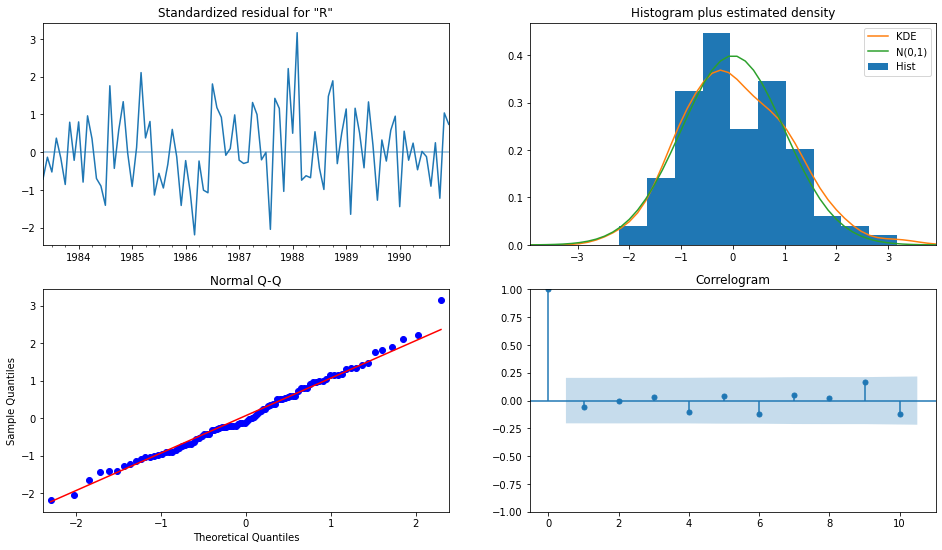

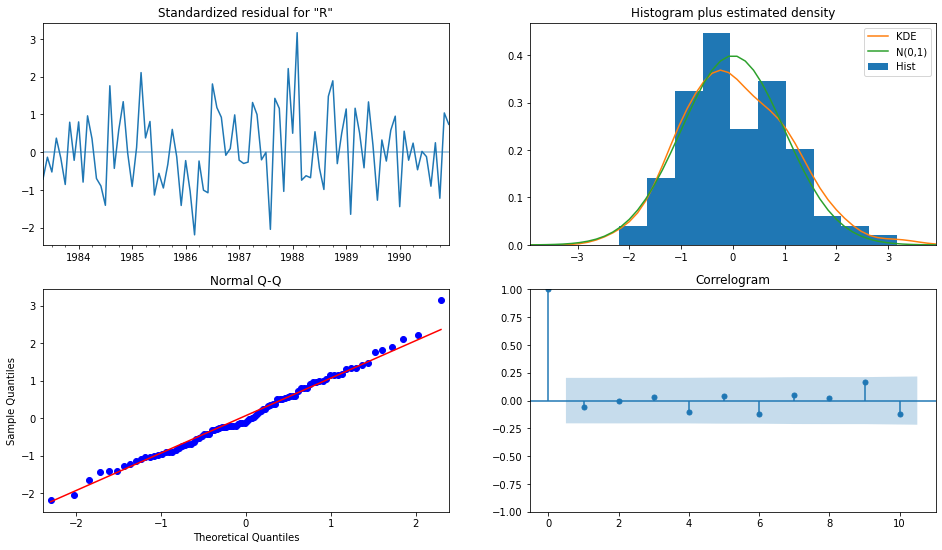

In [574]:
results_auto_SARIMA.plot_diagnostics();
plt.savefig('rose_sarima_auto_30212_diag_plot.jpg', bbox_inches='tight')

## Predict on the Test Set using this model and evaluate the model.

In [575]:
predicted_auto_SARIMA = results_auto_SARIMA.get_forecast(steps=len(rtest))
predicted_auto_SARIMA1= results_auto_SARIMA.get_prediction(start=pd.to_datetime('1991-01-01'), dynamic=False)

In [576]:
predicted_auto_SARIMA.summary_frame(alpha=0.05).head()

Rose             mean    mean_se  mean_ci_lower  mean_ci_upper
1991-01-01  55.235174  13.907775      27.976436      82.493913
1991-02-01  68.123024  13.991219      40.700739      95.545310
1991-03-01  67.908688  14.012270      40.445143      95.372233
1991-04-01  66.786177  14.099578      39.151513      94.420842
1991-05-01  69.760081  14.108937      42.107073      97.413089

In [577]:
predicted_auto_SARIMA1

In [578]:
rmse = mean_squared_error(rtest['Rose'],predicted_auto_SARIMA.predicted_mean,squared=False)
mape = mean_absolute_percentage_error(rtest['Rose'],predicted_auto_SARIMA.predicted_mean)
print('RMSE:',rmse,'\nMAPE:',mape)

RMSE: 18.88192892028345 
MAPE: 36.375464857240615


In [579]:
temp_resultsDf = pd.DataFrame({'Test RMSE Rose': rmse,'Test MAPE Rose':mape}
                           ,index=['SARIMA(3, 1, 1)(3, 0, 2, 12)'])


resultsDf = pd.concat([resultsR0,temp_resultsDf])

resultsDf

Test RMSE Rose  Test MAPE Rose
ARIMA(2,1,3)                       36.812249       75.837193
ARIMA(2,1,2)                       36.871197       76.056213
SARIMA(3, 1, 1)(3, 0, 2, 12)       18.881929       36.375465

In [580]:
resultsR0 = resultsDf.copy()
resultsR0.to_csv('rose_auto_sarima.csv')
resultsR0

Test RMSE Rose  Test MAPE Rose
ARIMA(2,1,3)                       36.812249       75.837193
ARIMA(2,1,2)                       36.871197       76.056213
SARIMA(3, 1, 1)(3, 0, 2, 12)       18.881929       36.375465

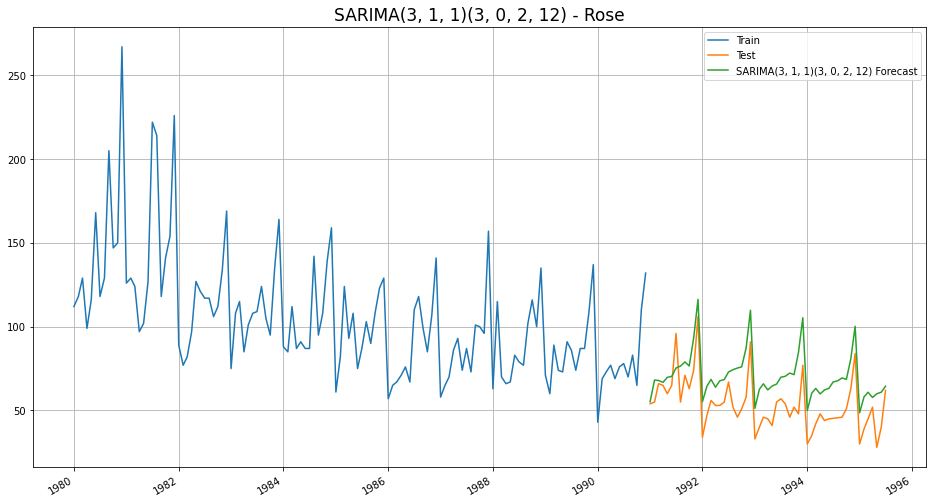

In [581]:
## Plotting the Training data, Test data and the forecasted values

plt.plot(rtrain, label='Train')
plt.plot(rtest, label='Test')
# plt.plot(predicted_auto_SARIMA,label='SARIMA(3, 1, 1)(3, 0, 2, 12)')
# predicted_auto_SARIMA.plot(label='SARIMA(3, 1, 1)(3, 0, 2, 12)')
predicted_auto_SARIMA.predicted_mean.plot(label='SARIMA(3, 1, 1)(3, 0, 2, 12) Forecast')


plt.legend(loc='best')
plt.grid()
plt.title('SARIMA(3, 1, 1)(3, 0, 2, 12) - Rose', fontsize=17);

plt.savefig('rose_sarima_auto_30212.jpg', bbox_inches='tight');

## Build a version of the SARIMA model for which the best parameters are selected by looking at the ACF and the PACF plots. - Seasonality at 12

Let us look at the ACF and the PACF plots once more.

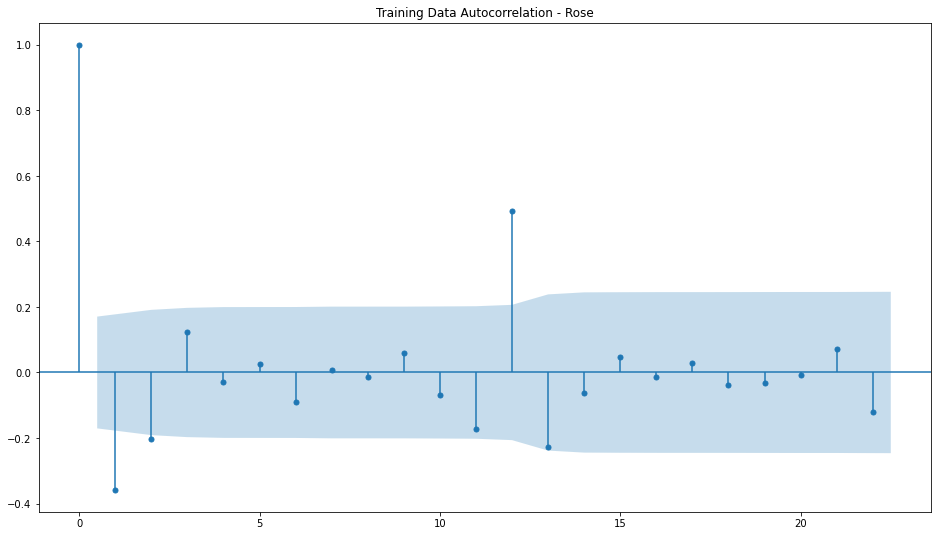

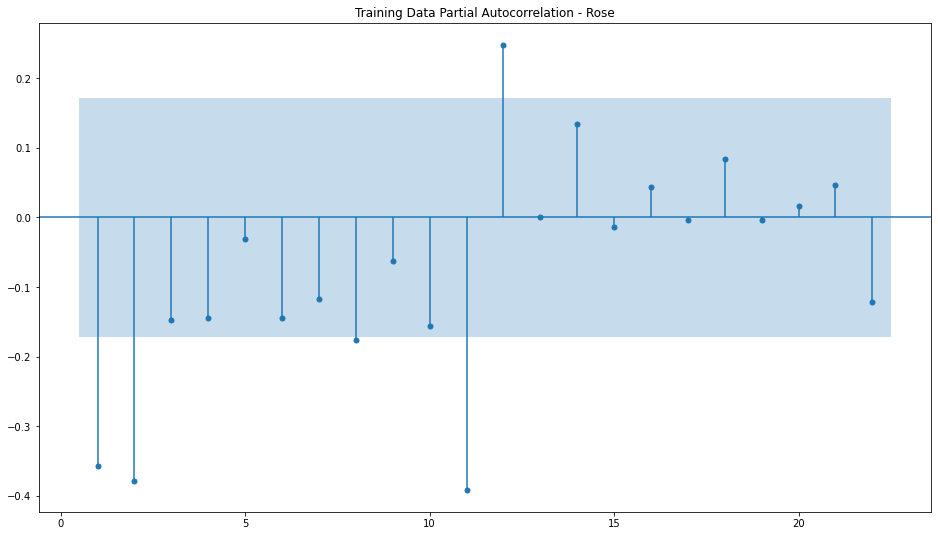

In [582]:
plot_acf(rtrain.diff(),title='Training Data Autocorrelation - Rose',missing='drop')
plot_pacf(rtrain.diff().dropna(),title='Training Data Partial Autocorrelation - Rose',zero=False,method='ywmle');

Here, we have taken alpha=0.05.

We are going to take the seasonal period as 12
We are taking the p value to be 2 and the q value also to be 2 as the parameters same as the ARIMA model.

* The Auto-Regressive parameter in an SARIMA model is 'P' which comes from the significant lag after which the PACF plot cuts-off to 0. 
* The Moving-Average parameter in an SARIMA model is 'Q' which comes from the significant lag after which the ACF plot cuts-off to 3.



In [583]:
import statsmodels.api as sm

manual_SARIMA = sm.tsa.statespace.SARIMAX(rtrain['Rose'],
                                order=(2,1,2),
                                seasonal_order=(2, 1, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_manual_SARIMA = manual_SARIMA.fit(maxiter=1000)
print(results_manual_SARIMA.summary())

/Users/chetan/DS/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/chetan/DS/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


                                     SARIMAX Results                                      
Dep. Variable:                               Rose   No. Observations:                  132
Model:             SARIMAX(2, 1, 2)x(2, 1, 2, 12)   Log Likelihood                -379.498
Date:                            Sat, 27 Mar 2021   AIC                            776.996
Time:                                    14:16:57   BIC                            799.692
Sample:                                01-01-1980   HQIC                           786.156
                                     - 12-01-1990                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8551      0.146     -5.838      0.000      -1.142      -0.568
ar.L2         -0.0022      0.125   

In [584]:
import statsmodels.api as sm

manual_SARIMA = sm.tsa.statespace.SARIMAX(rtrain['Rose'],
                                order=(2,1,2),
                                seasonal_order=(3, 1, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_manual_SARIMA1 = manual_SARIMA.fit(maxiter=1000)
print(results_manual_SARIMA1.summary())

/Users/chetan/DS/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/chetan/DS/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


                                     SARIMAX Results                                      
Dep. Variable:                               Rose   No. Observations:                  132
Model:             SARIMAX(2, 1, 2)x(3, 1, 2, 12)   Log Likelihood                -334.893
Date:                            Sat, 27 Mar 2021   AIC                            689.786
Time:                                    14:17:05   BIC                            713.730
Sample:                                01-01-1980   HQIC                           699.392
                                     - 12-01-1990                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7091      0.403      1.758      0.079      -0.081       1.499
ar.L2         -0.1504      0.176   

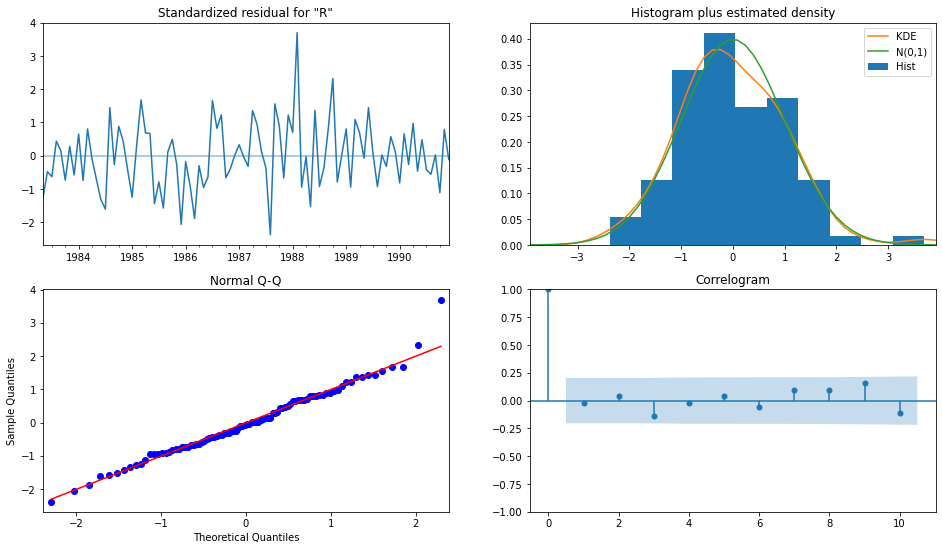

In [585]:
results_manual_SARIMA.plot_diagnostics()
plt.savefig('rose_sarima_21212.jpg', bbox_inches='tight');

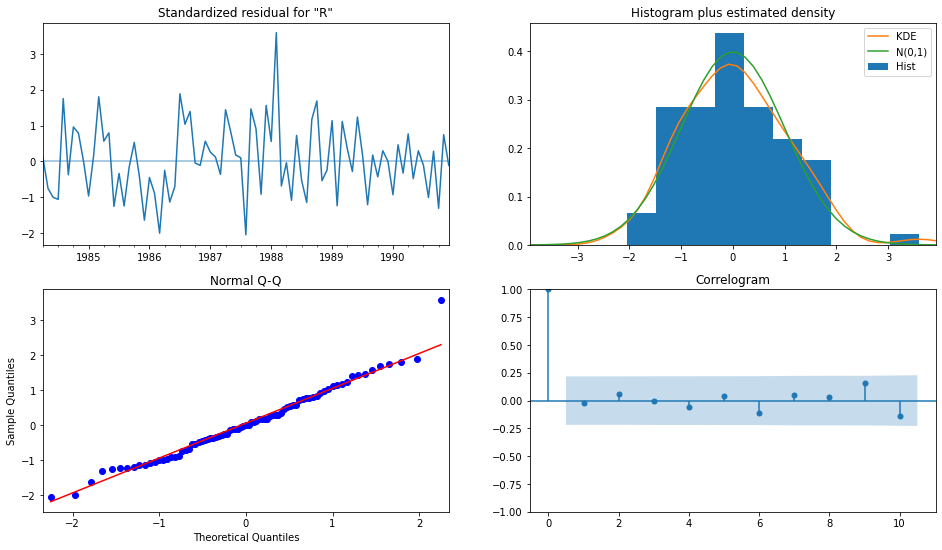

In [586]:
results_manual_SARIMA1.plot_diagnostics()
plt.savefig('rose_sarima_31212.jpg', bbox_inches='tight');

## Predict on the Test Set using this model and evaluate the model.

In [587]:
predicted_manual_SARIMA = results_manual_SARIMA.get_forecast(steps=len(rtest))
                                                             
predicted_manual_SARIMA1 = results_manual_SARIMA1.get_forecast(steps=len(rtest))

In [588]:
rmse = mean_squared_error(rtest['Rose'],predicted_manual_SARIMA.predicted_mean,squared=False)
mape = mean_absolute_percentage_error(rtest['Rose'],predicted_manual_SARIMA.predicted_mean)
print('RMSE:',rmse,'\nMAPE:',mape)

RMSE: 16.55096022982394 
MAPE: 25.477542490098948


In [589]:
rmse = mean_squared_error(rtest['Rose'],predicted_manual_SARIMA1.predicted_mean,squared=False)
mape = mean_absolute_percentage_error(rtest['Rose'],predicted_manual_SARIMA1.predicted_mean)
print('RMSE:',rmse,'\nMAPE:',mape)

RMSE: 15.357056655945197 
MAPE: 22.955088595573685


In [590]:
temp_resultsDf = pd.DataFrame({'Test RMSE Rose': [rmse],'Test MAPE Rose':mape}
                           ,index=['SARIMA(2,1,2)(3,1,2,12)'])


resultsDf = pd.concat([resultsDf,temp_resultsDf])

resultsDf

Test RMSE Rose  Test MAPE Rose
ARIMA(2,1,3)                       36.812249       75.837193
ARIMA(2,1,2)                       36.871197       76.056213
SARIMA(3, 1, 1)(3, 0, 2, 12)       18.881929       36.375465
SARIMA(2,1,2)(3,1,2,12)            15.357057       22.955089

In [591]:
resultsR0 = resultsDf.copy()

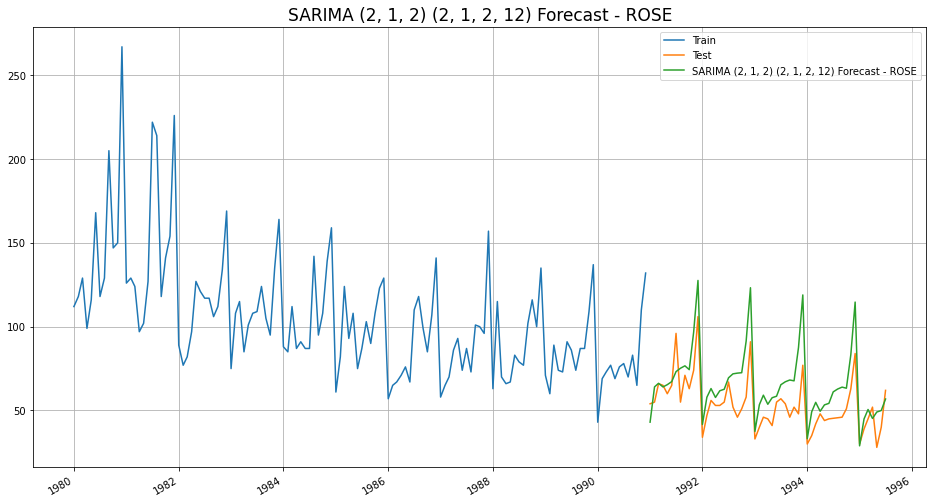

In [592]:
plt.plot(rtrain, label='Train')
plt.plot(rtest, label ='Test')

predicted_manual_SARIMA.predicted_mean.plot(label = 'SARIMA (2, 1, 2) (2, 1, 2, 12) Forecast - ROSE')
plt.grid()
plt.legend(loc='best')
plt.title('SARIMA (2, 1, 2) (2, 1, 2, 12) Forecast - ROSE', fontsize=17)
plt.savefig('rose_sarima_manual_forecast.jpg', bbox_inches='tight');

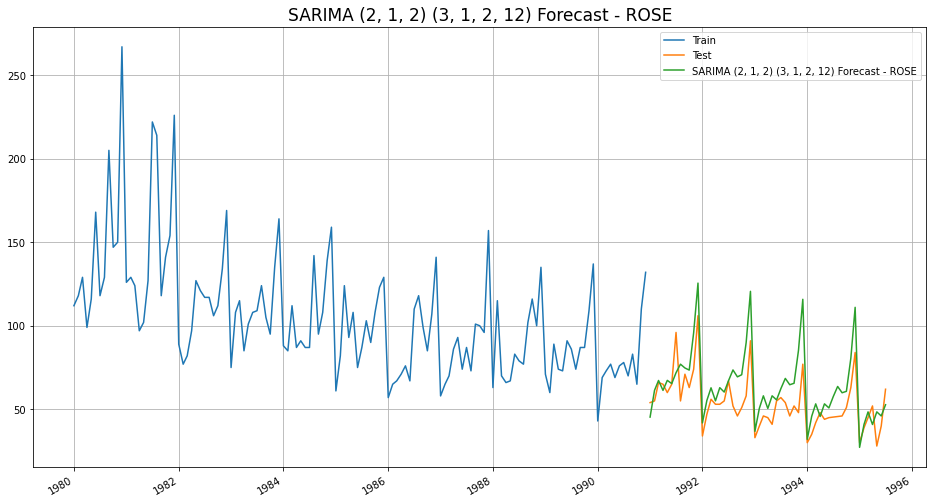

In [593]:
plt.plot(rtrain, label='Train')
plt.plot(rtest, label ='Test')

predicted_manual_SARIMA1.predicted_mean.plot(label = 'SARIMA (2, 1, 2) (3, 1, 2, 12) Forecast - ROSE')
plt.grid()
plt.legend(loc='best')
plt.title('SARIMA (2, 1, 2) (3, 1, 2, 12) Forecast - ROSE', fontsize=17)
plt.savefig('rose_sarima_manual_forecast1.jpg', bbox_inches='tight');

## Building the most optimum model on the Full Data.

Here, we have a scenario where our training data was stationary but our full data was not stationary. So, we will use the same parameters as our training data but with adding a level of differencing which is needed for the data to be stationary.

In [594]:
full_data_model = sm.tsa.statespace.SARIMAX(dfr['Rose'],
                                order=(2,1,2),
                                seasonal_order=(2,1,2,12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_full_data_model = full_data_model.fit(maxiter=1000)
print(results_full_data_model.summary())

/Users/chetan/DS/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/chetan/DS/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


                                     SARIMAX Results                                      
Dep. Variable:                               Rose   No. Observations:                  187
Model:             SARIMAX(2, 1, 2)x(2, 1, 2, 12)   Log Likelihood                -587.531
Date:                            Sat, 27 Mar 2021   AIC                           1193.062
Time:                                    14:17:14   BIC                           1219.976
Sample:                                01-01-1980   HQIC                          1203.997
                                     - 07-01-1995                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8649      0.101     -8.556      0.000      -1.063      -0.667
ar.L2          0.0340      0.091   

## Evaluate the model on the whole data and predict 12 months into the future

In [595]:
predicted_manual_SARIMA_full_data = results_full_data_model.get_forecast(steps=12)

In [596]:
pred_full_manual_SARIMA_date = predicted_manual_SARIMA_full_data.summary_frame(alpha=0.05)
pred_full_manual_SARIMA_date.head()

Rose             mean    mean_se  mean_ci_lower  mean_ci_upper
1995-08-01  43.083183  12.674168      18.242271      67.924095
1995-09-01  43.341539  12.959930      17.940542      68.742535
1995-10-01  45.827000  12.963927      20.418170      71.235830
1995-11-01  57.396966  13.124657      31.673111      83.120821
1995-12-01  85.074561  13.133487      59.333399     110.815723

In [597]:
rmse = mean_squared_error(dfr['Rose'],results_full_data_model.fittedvalues,squared=False)
print('RMSE of the Full Model',rmse)

RMSE of the Full Model 35.911101459061385


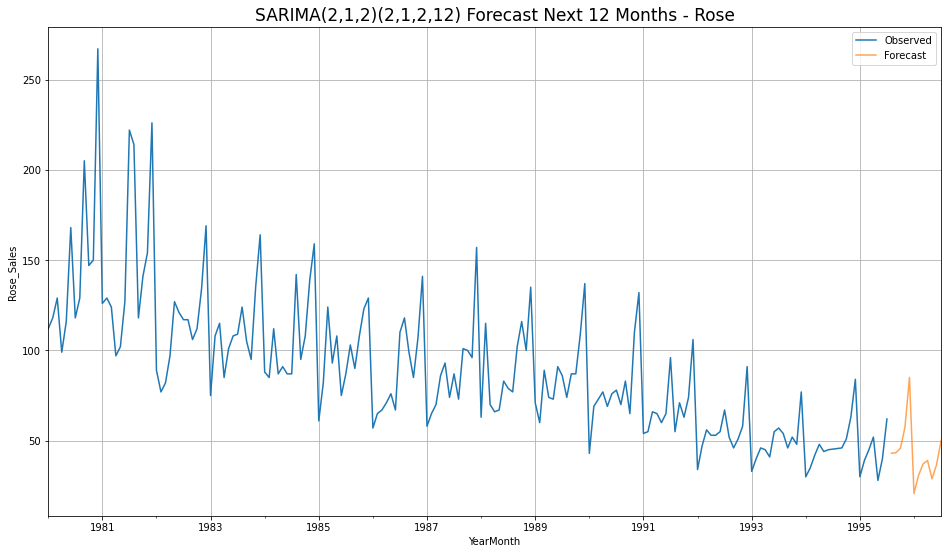

In [598]:
axis = dfr['Rose'].plot(label='Observed')
pred_full_manual_SARIMA_date['mean'].plot(ax=axis, label='Forecast', alpha=0.7)

axis.set_xlabel('YearMonth')
axis.set_ylabel('Rose_Sales')
plt.legend(loc='best')
plt.grid();
plt.title('SARIMA(2,1,2)(2,1,2,12) Forecast Next 12 Months - Rose', fontsize=17);
plt.savefig('rose_forecast.jpg', bbox_inches='tight');

In [599]:
resultsDf

Test RMSE Rose  Test MAPE Rose
ARIMA(2,1,3)                       36.812249       75.837193
ARIMA(2,1,2)                       36.871197       76.056213
SARIMA(3, 1, 1)(3, 0, 2, 12)       18.881929       36.375465
SARIMA(2,1,2)(3,1,2,12)            15.357057       22.955089

In [600]:
resultsR0 = resultsDf.copy()
resultsR0.to_csv('rose_all_arima.csv')

In [602]:
results_rose = pd.concat([resultsDf14, resultsR0], axis=0)
results_rose

Test RMSE Rose  \
RegressionOnTime                                         15.268955   
NaiveModel                                               79.718773   
SimpleAverageModel                                       53.460570   
2pointTrailingMovingAverage                              11.529278   
4pointTrailingMovingAverage                              14.451403   
6pointTrailingMovingAverage                              14.566327   
9pointTrailingMovingAverage                              14.727630   
Simple Exponential Smoothing                             36.796225   
Double Exponential Smoothing                             15.270968   
Triple Exponential Smoothing (Additive Season)           14.243240   
Triple Exponential Smoothing (Multiplicative Se...       19.113110   
Triple Exponential Smoothing (Additive Season, ...       26.039948   
Triple Exponential Smoothing (Multiplicative Se...       25.994867   
ARIMA(2,1,3)                                             36.812249   
ARIMA(2,1,2)                                             36.871197   
SARIMA(3, 1, 1)(3, 0, 2, 12)                             18.881929   
SARIMA(2,1,2)(3,1,2,12)                                  15.357057   

                                                    Test RMSE Sparkling  \
RegressionOnTime                                            1389.135175   
NaiveModel                                                  3864.279352   
SimpleAverageModel                                          1275.081804   
2pointTrailingMovingAverage                                  813.400684   
4pointTrailingMovingAverage                                 1156.589694   
6pointTrailingMovingAverage                                 1283.927428   
9pointTrailingMovingAverage                                 1346.278315   
Simple Exponential Smoothing                                1338.004623   
Double Exponential Smoothing                                5291.879833   
Triple Exponential Smoothing (Additive Season)               378.626241   
Triple Exponential Smoothing (Multiplicative Se...           403.706228   
Triple Exponential Smoothing (Additive Season, ...           378.626241   
Triple Exponential Smoothing (Multiplicative Se...           352.450966   
ARIMA(2,1,3)                                                        NaN   
ARIMA(2,1,2)                                                        NaN   
SARIMA(3, 1, 1)(3, 0, 2, 12)                                        NaN   
SARIMA(2,1,2)(3,1,2,12)                                             NaN   

                                                    Test MAPE Rose  
RegressionOnTime                                               NaN  
NaiveModel                                                     NaN  
SimpleAverageModel                                             NaN  
2pointTrailingMovingAverage                                    NaN  
4pointTrailingMovingAverage                                    NaN  
6pointTrailingMovingAverage                                    NaN  
9pointTrailingMovingAverage                                    NaN  
Simple Exponential Smoothing                                   NaN  
Double Exponential Smoothing                                   NaN  
Triple Exponential Smoothing (Additive Season)                 NaN  
Triple Exponential Smoothing (Multiplicative Se...             NaN  
Triple Exponential Smoothing (Additive Season, ...             NaN  
Triple Exponential Smoothing (Multiplicative Se...             NaN  
ARIMA(2,1,3)                                             75.837193  
ARIMA(2,1,2)                                             76.056213  
SARIMA(3, 1, 1)(3, 0, 2, 12)                             36.375465  
SARIMA(2,1,2)(3,1,2,12)                                  22.955089

In [604]:
results_rose.sort_values(by=['Test RMSE Rose']).to_csv('results_rose.csv')

In [601]:
resultsDf.sort_values(by=['Test RMSE Rose'])

Test RMSE Rose  Test MAPE Rose
SARIMA(2,1,2)(3,1,2,12)            15.357057       22.955089
SARIMA(3, 1, 1)(3, 0, 2, 12)       18.881929       36.375465
ARIMA(2,1,3)                       36.812249       75.837193
ARIMA(2,1,2)                       36.871197       76.056213

# =================================================================

## ARIMA / SARIMA Modelling on SPARKLING dataset

### Check for stationarity of the Training Data - Sparkling

Let us plot the training data once.

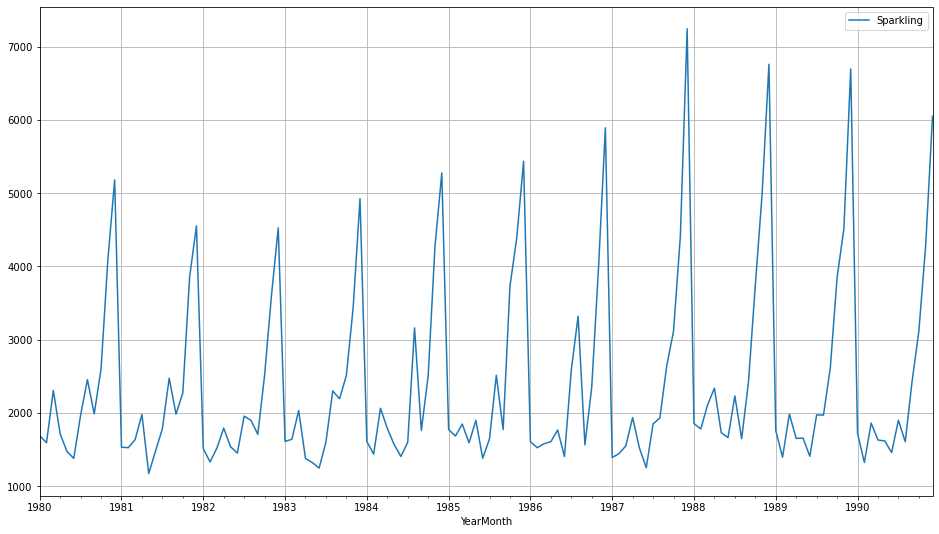

In [605]:
strain.plot(grid=True);

In [606]:
dftest = adfuller(strain,regression='ct')
print('DF test statistic is %3.3f' %dftest[0])
print('DF test p-value is' ,dftest[1])
print('Number of lags used' ,dftest[2])

DF test statistic is -2.062
DF test p-value is 0.56741103885937
Number of lags used 12


The training data is non-stationary at 95% confidence level. Let us take a first level of differencing to stationarize the Time Series.

In [607]:
dftest = adfuller(strain.diff().dropna(),regression='ct')
print('DF test statistic is %3.3f' %dftest[0])
print('DF test p-value is' ,dftest[1])
print('Number of lags used' ,dftest[2])

DF test statistic is -7.968
DF test p-value is 8.479210655513744e-11
Number of lags used 11


Training data is now Stationary
Now, let us go ahead and plot the differenced training data.

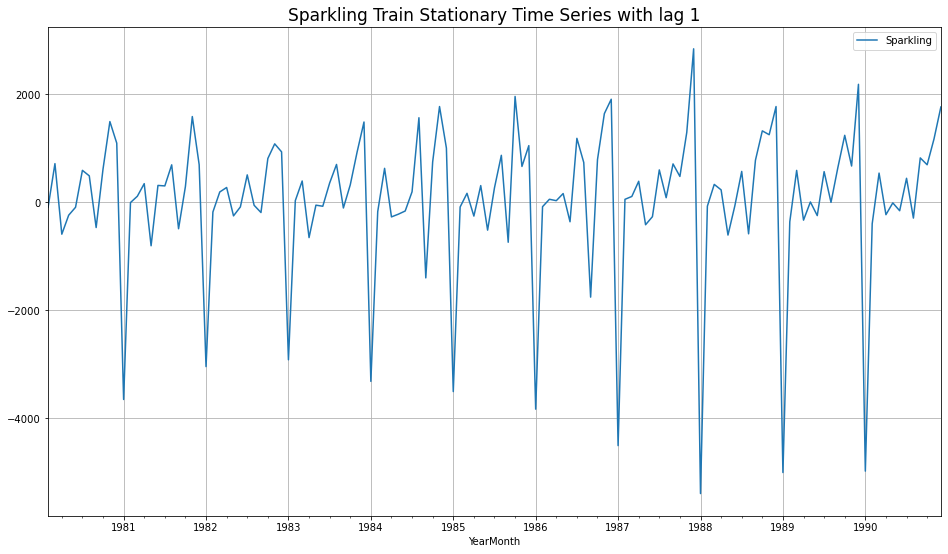

In [608]:
strain.diff().dropna().plot(grid=True);
plt.title('Sparkling Train Stationary Time Series with lag 1', fontsize=17);
plt.savefig('spark_train_stationary.jpg', bbox_inches='tight');

In [609]:
strain.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 132 entries, 1980-01-01 to 1990-12-01
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Sparkling  132 non-null    int64
dtypes: int64(1)
memory usage: 2.1 KB


## Build an Automated version of an ARIMA model for which the best parameters are selected in accordance with the lowest Akaike Information Criteria (AIC) - SPARKLING

##### Note: The data has some seasonality so ideally we should build a SARIMA model. But we'll check least AIC of ARIMA and then SARIMA

In [610]:
## The following loop helps us in getting a combination of different parameters of p and q in the range of 0 and 2
## We have kept the value of d as 1 as we need to take a difference of the series to make it stationary.

import itertools
p = q = range(0, 4)
d= range(1,2)
pdq = list(itertools.product(p, d, q))
print('Examples of the parameter combinations for the Model')
for i in range(0,len(pdq)):
    print('Model: {}'.format(pdq[i]))

Examples of the parameter combinations for the Model
Model: (0, 1, 0)
Model: (0, 1, 1)
Model: (0, 1, 2)
Model: (0, 1, 3)
Model: (1, 1, 0)
Model: (1, 1, 1)
Model: (1, 1, 2)
Model: (1, 1, 3)
Model: (2, 1, 0)
Model: (2, 1, 1)
Model: (2, 1, 2)
Model: (2, 1, 3)
Model: (3, 1, 0)
Model: (3, 1, 1)
Model: (3, 1, 2)
Model: (3, 1, 3)


In [611]:
# Creating an empty Dataframe with column names only
ARIMA_AIC = pd.DataFrame(columns=['param', 'AIC'])
ARIMA_AIC

Empty DataFrame
Columns: [param, AIC]
Index: []

In [612]:
from statsmodels.tsa.arima.model import ARIMA

for param in pdq:# running a loop within the pdq parameters defined by itertools
    ARIMA_model = ARIMA(strain['Sparkling'].values,order=param).fit()#fitting the ARIMA model
    #using the parameters from the loop
    print('ARIMA{} - AIC:{}'.format(param,ARIMA_model.aic))#printing the parameters and the AIC
    #from the fitted models
    ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)
    #appending the AIC values and the model parameters to the previously created data frame
    #for easier understanding and sorting of the AIC values

ARIMA(0, 1, 0) - AIC:2267.6630357855465
ARIMA(0, 1, 1) - AIC:2263.060015591336
ARIMA(0, 1, 2) - AIC:2234.408323126579
ARIMA(0, 1, 3) - AIC:2233.9948577488954
ARIMA(1, 1, 0) - AIC:2266.6085393190087
ARIMA(1, 1, 1) - AIC:2235.7550946672563


/Users/chetan/DS/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ARIMA(1, 1, 2) - AIC:2234.5272004517738
ARIMA(1, 1, 3) - AIC:2235.60780915136
ARIMA(2, 1, 0) - AIC:2260.36574396809
ARIMA(2, 1, 1) - AIC:2233.777626315349
ARIMA(2, 1, 2) - AIC:2213.509212451414


/Users/chetan/DS/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


ARIMA(2, 1, 3) - AIC:2232.8722214888976
ARIMA(3, 1, 0) - AIC:2257.72337899794
ARIMA(3, 1, 1) - AIC:2235.4989166426767


/Users/chetan/DS/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


ARIMA(3, 1, 2) - AIC:2230.758014766513
ARIMA(3, 1, 3) - AIC:2221.4625120053342


/Users/chetan/DS/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


In [613]:
## Sort the above AIC values in the ascending order to get the parameters for the minimum AIC value

ARIMA_AIC.sort_values(by='AIC',ascending=True).head()

param          AIC
10  (2, 1, 2)  2213.509212
15  (3, 1, 3)  2221.462512
14  (3, 1, 2)  2230.758015
11  (2, 1, 3)  2232.872221
9   (2, 1, 1)  2233.777626

In [614]:
auto_ARIMA = ARIMA(strain, order=(2,1,2))

results_auto_ARIMA = auto_ARIMA.fit()

print(results_auto_ARIMA.summary())

/Users/chetan/DS/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/chetan/DS/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/chetan/DS/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


                               SARIMAX Results                                
Dep. Variable:              Sparkling   No. Observations:                  132
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -1101.755
Date:                Sat, 27 Mar 2021   AIC                           2213.509
Time:                        14:50:05   BIC                           2227.885
Sample:                    01-01-1980   HQIC                          2219.351
                         - 12-01-1990                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.3121      0.046     28.779      0.000       1.223       1.401
ar.L2         -0.5593      0.072     -7.740      0.000      -0.701      -0.418
ma.L1         -1.9917      0.109    -18.217      0.0

### Diagnostics plot - Sparkling

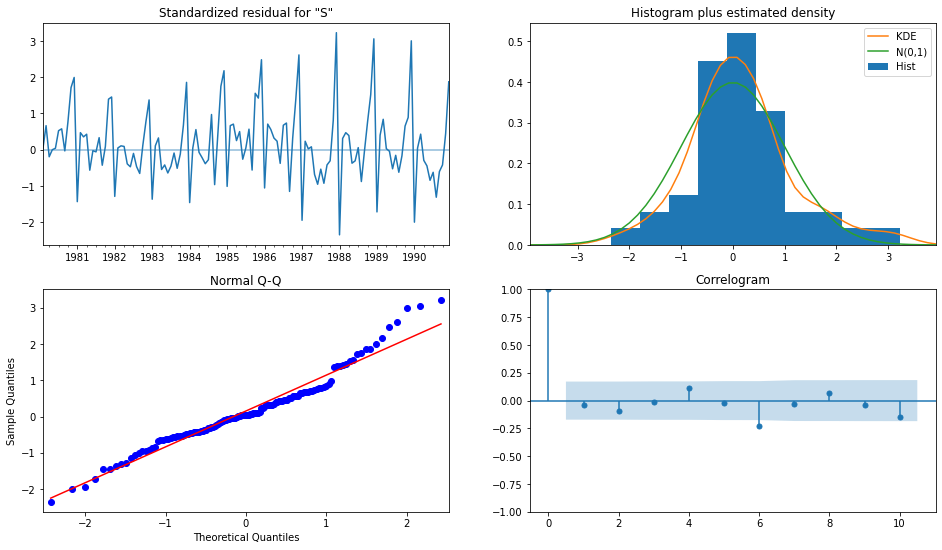

In [615]:
results_auto_ARIMA.plot_diagnostics();
plt.savefig('spark_arima_diag_plot.jpg', bbox_inches='tight');

## Predict on the Test Set using this model and evaluate the model.

In [616]:
predicted_auto_ARIMA = results_auto_ARIMA.forecast(steps=len(stest))

In [617]:
## Mean Absolute Percentage Error (MAPE) - Function Definition

def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean((np.abs(y_true-y_pred))/(y_true))*100

## Importing the mean_squared_error function from sklearn to calculate the RMSE

from sklearn.metrics import mean_squared_error

In [618]:
rmse = mean_squared_error(stest['Sparkling'],predicted_auto_ARIMA,squared=False)
mape = mean_absolute_percentage_error(stest['Sparkling'],predicted_auto_ARIMA)
print('RMSE:',rmse,'\nMAPE:',mape)

RMSE: 1299.9791952854541 
MAPE: 47.09993235502316


In [619]:
resultsDf = pd.DataFrame({'RMSE': rmse,'MAPE':mape}
                           ,index=['ARIMA(2,1,2)'])

resultsDf.to_csv('spark_arima_auto_212.csv')
resultsDf

RMSE       MAPE
ARIMA(2,1,2)  1299.979195  47.099932

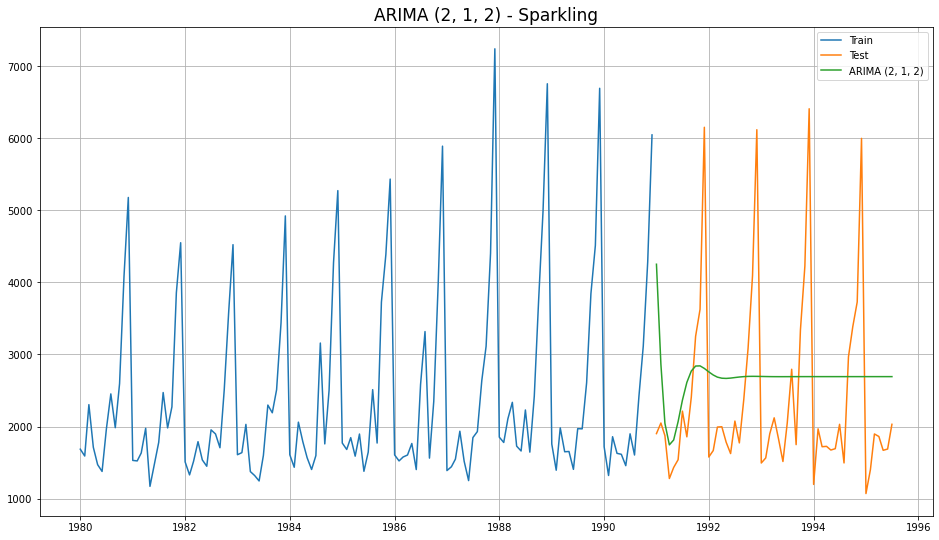

In [620]:
plt.plot(strain, label='Train')
plt.plot(stest, label='Test')
plt.plot(predicted_auto_ARIMA, label='ARIMA (2, 1, 2)')

plt.title('ARIMA (2, 1, 2) - Sparkling', fontsize=17)
plt.grid()
plt.legend(loc='best')

plt.savefig('spark_arima_auto_212.jpg', bbox_inches='tight');

## Build a version of the ARIMA model for which the best parameters are selected by looking at the ACF and the PACF plots - SPARKLING

Let us look at the ACF and the PACF plots once more.

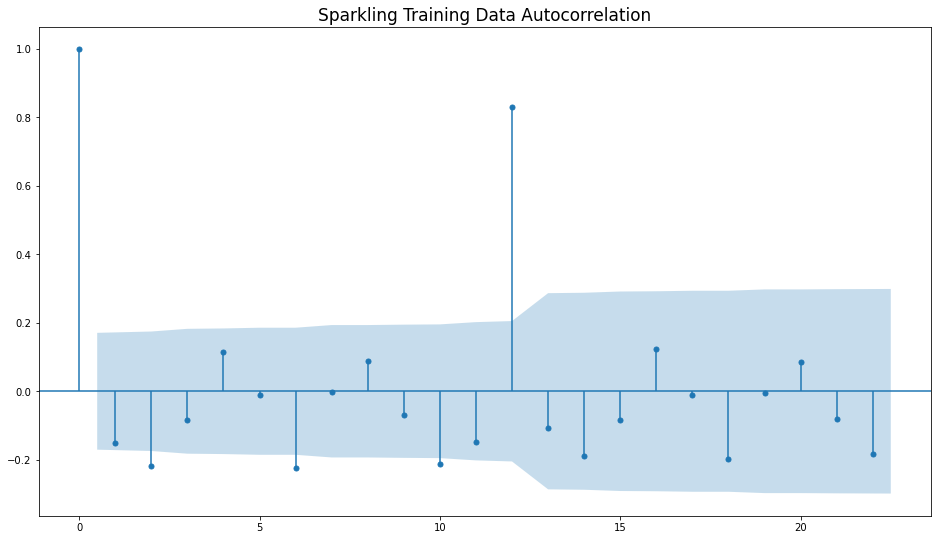

In [621]:
plot_acf(strain.diff(),missing='drop')
plt.title('Sparkling Training Data Autocorrelation', fontsize=17)
plt.savefig('spark_train_acf.jpg', bbox_inches='tight');



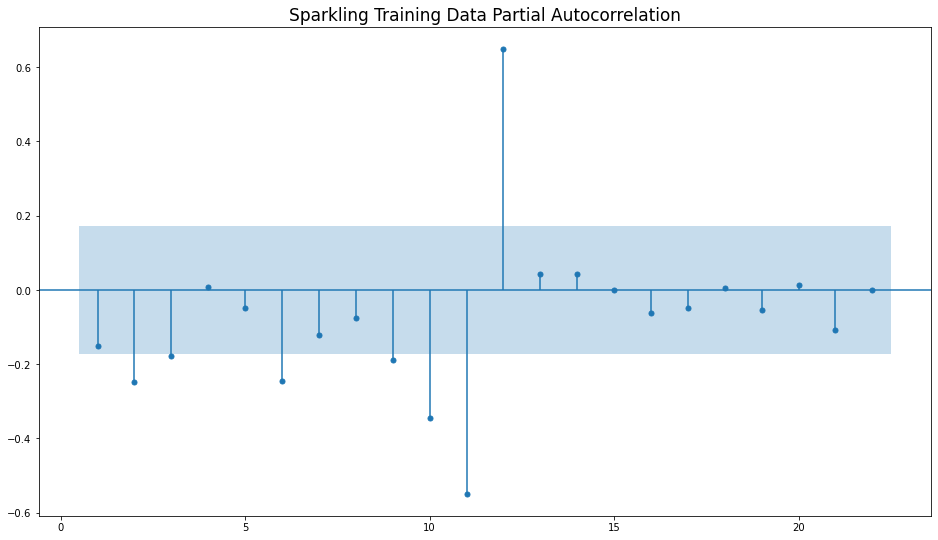

In [622]:
plot_pacf(strain.diff().dropna(),title='Training Data Partial Autocorrelation',zero=False,method='ywmle')
plt.title('Sparkling Training Data Partial Autocorrelation', fontsize=17)
plt.savefig('spark_train_pacf.jpg', bbox_inches='tight');



By looking at the above plots, we will take the value of p and q to be 0 and 0 respectively.

In [623]:
manual_ARIMA = ARIMA(strain['Sparkling'], order=(0,1,0))

results_manual_ARIMA = manual_ARIMA.fit()

print(results_manual_ARIMA.summary())

                               SARIMAX Results                                
Dep. Variable:              Sparkling   No. Observations:                  132
Model:                 ARIMA(0, 1, 0)   Log Likelihood               -1132.832
Date:                Sat, 27 Mar 2021   AIC                           2267.663
Time:                        14:50:09   BIC                           2270.538
Sample:                    01-01-1980   HQIC                          2268.831
                         - 12-01-1990                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      1.885e+06   1.29e+05     14.658      0.000    1.63e+06    2.14e+06
Ljung-Box (L1) (Q):                   3.07   Jarque-Bera (JB):               198.83
Prob(Q):                              0.08   Pr

/Users/chetan/DS/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/chetan/DS/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/chetan/DS/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Let us analyse the residuals from the various diagnostics plot.

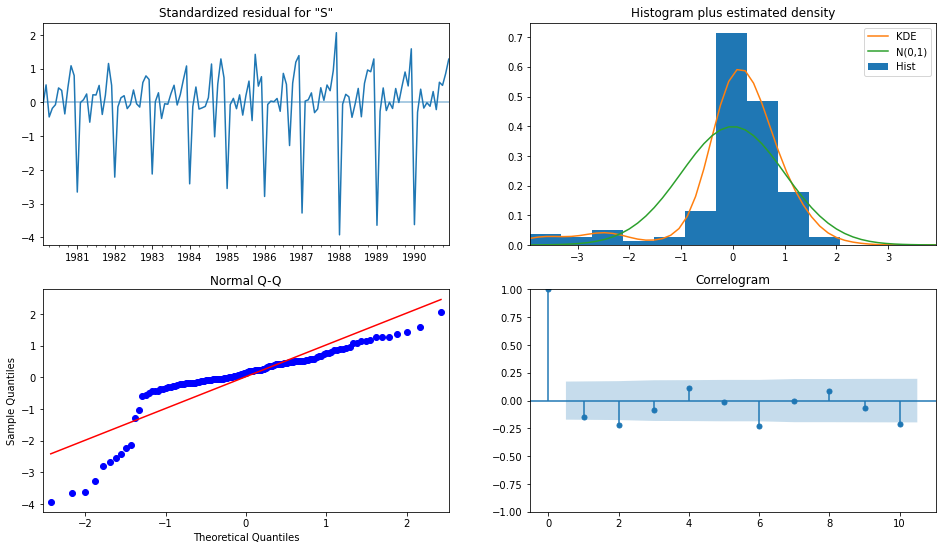

In [624]:
results_manual_ARIMA.plot_diagnostics();

plt.savefig('spark_train_diag_plot.jpg', bbox_inches='tight');

## Predict on the Test Set using this model and evaluate the model.

In [625]:
predicted_manual_ARIMA = results_manual_ARIMA.forecast(steps=len(stest))

In [626]:
rmse = mean_squared_error(stest['Sparkling'],predicted_manual_ARIMA,squared=False)
mape = mean_absolute_percentage_error(stest['Sparkling'],predicted_manual_ARIMA)
print('RMSE:',rmse,'\nMAPE:',mape)

RMSE: 3864.2793518443914 
MAPE: 201.32764950352743


In [627]:
temp_resultsDf = pd.DataFrame({'RMSE': rmse,'MAPE':mape}
                           ,index=['ARIMA(0,1,0)'])


resultsDf = pd.concat([resultsDf,temp_resultsDf])

resultsDf

RMSE        MAPE
ARIMA(2,1,2)  1299.979195   47.099932
ARIMA(0,1,0)  3864.279352  201.327650

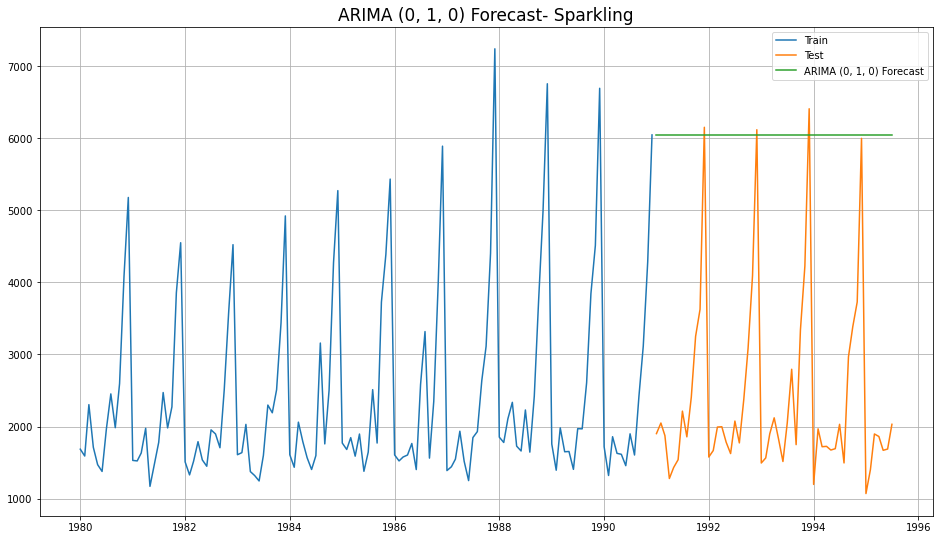

In [628]:
plt.plot(strain, label='Train')
plt.plot(stest, label='Test')
plt.plot(predicted_manual_ARIMA, label='ARIMA (0, 1, 0) Forecast')

plt.grid()
plt.legend(loc='best')
plt.title('ARIMA (0, 1, 0) Forecast- Sparkling', fontsize=17)
plt.savefig('spark_manual_arima_010.jpg', bbox_inches='tight');

## Build an Automated version of a SARIMA model for which the best parameters are selected in accordance with the lowest Akaike Information Criteria (AIC) - SPARKLING

Let us look at the ACF plot once more to understand the seasonal parameter for the SARIMA model.

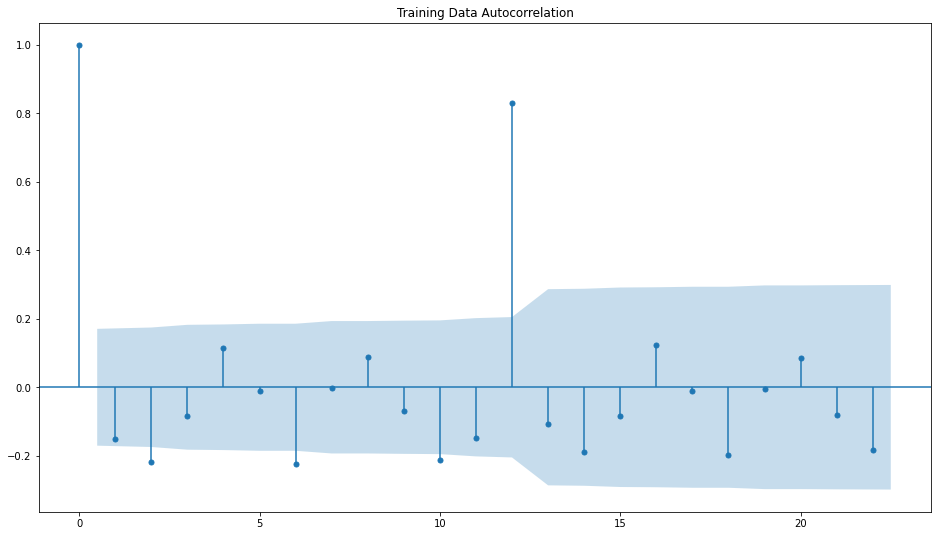

In [629]:
plot_acf(strain.diff(),title='Training Data Autocorrelation',missing='drop');

We can see that there is a seasonality.

In [630]:
import itertools
p = q = range(0, 4)
d= range(1,2)
D = range(0,1)
pdq = list(itertools.product(p, d, q))
PDQ = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, D, q))]
print('Examples of the parameter combinations for the Model are')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], PDQ[i]))

Examples of the parameter combinations for the Model are
Model: (0, 1, 1)(0, 0, 1, 12)
Model: (0, 1, 2)(0, 0, 2, 12)
Model: (0, 1, 3)(0, 0, 3, 12)
Model: (1, 1, 0)(1, 0, 0, 12)
Model: (1, 1, 1)(1, 0, 1, 12)
Model: (1, 1, 2)(1, 0, 2, 12)
Model: (1, 1, 3)(1, 0, 3, 12)
Model: (2, 1, 0)(2, 0, 0, 12)
Model: (2, 1, 1)(2, 0, 1, 12)
Model: (2, 1, 2)(2, 0, 2, 12)
Model: (2, 1, 3)(2, 0, 3, 12)
Model: (3, 1, 0)(3, 0, 0, 12)
Model: (3, 1, 1)(3, 0, 1, 12)
Model: (3, 1, 2)(3, 0, 2, 12)
Model: (3, 1, 3)(3, 0, 3, 12)


In [631]:
SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC

Empty DataFrame
Columns: [param, seasonal, AIC]
Index: []

In [632]:
import statsmodels.api as sm

for param in pdq:
    for param_seasonal in PDQ:
        SARIMA_model = sm.tsa.statespace.SARIMAX(strain['Sparkling'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA = SARIMA_model.fit(maxiter=1000)
        print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)

SARIMA(0, 1, 0)x(0, 0, 0, 12) - AIC:2251.3597196862966
SARIMA(0, 1, 0)x(0, 0, 1, 12) - AIC:1956.2614616846495
SARIMA(0, 1, 0)x(0, 0, 2, 12) - AIC:1723.153364023484


/Users/chetan/DS/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


SARIMA(0, 1, 0)x(0, 0, 3, 12) - AIC:3233.0728811525782
SARIMA(0, 1, 0)x(1, 0, 0, 12) - AIC:1837.4366022456675
SARIMA(0, 1, 0)x(1, 0, 1, 12) - AIC:1806.9905301389254
SARIMA(0, 1, 0)x(1, 0, 2, 12) - AIC:1633.2108735791417


/Users/chetan/DS/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


SARIMA(0, 1, 0)x(1, 0, 3, 12) - AIC:3654.4599434356355
SARIMA(0, 1, 0)x(2, 0, 0, 12) - AIC:1648.3776153470858
SARIMA(0, 1, 0)x(2, 0, 1, 12) - AIC:1647.20541586126
SARIMA(0, 1, 0)x(2, 0, 2, 12) - AIC:1630.989805392085


/Users/chetan/DS/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


SARIMA(0, 1, 0)x(2, 0, 3, 12) - AIC:3425.9454460337265
SARIMA(0, 1, 0)x(3, 0, 0, 12) - AIC:1467.4574095308406
SARIMA(0, 1, 0)x(3, 0, 1, 12) - AIC:1469.187105262565
SARIMA(0, 1, 0)x(3, 0, 2, 12) - AIC:1471.0594530064977


/Users/chetan/DS/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


SARIMA(0, 1, 0)x(3, 0, 3, 12) - AIC:3207.480669367104
SARIMA(0, 1, 1)x(0, 0, 0, 12) - AIC:2230.162907850584
SARIMA(0, 1, 1)x(0, 0, 1, 12) - AIC:1923.768864956665
SARIMA(0, 1, 1)x(0, 0, 2, 12) - AIC:1692.7089572785467
SARIMA(0, 1, 1)x(0, 0, 3, 12) - AIC:7384.385998588748
SARIMA(0, 1, 1)x(1, 0, 0, 12) - AIC:1797.179588183819
SARIMA(0, 1, 1)x(1, 0, 1, 12) - AIC:1738.0903193770848
SARIMA(0, 1, 1)x(1, 0, 2, 12) - AIC:1570.1319656311694


/Users/chetan/DS/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


SARIMA(0, 1, 1)x(1, 0, 3, 12) - AIC:3350.2109990889394
SARIMA(0, 1, 1)x(2, 0, 0, 12) - AIC:1605.6751954175038
SARIMA(0, 1, 1)x(2, 0, 1, 12) - AIC:1599.2245085126938
SARIMA(0, 1, 1)x(2, 0, 2, 12) - AIC:1570.4018824194525


/Users/chetan/DS/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


SARIMA(0, 1, 1)x(2, 0, 3, 12) - AIC:3148.844863473218
SARIMA(0, 1, 1)x(3, 0, 0, 12) - AIC:1428.4607679621838
SARIMA(0, 1, 1)x(3, 0, 1, 12) - AIC:1428.8727987761347
SARIMA(0, 1, 1)x(3, 0, 2, 12) - AIC:1429.5889259941462


/Users/chetan/DS/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


SARIMA(0, 1, 1)x(3, 0, 3, 12) - AIC:3148.2265090900473
SARIMA(0, 1, 2)x(0, 0, 0, 12) - AIC:2187.441010168716
SARIMA(0, 1, 2)x(0, 0, 1, 12) - AIC:1887.9128007201448
SARIMA(0, 1, 2)x(0, 0, 2, 12) - AIC:1659.878989044937


/Users/chetan/DS/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


SARIMA(0, 1, 2)x(0, 0, 3, 12) - AIC:328.3432014509426
SARIMA(0, 1, 2)x(1, 0, 0, 12) - AIC:1790.0326332308982
SARIMA(0, 1, 2)x(1, 0, 1, 12) - AIC:1724.167507602131
SARIMA(0, 1, 2)x(1, 0, 2, 12) - AIC:1557.1605067953274


/Users/chetan/DS/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


SARIMA(0, 1, 2)x(1, 0, 3, 12) - AIC:3957.1096963663927
SARIMA(0, 1, 2)x(2, 0, 0, 12) - AIC:1603.9654774529552
SARIMA(0, 1, 2)x(2, 0, 1, 12) - AIC:1600.5438810609037
SARIMA(0, 1, 2)x(2, 0, 2, 12) - AIC:1557.1211887794698


/Users/chetan/DS/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


SARIMA(0, 1, 2)x(2, 0, 3, 12) - AIC:3763.5831882149214
SARIMA(0, 1, 2)x(3, 0, 0, 12) - AIC:1428.599340792235
SARIMA(0, 1, 2)x(3, 0, 1, 12) - AIC:1429.7448371016283
SARIMA(0, 1, 2)x(3, 0, 2, 12) - AIC:1430.6883846066264


/Users/chetan/DS/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


SARIMA(0, 1, 2)x(3, 0, 3, 12) - AIC:3760.994185583773
SARIMA(0, 1, 3)x(0, 0, 0, 12) - AIC:2168.092540843854
SARIMA(0, 1, 3)x(0, 0, 1, 12) - AIC:1873.9770700767267
SARIMA(0, 1, 3)x(0, 0, 2, 12) - AIC:1643.2973663539874
SARIMA(0, 1, 3)x(0, 0, 3, 12) - AIC:7219.150098566697
SARIMA(0, 1, 3)x(1, 0, 0, 12) - AIC:1792.0340892645388
SARIMA(0, 1, 3)x(1, 0, 1, 12) - AIC:1710.640407992547
SARIMA(0, 1, 3)x(1, 0, 2, 12) - AIC:1542.7418987071455


/Users/chetan/DS/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


SARIMA(0, 1, 3)x(1, 0, 3, 12) - AIC:2892.3332108526592
SARIMA(0, 1, 3)x(2, 0, 0, 12) - AIC:1604.571580738762
SARIMA(0, 1, 3)x(2, 0, 1, 12) - AIC:1601.0674815939813
SARIMA(0, 1, 3)x(2, 0, 2, 12) - AIC:1543.0486177143111


/Users/chetan/DS/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


SARIMA(0, 1, 3)x(2, 0, 3, 12) - AIC:2480.9435648151407
SARIMA(0, 1, 3)x(3, 0, 0, 12) - AIC:1429.6529448028239
SARIMA(0, 1, 3)x(3, 0, 1, 12) - AIC:1441.1435174763608
SARIMA(0, 1, 3)x(3, 0, 2, 12) - AIC:1431.154479647332


/Users/chetan/DS/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


SARIMA(0, 1, 3)x(3, 0, 3, 12) - AIC:3355.871172947651
SARIMA(1, 1, 0)x(0, 0, 0, 12) - AIC:2250.3181267386713
SARIMA(1, 1, 0)x(0, 0, 1, 12) - AIC:1954.3938339904505
SARIMA(1, 1, 0)x(0, 0, 2, 12) - AIC:1721.2688476355704


/Users/chetan/DS/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


SARIMA(1, 1, 0)x(0, 0, 3, 12) - AIC:7074.059671524906
SARIMA(1, 1, 0)x(1, 0, 0, 12) - AIC:1811.2440279330294
SARIMA(1, 1, 0)x(1, 0, 1, 12) - AIC:1788.5343592680952
SARIMA(1, 1, 0)x(1, 0, 2, 12) - AIC:1616.4894406504018


/Users/chetan/DS/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


SARIMA(1, 1, 0)x(1, 0, 3, 12) - AIC:3561.138160962342
SARIMA(1, 1, 0)x(2, 0, 0, 12) - AIC:1621.6355080128988
SARIMA(1, 1, 0)x(2, 0, 1, 12) - AIC:1617.135613203656
SARIMA(1, 1, 0)x(2, 0, 2, 12) - AIC:1616.5412067553962


/Users/chetan/DS/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


SARIMA(1, 1, 0)x(2, 0, 3, 12) - AIC:3377.9167657306393
SARIMA(1, 1, 0)x(3, 0, 0, 12) - AIC:1440.513464037538
SARIMA(1, 1, 0)x(3, 0, 1, 12) - AIC:1442.1719780340688
SARIMA(1, 1, 0)x(3, 0, 2, 12) - AIC:1443.7660405606389


/Users/chetan/DS/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


SARIMA(1, 1, 0)x(3, 0, 3, 12) - AIC:3353.199899281392
SARIMA(1, 1, 1)x(0, 0, 0, 12) - AIC:2204.9340491545663
SARIMA(1, 1, 1)x(0, 0, 1, 12) - AIC:1907.3558974129205
SARIMA(1, 1, 1)x(0, 0, 2, 12) - AIC:1678.0981352657789


/Users/chetan/DS/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


SARIMA(1, 1, 1)x(0, 0, 3, 12) - AIC:328.4675206680713
SARIMA(1, 1, 1)x(1, 0, 0, 12) - AIC:1775.1424466849473
SARIMA(1, 1, 1)x(1, 0, 1, 12) - AIC:1739.5449251640066
SARIMA(1, 1, 1)x(1, 0, 2, 12) - AIC:1571.3248866664726


/Users/chetan/DS/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


SARIMA(1, 1, 1)x(1, 0, 3, 12) - AIC:3404.4049548242792
SARIMA(1, 1, 1)x(2, 0, 0, 12) - AIC:1590.6161606880898
SARIMA(1, 1, 1)x(2, 0, 1, 12) - AIC:1586.3142233698893
SARIMA(1, 1, 1)x(2, 0, 2, 12) - AIC:1571.806997940027
SARIMA(1, 1, 1)x(2, 0, 3, 12) - AIC:3205.0842737409657
SARIMA(1, 1, 1)x(3, 0, 0, 12) - AIC:1414.9112080157563
SARIMA(1, 1, 1)x(3, 0, 1, 12) - AIC:1415.9502529465142
SARIMA(1, 1, 1)x(3, 0, 2, 12) - AIC:1417.014896140928


/Users/chetan/DS/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


SARIMA(1, 1, 1)x(3, 0, 3, 12) - AIC:3225.140727820408
SARIMA(1, 1, 2)x(0, 0, 0, 12) - AIC:2188.4633450505607
SARIMA(1, 1, 2)x(0, 0, 1, 12) - AIC:1889.7708307505668
SARIMA(1, 1, 2)x(0, 0, 2, 12) - AIC:1659.6291423342966
SARIMA(1, 1, 2)x(0, 0, 3, 12) - AIC:7307.225753393465
SARIMA(1, 1, 2)x(1, 0, 0, 12) - AIC:1771.8259799015566
SARIMA(1, 1, 2)x(1, 0, 1, 12) - AIC:1723.9952183267171
SARIMA(1, 1, 2)x(1, 0, 2, 12) - AIC:1555.5842471959754


/Users/chetan/DS/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


SARIMA(1, 1, 2)x(1, 0, 3, 12) - AIC:4209.018605402422
SARIMA(1, 1, 2)x(2, 0, 0, 12) - AIC:1588.4216936593366
SARIMA(1, 1, 2)x(2, 0, 1, 12) - AIC:1585.5152906808949
SARIMA(1, 1, 2)x(2, 0, 2, 12) - AIC:1555.9345640652302


/Users/chetan/DS/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


SARIMA(1, 1, 2)x(2, 0, 3, 12) - AIC:4012.346059441517
SARIMA(1, 1, 2)x(3, 0, 0, 12) - AIC:1413.810240872052
SARIMA(1, 1, 2)x(3, 0, 1, 12) - AIC:1414.914697387373
SARIMA(1, 1, 2)x(3, 0, 2, 12) - AIC:1415.9690509258544


/Users/chetan/DS/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


SARIMA(1, 1, 2)x(3, 0, 3, 12) - AIC:4010.5511560756318
SARIMA(1, 1, 3)x(0, 0, 0, 12) - AIC:2171.0264039777717
SARIMA(1, 1, 3)x(0, 0, 1, 12) - AIC:1869.9381459434067
SARIMA(1, 1, 3)x(0, 0, 2, 12) - AIC:1646.5176767111768


/Users/chetan/DS/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


SARIMA(1, 1, 3)x(0, 0, 3, 12) - AIC:1045.19404374035
SARIMA(1, 1, 3)x(1, 0, 0, 12) - AIC:1772.3921596617693
SARIMA(1, 1, 3)x(1, 0, 1, 12) - AIC:1711.9554895085614
SARIMA(1, 1, 3)x(1, 0, 2, 12) - AIC:1542.5744596412358


/Users/chetan/DS/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


SARIMA(1, 1, 3)x(1, 0, 3, 12) - AIC:3336.4509265491065
SARIMA(1, 1, 3)x(2, 0, 0, 12) - AIC:1590.4166382599421
SARIMA(1, 1, 3)x(2, 0, 1, 12) - AIC:1587.3668974774178
SARIMA(1, 1, 3)x(2, 0, 2, 12) - AIC:1543.2449122961725


/Users/chetan/DS/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


SARIMA(1, 1, 3)x(2, 0, 3, 12) - AIC:3062.6853364867525
SARIMA(1, 1, 3)x(3, 0, 0, 12) - AIC:1415.7723330830063
SARIMA(1, 1, 3)x(3, 0, 1, 12) - AIC:1416.7509762140166
SARIMA(1, 1, 3)x(3, 0, 2, 12) - AIC:1417.7649194139344


/Users/chetan/DS/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


SARIMA(1, 1, 3)x(3, 0, 3, 12) - AIC:3056.405911123527
SARIMA(2, 1, 0)x(0, 0, 0, 12) - AIC:2227.302761872421
SARIMA(2, 1, 0)x(0, 0, 1, 12) - AIC:1946.4383435405136
SARIMA(2, 1, 0)x(0, 0, 2, 12) - AIC:1711.412303983321


/Users/chetan/DS/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


SARIMA(2, 1, 0)x(0, 0, 3, 12) - AIC:7013.916580105316
SARIMA(2, 1, 0)x(1, 0, 0, 12) - AIC:1780.764606605179
SARIMA(2, 1, 0)x(1, 0, 1, 12) - AIC:1756.9357349618792
SARIMA(2, 1, 0)x(1, 0, 2, 12) - AIC:1600.9702205255576


/Users/chetan/DS/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


SARIMA(2, 1, 0)x(1, 0, 3, 12) - AIC:2747.711977688
SARIMA(2, 1, 0)x(2, 0, 0, 12) - AIC:1592.2403464890845
SARIMA(2, 1, 0)x(2, 0, 1, 12) - AIC:1587.6344986945842
SARIMA(2, 1, 0)x(2, 0, 2, 12) - AIC:1585.9191732420945


/Users/chetan/DS/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


SARIMA(2, 1, 0)x(2, 0, 3, 12) - AIC:3908.4750752568325
SARIMA(2, 1, 0)x(3, 0, 0, 12) - AIC:1411.94497280323
SARIMA(2, 1, 0)x(3, 0, 1, 12) - AIC:1413.1017620229813
SARIMA(2, 1, 0)x(3, 0, 2, 12) - AIC:1414.1975645180419


/Users/chetan/DS/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


SARIMA(2, 1, 0)x(3, 0, 3, 12) - AIC:3052.0298132361067
SARIMA(2, 1, 1)x(0, 0, 0, 12) - AIC:2199.8586131458096
SARIMA(2, 1, 1)x(0, 0, 1, 12) - AIC:1905.0209496038747
SARIMA(2, 1, 1)x(0, 0, 2, 12) - AIC:1675.423408033206


/Users/chetan/DS/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


SARIMA(2, 1, 1)x(0, 0, 3, 12) - AIC:14.0
SARIMA(2, 1, 1)x(1, 0, 0, 12) - AIC:1792.8234290433793
SARIMA(2, 1, 1)x(1, 0, 1, 12) - AIC:1740.0911249473959
SARIMA(2, 1, 1)x(1, 0, 2, 12) - AIC:1571.9888280236912
SARIMA(2, 1, 1)x(1, 0, 3, 12) - AIC:3719.5026002512204
SARIMA(2, 1, 1)x(2, 0, 0, 12) - AIC:1577.123506119908
SARIMA(2, 1, 1)x(2, 0, 1, 12) - AIC:1573.1595853925019
SARIMA(2, 1, 1)x(2, 0, 2, 12) - AIC:1572.3428630590975


/Users/chetan/DS/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


SARIMA(2, 1, 1)x(2, 0, 3, 12) - AIC:3222.787103336664
SARIMA(2, 1, 1)x(3, 0, 0, 12) - AIC:1402.4673327203514
SARIMA(2, 1, 1)x(3, 0, 1, 12) - AIC:1403.1221281178066
SARIMA(2, 1, 1)x(3, 0, 2, 12) - AIC:1403.8241328446993


/Users/chetan/DS/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


SARIMA(2, 1, 1)x(3, 0, 3, 12) - AIC:3502.049278561742
SARIMA(2, 1, 2)x(0, 0, 0, 12) - AIC:2176.8681147728626
SARIMA(2, 1, 2)x(0, 0, 1, 12) - AIC:1892.2372616925293
SARIMA(2, 1, 2)x(0, 0, 2, 12) - AIC:1661.5523432268392


/Users/chetan/DS/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


SARIMA(2, 1, 2)x(0, 0, 3, 12) - AIC:16.0
SARIMA(2, 1, 2)x(1, 0, 0, 12) - AIC:1757.2140931320082
SARIMA(2, 1, 2)x(1, 0, 1, 12) - AIC:1725.600576225183
SARIMA(2, 1, 2)x(1, 0, 2, 12) - AIC:1557.340402181692


/Users/chetan/DS/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


SARIMA(2, 1, 2)x(1, 0, 3, 12) - AIC:3496.4875598042267
SARIMA(2, 1, 2)x(2, 0, 0, 12) - AIC:1599.7978682061191
SARIMA(2, 1, 2)x(2, 0, 1, 12) - AIC:1573.5475998338584
SARIMA(2, 1, 2)x(2, 0, 2, 12) - AIC:1557.6893340466147


/Users/chetan/DS/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


SARIMA(2, 1, 2)x(2, 0, 3, 12) - AIC:3215.923059021789
SARIMA(2, 1, 2)x(3, 0, 0, 12) - AIC:1401.4376142069823
SARIMA(2, 1, 2)x(3, 0, 1, 12) - AIC:1402.503611940902
SARIMA(2, 1, 2)x(3, 0, 2, 12) - AIC:1403.4358953370345


/Users/chetan/DS/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


SARIMA(2, 1, 2)x(3, 0, 3, 12) - AIC:3335.154543529762
SARIMA(2, 1, 3)x(0, 0, 0, 12) - AIC:2171.039587263988
SARIMA(2, 1, 3)x(0, 0, 1, 12) - AIC:1865.0573258153315
SARIMA(2, 1, 3)x(0, 0, 2, 12) - AIC:1646.7077292584463
SARIMA(2, 1, 3)x(0, 0, 3, 12) - AIC:18.0
SARIMA(2, 1, 3)x(1, 0, 0, 12) - AIC:1759.0476574866332
SARIMA(2, 1, 3)x(1, 0, 1, 12) - AIC:1707.9492689217377
SARIMA(2, 1, 3)x(1, 0, 2, 12) - AIC:1542.5288610108364
SARIMA(2, 1, 3)x(1, 0, 3, 12) - AIC:3643.8573830411588
SARIMA(2, 1, 3)x(2, 0, 0, 12) - AIC:1577.6909667518278
SARIMA(2, 1, 3)x(2, 0, 1, 12) - AIC:1571.4573754059754
SARIMA(2, 1, 3)x(2, 0, 2, 12) - AIC:1543.9976861286355


/Users/chetan/DS/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


SARIMA(2, 1, 3)x(2, 0, 3, 12) - AIC:3424.4466986348125
SARIMA(2, 1, 3)x(3, 0, 0, 12) - AIC:1399.7898728724535
SARIMA(2, 1, 3)x(3, 0, 1, 12) - AIC:1403.99128650768
SARIMA(2, 1, 3)x(3, 0, 2, 12) - AIC:1401.2951208872744
SARIMA(2, 1, 3)x(3, 0, 3, 12) - AIC:3447.5912622484316
SARIMA(3, 1, 0)x(0, 0, 0, 12) - AIC:2208.40250139061
SARIMA(3, 1, 0)x(0, 0, 1, 12) - AIC:1946.3686291418626
SARIMA(3, 1, 0)x(0, 0, 2, 12) - AIC:1709.5089923151033


/Users/chetan/DS/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


SARIMA(3, 1, 0)x(0, 0, 3, 12) - AIC:4054.4112698753693
SARIMA(3, 1, 0)x(1, 0, 0, 12) - AIC:1762.796110470297
SARIMA(3, 1, 0)x(1, 0, 1, 12) - AIC:1740.3783833297132
SARIMA(3, 1, 0)x(1, 0, 2, 12) - AIC:1600.047196913583


/Users/chetan/DS/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


SARIMA(3, 1, 0)x(1, 0, 3, 12) - AIC:3303.715673811839
SARIMA(3, 1, 0)x(2, 0, 0, 12) - AIC:1578.274802556116
SARIMA(3, 1, 0)x(2, 0, 1, 12) - AIC:1572.9330813807464
SARIMA(3, 1, 0)x(2, 0, 2, 12) - AIC:1571.6808198757922


/Users/chetan/DS/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


SARIMA(3, 1, 0)x(2, 0, 3, 12) - AIC:3431.7941995792035
SARIMA(3, 1, 0)x(3, 0, 0, 12) - AIC:1396.86786204626
SARIMA(3, 1, 0)x(3, 0, 1, 12) - AIC:1397.6774711517667
SARIMA(3, 1, 0)x(3, 0, 2, 12) - AIC:1398.3074657947327


/Users/chetan/DS/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


SARIMA(3, 1, 0)x(3, 0, 3, 12) - AIC:3466.440879350322
SARIMA(3, 1, 1)x(0, 0, 0, 12) - AIC:2188.222098338342
SARIMA(3, 1, 1)x(0, 0, 1, 12) - AIC:1906.9690726585497
SARIMA(3, 1, 1)x(0, 0, 2, 12) - AIC:1677.4234050595812


/Users/chetan/DS/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


SARIMA(3, 1, 1)x(0, 0, 3, 12) - AIC:264.93888055285225
SARIMA(3, 1, 1)x(1, 0, 0, 12) - AIC:1746.2222521262515
SARIMA(3, 1, 1)x(1, 0, 1, 12) - AIC:1742.3811988318876
SARIMA(3, 1, 1)x(1, 0, 2, 12) - AIC:1573.6844965305775
SARIMA(3, 1, 1)x(1, 0, 3, 12) - AIC:3721.5026002509553
SARIMA(3, 1, 1)x(2, 0, 0, 12) - AIC:1564.9377505328043
SARIMA(3, 1, 1)x(2, 0, 1, 12) - AIC:1576.295987947555
SARIMA(3, 1, 1)x(2, 0, 2, 12) - AIC:1576.3498135884906


/Users/chetan/DS/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


SARIMA(3, 1, 1)x(2, 0, 3, 12) - AIC:3221.860358721851
SARIMA(3, 1, 1)x(3, 0, 0, 12) - AIC:1387.7883313634131
SARIMA(3, 1, 1)x(3, 0, 1, 12) - AIC:1388.6814835760895
SARIMA(3, 1, 1)x(3, 0, 2, 12) - AIC:1389.1959200508327


/Users/chetan/DS/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


SARIMA(3, 1, 1)x(3, 0, 3, 12) - AIC:3235.5554496582013
SARIMA(3, 1, 2)x(0, 0, 0, 12) - AIC:2187.314727181537
SARIMA(3, 1, 2)x(0, 0, 1, 12) - AIC:1887.773143085538
SARIMA(3, 1, 2)x(0, 0, 2, 12) - AIC:1659.6255029897861


/Users/chetan/DS/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


SARIMA(3, 1, 2)x(0, 0, 3, 12) - AIC:887.5656040657443
SARIMA(3, 1, 2)x(1, 0, 0, 12) - AIC:1744.9635864105967
SARIMA(3, 1, 2)x(1, 0, 1, 12) - AIC:1727.3650391229303
SARIMA(3, 1, 2)x(1, 0, 2, 12) - AIC:1559.4354430962153
SARIMA(3, 1, 2)x(1, 0, 3, 12) - AIC:3676.209771747834
SARIMA(3, 1, 2)x(2, 0, 0, 12) - AIC:1566.9418071864438
SARIMA(3, 1, 2)x(2, 0, 1, 12) - AIC:1560.7894279480306
SARIMA(3, 1, 2)x(2, 0, 2, 12) - AIC:1559.8091532245512


/Users/chetan/DS/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


SARIMA(3, 1, 2)x(2, 0, 3, 12) - AIC:3271.8720892050446
SARIMA(3, 1, 2)x(3, 0, 0, 12) - AIC:1400.4206591542093
SARIMA(3, 1, 2)x(3, 0, 1, 12) - AIC:1388.602195306941
SARIMA(3, 1, 2)x(3, 0, 2, 12) - AIC:1389.7145115370574


/Users/chetan/DS/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


SARIMA(3, 1, 2)x(3, 0, 3, 12) - AIC:2994.775814812784
SARIMA(3, 1, 3)x(0, 0, 0, 12) - AIC:2155.774954204649
SARIMA(3, 1, 3)x(0, 0, 1, 12) - AIC:1874.7818355061759
SARIMA(3, 1, 3)x(0, 0, 2, 12) - AIC:1643.7829973422217
SARIMA(3, 1, 3)x(0, 0, 3, 12) - AIC:7219.058950059913
SARIMA(3, 1, 3)x(1, 0, 0, 12) - AIC:1749.2986466926225
SARIMA(3, 1, 3)x(1, 0, 1, 12) - AIC:1715.8307276617647
SARIMA(3, 1, 3)x(1, 0, 2, 12) - AIC:1544.393578894266
SARIMA(3, 1, 3)x(1, 0, 3, 12) - AIC:3645.8573971055907
SARIMA(3, 1, 3)x(2, 0, 0, 12) - AIC:1567.1763977154558
SARIMA(3, 1, 3)x(2, 0, 1, 12) - AIC:1559.9575038297357
SARIMA(3, 1, 3)x(2, 0, 2, 12) - AIC:1546.6633266128958
SARIMA(3, 1, 3)x(2, 0, 3, 12) - AIC:3314.627495091771
SARIMA(3, 1, 3)x(3, 0, 0, 12) - AIC:1464.112788347103
SARIMA(3, 1, 3)x(3, 0, 1, 12) - AIC:1394.0424188555537
SARIMA(3, 1, 3)x(3, 0, 2, 12) - AIC:1391.6961902318155
SARIMA(3, 1, 3)x(3, 0, 3, 12) - AIC:3410.2070643057164


/Users/chetan/DS/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


In [633]:
SARIMA_AIC.sort_values(by=['AIC']).head(40)

param       seasonal          AIC
147  (2, 1, 1)  (0, 0, 3, 12)    14.000000
163  (2, 1, 2)  (0, 0, 3, 12)    16.000000
179  (2, 1, 3)  (0, 0, 3, 12)    18.000000
211  (3, 1, 1)  (0, 0, 3, 12)   264.938881
35   (0, 1, 2)  (0, 0, 3, 12)   328.343201
83   (1, 1, 1)  (0, 0, 3, 12)   328.467521
227  (3, 1, 2)  (0, 0, 3, 12)   887.565604
115  (1, 1, 3)  (0, 0, 3, 12)  1045.194044
220  (3, 1, 1)  (3, 0, 0, 12)  1387.788331
237  (3, 1, 2)  (3, 0, 1, 12)  1388.602195
221  (3, 1, 1)  (3, 0, 1, 12)  1388.681484
222  (3, 1, 1)  (3, 0, 2, 12)  1389.195920
238  (3, 1, 2)  (3, 0, 2, 12)  1389.714512
254  (3, 1, 3)  (3, 0, 2, 12)  1391.696190
253  (3, 1, 3)  (3, 0, 1, 12)  1394.042419
204  (3, 1, 0)  (3, 0, 0, 12)  1396.867862
205  (3, 1, 0)  (3, 0, 1, 12)  1397.677471
206  (3, 1, 0)  (3, 0, 2, 12)  1398.307466
188  (2, 1, 3)  (3, 0, 0, 12)  1399.789873
236  (3, 1, 2)  (3, 0, 0, 12)  1400.420659
190  (2, 1, 3)  (3, 0, 2, 12)  1401.295121
172  (2, 1, 2)  (3, 0, 0, 12)  1401.437614
156  (2, 1, 1)  (3, 0, 0, 12)  1402.467333
173  (2, 1, 2)  (3, 0, 1, 12)  1402.503612
157  (2, 1, 1)  (3, 0, 1, 12)  1403.122128
174  (2, 1, 2)  (3, 0, 2, 12)  1403.435895
158  (2, 1, 1)  (3, 0, 2, 12)  1403.824133
189  (2, 1, 3)  (3, 0, 1, 12)  1403.991287
140  (2, 1, 0)  (3, 0, 0, 12)  1411.944973
141  (2, 1, 0)  (3, 0, 1, 12)  1413.101762
108  (1, 1, 2)  (3, 0, 0, 12)  1413.810241
142  (2, 1, 0)  (3, 0, 2, 12)  1414.197565
92   (1, 1, 1)  (3, 0, 0, 12)  1414.911208
109  (1, 1, 2)  (3, 0, 1, 12)  1414.914697
124  (1, 1, 3)  (3, 0, 0, 12)  1415.772333
93   (1, 1, 1)  (3, 0, 1, 12)  1415.950253
110  (1, 1, 2)  (3, 0, 2, 12)  1415.969051
125  (1, 1, 3)  (3, 0, 1, 12)  1416.750976
94   (1, 1, 1)  (3, 0, 2, 12)  1417.014896
126  (1, 1, 3)  (3, 0, 2, 12)  1417.764919

In [634]:
import statsmodels.api as sm

auto_SARIMA = sm.tsa.statespace.SARIMAX(strain['Sparkling'],
                                order=(3, 1, 1),
                                seasonal_order=(3, 0, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA = auto_SARIMA.fit(maxiter=1000)
print(results_auto_SARIMA.summary())

/Users/chetan/DS/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/chetan/DS/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


                                      SARIMAX Results                                      
Dep. Variable:                           Sparkling   No. Observations:                  132
Model:             SARIMAX(3, 1, 1)x(3, 0, [], 12)   Log Likelihood                -685.894
Date:                             Sat, 27 Mar 2021   AIC                           1387.788
Time:                                     14:58:32   BIC                           1407.963
Sample:                                 01-01-1980   HQIC                          1395.931
                                      - 12-01-1990                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1615      0.150      1.075      0.282      -0.133       0.456
ar.L2         -0.0928      

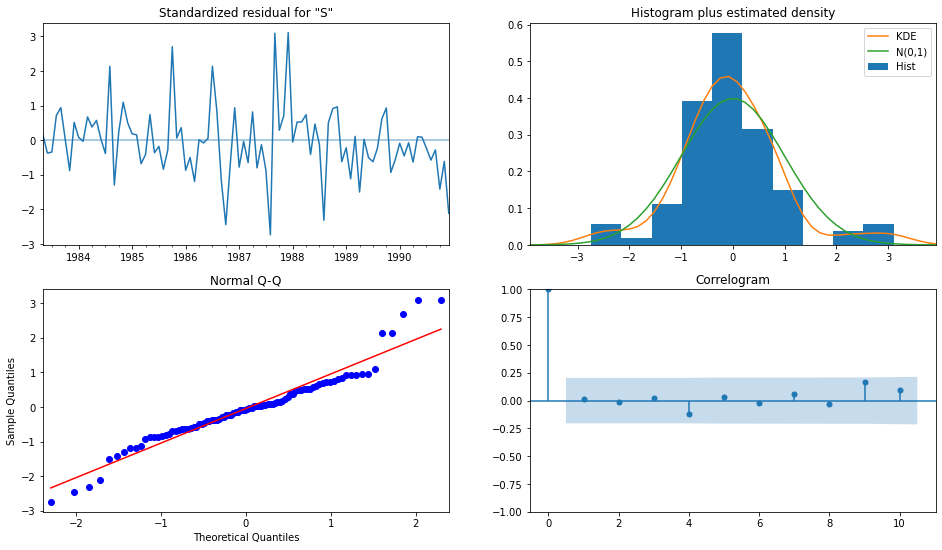

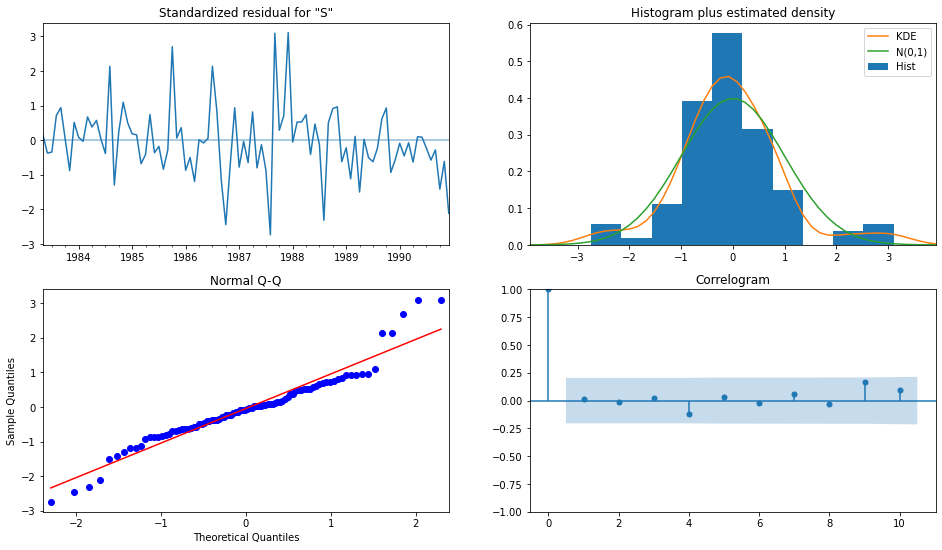

In [635]:
results_auto_SARIMA.plot_diagnostics()
plt.savefig('spark_sarima00312_diag_plot.jpg', bbox_inches='tight');
plt.show()

## Predict on the Test Set using this model and evaluate the model.

In [636]:
predicted_auto_SARIMA = results_auto_SARIMA.get_forecast(steps=len(stest))

In [637]:
predicted_auto_SARIMA.summary_frame(alpha=0.05).head()

Sparkling          mean     mean_se  mean_ci_lower  mean_ci_upper
1991-01-01  1389.352763  415.861324     574.279546    2204.425980
1991-02-01  1224.671167  427.865923     386.069367    2063.272966
1991-03-01  1673.336573  428.010439     834.451528    2512.221618
1991-04-01  1533.304393  432.773834     685.083266    2381.525520
1991-05-01  1425.949281  435.887638     571.625210    2280.273353

In [638]:
rmse = mean_squared_error(stest['Sparkling'],predicted_auto_SARIMA.predicted_mean,squared=False)
mape = mean_absolute_percentage_error(stest['Sparkling'],predicted_auto_SARIMA.predicted_mean)
print('RMSE:',rmse,'\nMAPE:',mape)

RMSE: 601.2438411947355 
MAPE: 25.870694854181043


In [639]:
temp_resultsDf = pd.DataFrame({'RMSE': rmse,'MAPE':mape}
                           ,index=['SARIMA(3,1,1)(3,0,2,12)'])


resultsDf = pd.concat([resultsDf,temp_resultsDf])

resultsDf

RMSE        MAPE
ARIMA(2,1,2)             1299.979195   47.099932
ARIMA(0,1,0)             3864.279352  201.327650
SARIMA(3,1,1)(3,0,2,12)   601.243841   25.870695

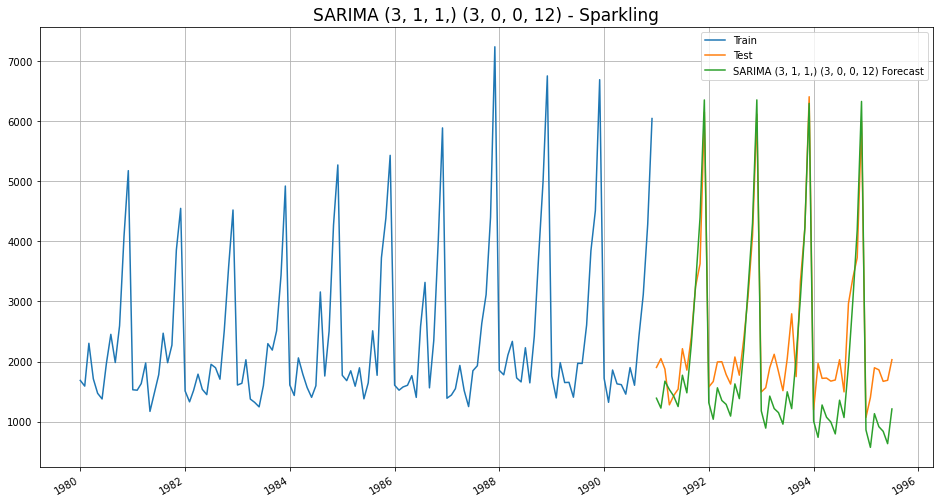

In [640]:
## Plotting the Training data, Test data and the forecasted values

plt.plot(strain, label='Train')
plt.plot(stest, label='Test')
# plt.plot(predicted_auto_SARIMA,label='SARIMA(3, 1, 1)(3, 0, 2, 12)')
# predicted_auto_SARIMA.plot(label='SARIMA(3, 1, 1)(3, 0, 2, 12)')
predicted_auto_SARIMA.predicted_mean.plot(label='SARIMA (3, 1, 1,) (3, 0, 0, 12) Forecast')


plt.legend(loc='best')
plt.grid()
plt.title('SARIMA (3, 1, 1,) (3, 0, 0, 12) - Sparkling', fontsize=17);

plt.savefig('spark_sarima_auto_30012.jpg', bbox_inches='tight');

## Build a version of the SARIMA model for which the best parameters are selected by looking at the ACF and the PACF plots. - Seasonality at 12 - SPARKLING

Let us look at the ACF and the PACF plots once more.

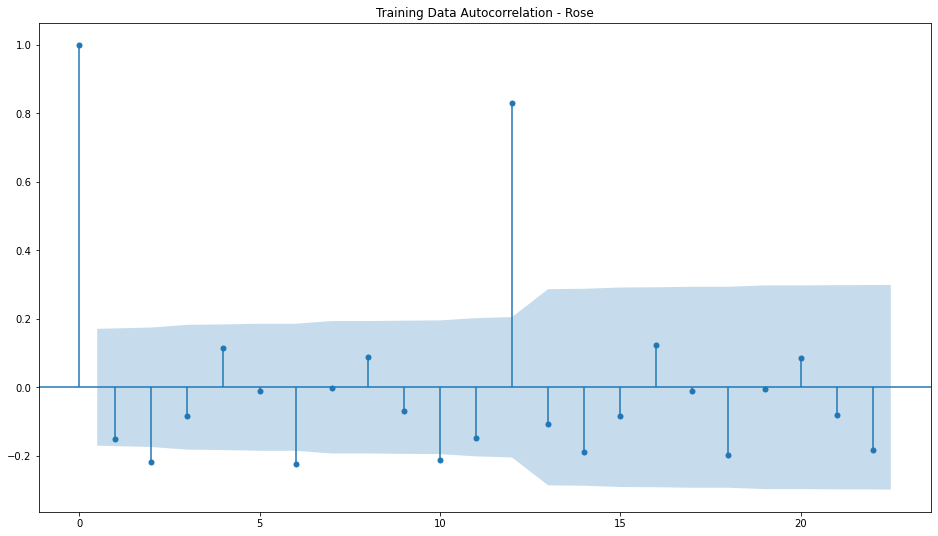

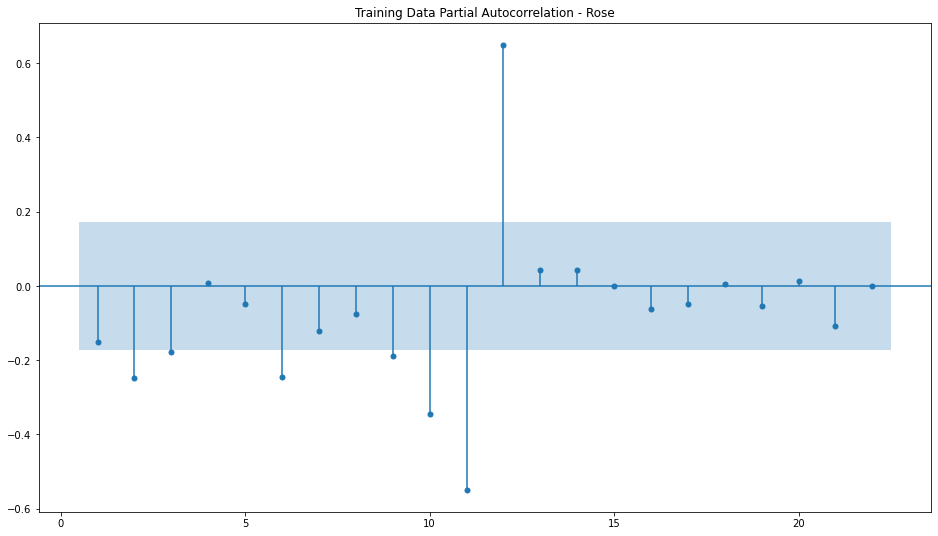

In [641]:
plot_acf(strain.diff(),title='Training Data Autocorrelation - Rose',missing='drop')
plot_pacf(strain.diff().dropna(),title='Training Data Partial Autocorrelation - Rose',zero=False,method='ywmle');

In [642]:
import statsmodels.api as sm

manual_SARIMA = sm.tsa.statespace.SARIMAX(strain['Sparkling'],
                                order=(0,1,0),
                                seasonal_order=(1, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_manual_SARIMA = manual_SARIMA.fit(maxiter=1000)
print(results_manual_SARIMA.summary())

/Users/chetan/DS/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/chetan/DS/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


                                      SARIMAX Results                                       
Dep. Variable:                            Sparkling   No. Observations:                  132
Model:             SARIMAX(0, 1, 0)x(1, 1, [1], 12)   Log Likelihood                -811.162
Date:                              Sat, 27 Mar 2021   AIC                           1628.324
Time:                                      14:58:36   BIC                           1636.315
Sample:                                  01-01-1980   HQIC                          1631.563
                                       - 12-01-1990                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12       0.1482      0.223      0.664      0.507      -0.289       0.586
ma.S.L12      -0.57

In [643]:
import statsmodels.api as sm

manual_SARIMA = sm.tsa.statespace.SARIMAX(strain['Sparkling'],
                                order=(0,1,0),
                                seasonal_order=(2, 1, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_manual_SARIMA1 = manual_SARIMA.fit(maxiter=1000)
print(results_manual_SARIMA1.summary())

/Users/chetan/DS/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/chetan/DS/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


                                        SARIMAX Results                                        
Dep. Variable:                               Sparkling   No. Observations:                  132
Model:             SARIMAX(0, 1, 0)x(2, 1, [1, 2], 12)   Log Likelihood                -722.996
Date:                                 Sat, 27 Mar 2021   AIC                           1455.991
Time:                                         14:58:37   BIC                           1468.708
Sample:                                     01-01-1980   HQIC                          1461.128
                                          - 12-01-1990                                         
Covariance Type:                                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12      -0.2445      0.879     -0.278      0.781      -1.967       1

In [644]:
import statsmodels.api as sm

manual_SARIMA = sm.tsa.statespace.SARIMAX(strain['Sparkling'],
                                order=(0,1,0),
                                seasonal_order=(3, 1, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_manual_SARIMA2 = manual_SARIMA.fit(maxiter=1000)
print(results_manual_SARIMA2.summary())

/Users/chetan/DS/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/chetan/DS/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


                                        SARIMAX Results                                        
Dep. Variable:                               Sparkling   No. Observations:                  132
Model:             SARIMAX(0, 1, 0)x(3, 1, [1, 2], 12)   Log Likelihood                -638.304
Date:                                 Sat, 27 Mar 2021   AIC                           1288.607
Time:                                         14:58:39   BIC                           1303.120
Sample:                                     01-01-1980   HQIC                          1294.438
                                          - 12-01-1990                                         
Covariance Type:                                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12      -1.0545      0.201     -5.254      0.000      -1.448      -0

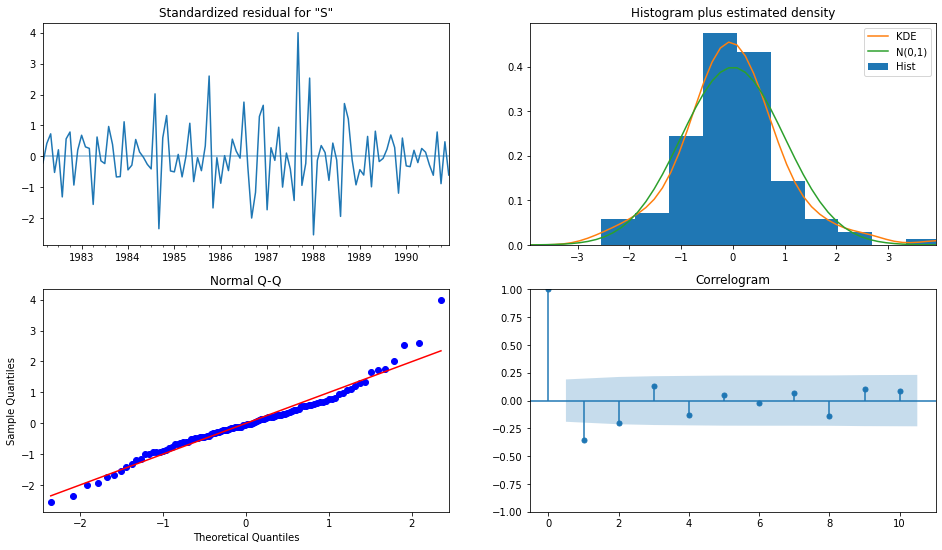

In [645]:
results_manual_SARIMA.plot_diagnostics()
plt.savefig('spark_sarima_11112.jpg', bbox_inches='tight');

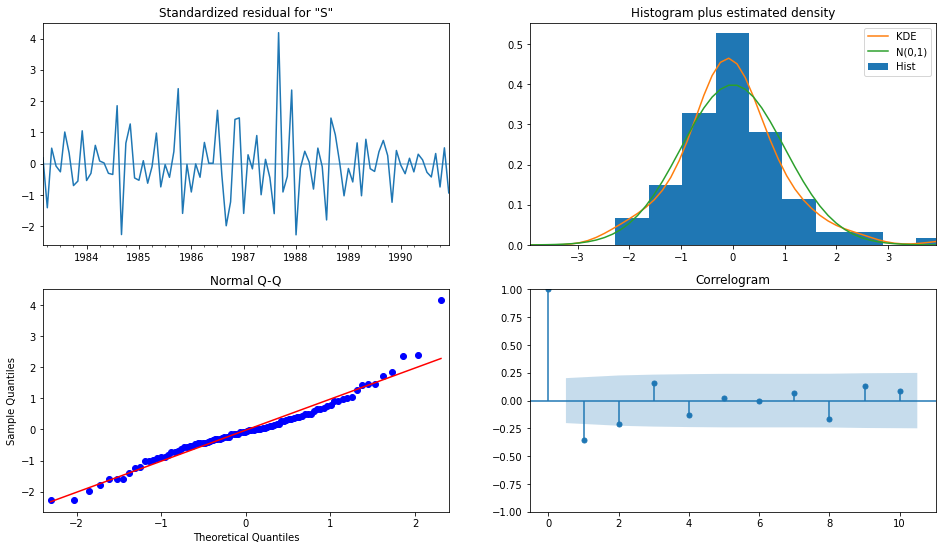

In [646]:
results_manual_SARIMA1.plot_diagnostics()
plt.savefig('spark_sarima_21212.jpg', bbox_inches='tight');

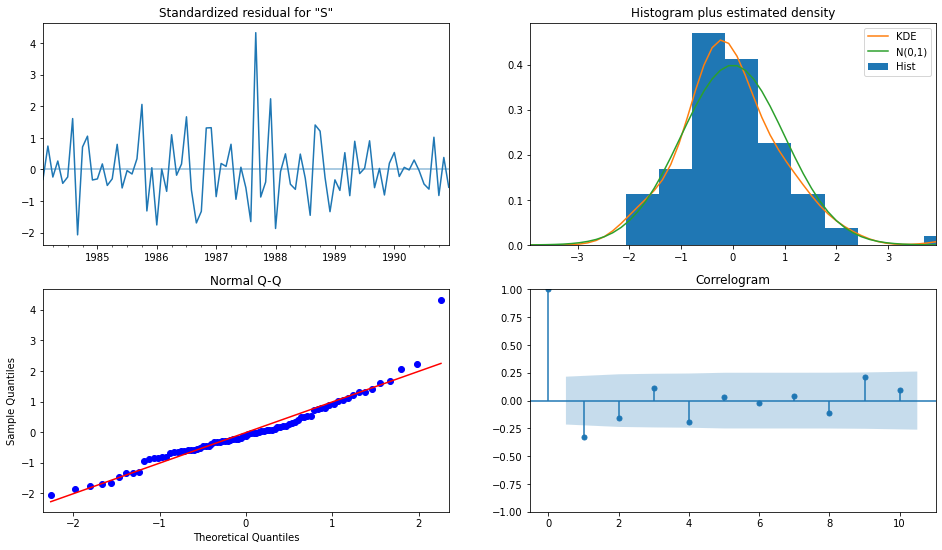

In [647]:
results_manual_SARIMA2.plot_diagnostics()
plt.savefig('spark_sarima_31212.jpg', bbox_inches='tight');

## Predict on the Test Set using this model and evaluate the model.

In [648]:
predicted_manual_SARIMA = results_manual_SARIMA.get_forecast(steps=len(stest))
                                                             
predicted_manual_SARIMA1 = results_manual_SARIMA1.get_forecast(steps=len(stest))

predicted_manual_SARIMA2 = results_manual_SARIMA2.get_forecast(steps=len(stest))

In [649]:
rmse = mean_squared_error(stest['Sparkling'],predicted_manual_SARIMA.predicted_mean,squared=False)
mape = mean_absolute_percentage_error(stest['Sparkling'],predicted_manual_SARIMA.predicted_mean)
print('RMSE:',rmse,'\nMAPE:',mape)

RMSE: 1189.8357745333994 
MAPE: 54.87253527143429


In [650]:
rmse1 = mean_squared_error(stest['Sparkling'],predicted_manual_SARIMA1.predicted_mean,squared=False)
mape1 = mean_absolute_percentage_error(stest['Sparkling'],predicted_manual_SARIMA1.predicted_mean)
print('RMSE:',rmse1,'\nMAPE:',mape1)

RMSE: 1757.7268040140987 
MAPE: 81.78523135822165


In [651]:
rmse2 = mean_squared_error(stest['Sparkling'],predicted_manual_SARIMA2.predicted_mean,squared=False)
mape2 = mean_absolute_percentage_error(stest['Sparkling'],predicted_manual_SARIMA2.predicted_mean)
print('RMSE:',rmse2,'\nMAPE:',mape2)

RMSE: 1551.645770171487 
MAPE: 71.56617248495675


In [652]:
temp_resultsDf = pd.DataFrame({'RMSE': [rmse, rmse1, rmse2],'MAPE':[mape, mape1, mape2]}
                           ,index=['SARIMA(0,1,0)(3,1,2,12)', 'SARIMA(0,1,0)(2,1,2,12)', 'SARIMA(0,1,0)(3,1,2,12)'])


resultsDf = pd.concat([resultsDf,temp_resultsDf])

resultsDf

RMSE        MAPE
ARIMA(2,1,2)             1299.979195   47.099932
ARIMA(0,1,0)             3864.279352  201.327650
SARIMA(3,1,1)(3,0,2,12)   601.243841   25.870695
SARIMA(0,1,0)(3,1,2,12)  1189.835775   54.872535
SARIMA(0,1,0)(2,1,2,12)  1757.726804   81.785231
SARIMA(0,1,0)(3,1,2,12)  1551.645770   71.566172

In [653]:
resultsR0 = resultsDf.copy()

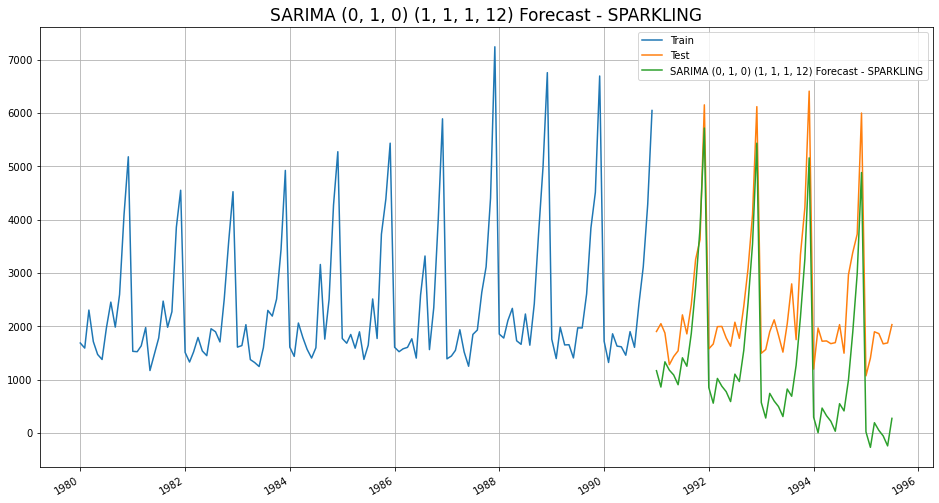

In [654]:
plt.plot(strain, label='Train')
plt.plot(stest, label ='Test')

predicted_manual_SARIMA.predicted_mean.plot(label = 'SARIMA (0, 1, 0) (1, 1, 1, 12) Forecast - SPARKLING')
plt.grid()
plt.legend(loc='best')
plt.title('SARIMA (0, 1, 0) (1, 1, 1, 12) Forecast - SPARKLING', fontsize=17)
plt.savefig('SPARK_sarima_manual_forecast_11112.jpg', bbox_inches='tight');

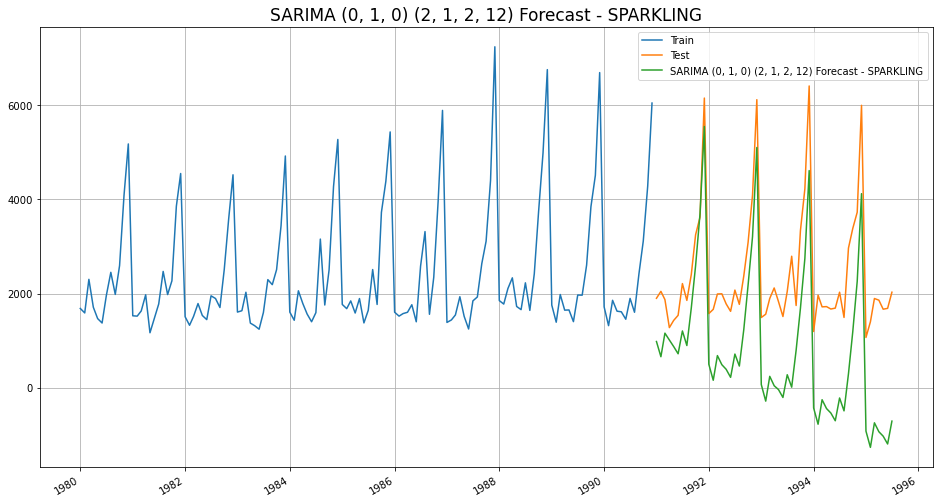

In [655]:
plt.plot(strain, label='Train')
plt.plot(stest, label ='Test')

predicted_manual_SARIMA1.predicted_mean.plot(label = 'SARIMA (0, 1, 0) (2, 1, 2, 12) Forecast - SPARKLING')
plt.grid()
plt.legend(loc='best')
plt.title('SARIMA (0, 1, 0) (2, 1, 2, 12) Forecast - SPARKLING', fontsize=17)
plt.savefig('spark_sarima_manual_forecast1.jpg', bbox_inches='tight');

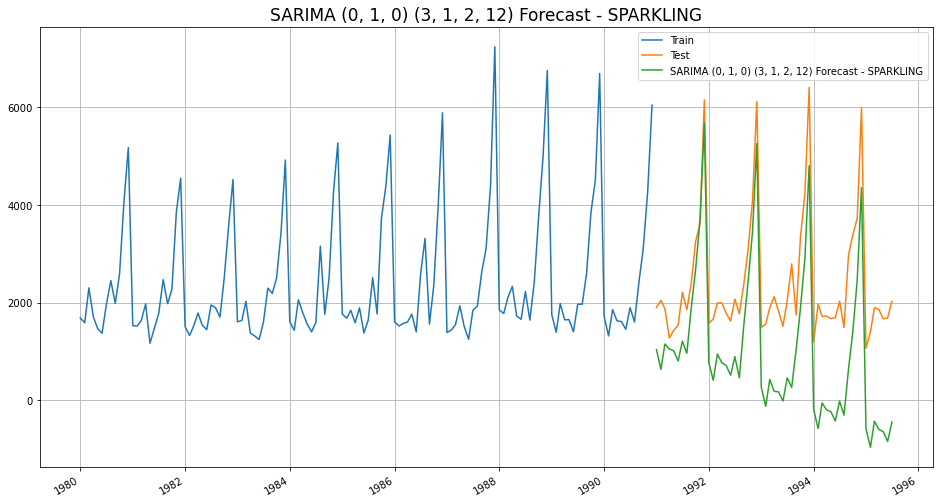

In [656]:
plt.plot(strain, label='Train')
plt.plot(stest, label ='Test')

predicted_manual_SARIMA2.predicted_mean.plot(label = 'SARIMA (0, 1, 0) (3, 1, 2, 12) Forecast - SPARKLING')
plt.grid()
plt.legend(loc='best')
plt.title('SARIMA (0, 1, 0) (3, 1, 2, 12) Forecast - SPARKLING', fontsize=17)
plt.savefig('spark_sarima_manual_forecast2.jpg', bbox_inches='tight');

## Building the most optimum model on the Full Data.

Here, we have a scenario where our training data was stationary but our full data was not stationary. So, we will use the same parameters as our training data but with adding a level of differencing which is needed for the data to be stationary.

In [657]:
full_data_model = sm.tsa.statespace.SARIMAX(dfr['Rose'],
                                order=(2,1,2),
                                seasonal_order=(2,1,2,12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_full_data_model = full_data_model.fit(maxiter=1000)
print(results_full_data_model.summary())

/Users/chetan/DS/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/chetan/DS/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


                                     SARIMAX Results                                      
Dep. Variable:                               Rose   No. Observations:                  187
Model:             SARIMAX(2, 1, 2)x(2, 1, 2, 12)   Log Likelihood                -587.531
Date:                            Sat, 27 Mar 2021   AIC                           1193.062
Time:                                    14:58:51   BIC                           1219.976
Sample:                                01-01-1980   HQIC                          1203.997
                                     - 07-01-1995                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8649      0.101     -8.556      0.000      -1.063      -0.667
ar.L2          0.0340      0.091   

## Evaluate the model on the whole data and predict 12 months into the future

In [658]:
predicted_manual_SARIMA_full_data = results_full_data_model.get_forecast(steps=12)

In [659]:
pred_full_manual_SARIMA_date = predicted_manual_SARIMA_full_data.summary_frame(alpha=0.05)
pred_full_manual_SARIMA_date.head()

Rose             mean    mean_se  mean_ci_lower  mean_ci_upper
1995-08-01  43.083183  12.674168      18.242271      67.924095
1995-09-01  43.341539  12.959930      17.940542      68.742535
1995-10-01  45.827000  12.963927      20.418170      71.235830
1995-11-01  57.396966  13.124657      31.673111      83.120821
1995-12-01  85.074561  13.133487      59.333399     110.815723

In [660]:
rmse = mean_squared_error(dfr['Rose'],results_full_data_model.fittedvalues,squared=False)
print('RMSE of the Full Model',rmse)

RMSE of the Full Model 35.911101459061385


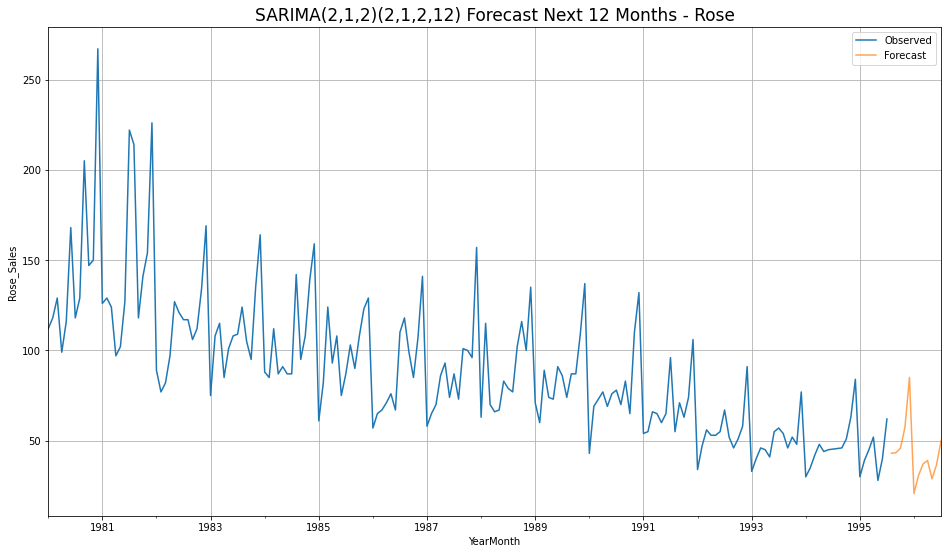

In [661]:
axis = dfr['Rose'].plot(label='Observed')
pred_full_manual_SARIMA_date['mean'].plot(ax=axis, label='Forecast', alpha=0.7)

axis.set_xlabel('YearMonth')
axis.set_ylabel('Rose_Sales')
plt.legend(loc='best')
plt.grid();
plt.title('SARIMA(2,1,2)(2,1,2,12) Forecast Next 12 Months - Rose', fontsize=17);
plt.savefig('rose_forecast.jpg', bbox_inches='tight');

In [662]:
resultsDf

RMSE        MAPE
ARIMA(2,1,2)             1299.979195   47.099932
ARIMA(0,1,0)             3864.279352  201.327650
SARIMA(3,1,1)(3,0,2,12)   601.243841   25.870695
SARIMA(0,1,0)(3,1,2,12)  1189.835775   54.872535
SARIMA(0,1,0)(2,1,2,12)  1757.726804   81.785231
SARIMA(0,1,0)(3,1,2,12)  1551.645770   71.566172

In [663]:
resultsS0 = resultsDf.copy()

resultsS0.to_csv('spark_all_arima.csv')

In [664]:
results_all_spark = pd.concat([resultsDf14, resultsS0], axis=0)
results_all_spark

Test RMSE Rose  \
RegressionOnTime                                         15.268955   
NaiveModel                                               79.718773   
SimpleAverageModel                                       53.460570   
2pointTrailingMovingAverage                              11.529278   
4pointTrailingMovingAverage                              14.451403   
6pointTrailingMovingAverage                              14.566327   
9pointTrailingMovingAverage                              14.727630   
Simple Exponential Smoothing                             36.796225   
Double Exponential Smoothing                             15.270968   
Triple Exponential Smoothing (Additive Season)           14.243240   
Triple Exponential Smoothing (Multiplicative Se...       19.113110   
Triple Exponential Smoothing (Additive Season, ...       26.039948   
Triple Exponential Smoothing (Multiplicative Se...       25.994867   
ARIMA(2,1,2)                                                   NaN   
ARIMA(0,1,0)                                                   NaN   
SARIMA(3,1,1)(3,0,2,12)                                        NaN   
SARIMA(0,1,0)(3,1,2,12)                                        NaN   
SARIMA(0,1,0)(2,1,2,12)                                        NaN   
SARIMA(0,1,0)(3,1,2,12)                                        NaN   

                                                    Test RMSE Sparkling  \
RegressionOnTime                                            1389.135175   
NaiveModel                                                  3864.279352   
SimpleAverageModel                                          1275.081804   
2pointTrailingMovingAverage                                  813.400684   
4pointTrailingMovingAverage                                 1156.589694   
6pointTrailingMovingAverage                                 1283.927428   
9pointTrailingMovingAverage                                 1346.278315   
Simple Exponential Smoothing                                1338.004623   
Double Exponential Smoothing                                5291.879833   
Triple Exponential Smoothing (Additive Season)               378.626241   
Triple Exponential Smoothing (Multiplicative Se...           403.706228   
Triple Exponential Smoothing (Additive Season, ...           378.626241   
Triple Exponential Smoothing (Multiplicative Se...           352.450966   
ARIMA(2,1,2)                                                        NaN   
ARIMA(0,1,0)                                                        NaN   
SARIMA(3,1,1)(3,0,2,12)                                             NaN   
SARIMA(0,1,0)(3,1,2,12)                                             NaN   
SARIMA(0,1,0)(2,1,2,12)                                             NaN   
SARIMA(0,1,0)(3,1,2,12)                                             NaN   

                                                           RMSE        MAPE  
RegressionOnTime                                            NaN         NaN  
NaiveModel                                                  NaN         NaN  
SimpleAverageModel                                          NaN         NaN  
2pointTrailingMovingAverage                                 NaN         NaN  
4pointTrailingMovingAverage                                 NaN         NaN  
6pointTrailingMovingAverage                                 NaN         NaN  
9pointTrailingMovingAverage                                 NaN         NaN  
Simple Exponential Smoothing                                NaN         NaN  
Double Exponential Smoothing                                NaN         NaN  
Triple Exponential Smoothing (Additive Season)              NaN         NaN  
Triple Exponential Smoothing (Multiplicative Se...          NaN         NaN  
Triple Exponential Smoothing (Additive Season, ...          NaN         NaN  
Triple Exponential Smoothing (Multiplicative Se...          NaN         NaN  
ARIMA(2,1,2)                                        1299.9

In [665]:
results_all_spark.to_csv('results_all_spark.csv')

# <font color=#FF6565> =============================================================================================

# <font color=#FF6565> =============================================================================================

## Best Model for ROSE with Least RMSE - 2 Pt Moving Average

In [761]:
MovingAverage = dfr.copy()
MovingAverage.head()

Rose
YearMonth        
1980-01-01  112.0
1980-02-01  118.0
1980-03-01  129.0
1980-04-01   99.0
1980-05-01  116.0

#### Trailing moving averages

In [762]:

MovingAverage['Trailing_2'] = MovingAverage['Rose'].rolling(2).mean()

MovingAverage.head()
MovingAverage.tail()

Rose  Trailing_2
YearMonth                    
1980-01-01  112.0         NaN
1980-02-01  118.0       115.0
1980-03-01  129.0       123.5
1980-04-01   99.0       114.0
1980-05-01  116.0       107.5

Rose  Trailing_2
YearMonth                   
1995-03-01  45.0        42.0
1995-04-01  52.0        48.5
1995-05-01  28.0        40.0
1995-06-01  40.0        34.0
1995-07-01  62.0        51.0

In [774]:
#Creating train and test set 
trailing_MovingAverage_train=MovingAverage[MovingAverage.index<'1991'] 
trailing_MovingAverage_test=MovingAverage[MovingAverage.index>='1991']


MovingAverage.head()

Rose  Trailing_2  forecast_12
1980-01-01  112.0         NaN          NaN
1980-02-01  118.0       115.0        115.0
1980-03-01  129.0       123.5        123.5
1980-04-01   99.0       114.0        114.0
1980-05-01  116.0       107.5        107.5

In [764]:
import pandas as pd
from datetime import datetime

datelist = pd.date_range(start='08/01/1995', periods=12, freq='MS')
ts = pd.to_datetime(datelist, format="%Y-%m-%d")

ma_forecast = pd.DataFrame(columns=['Rose', 'Trailing_2', 'forecast_12'], index=ts)

MovingAverage = pd.concat([MovingAverage, ma_forecast], axis=0)
MovingAverage['forecast_12'] = MovingAverage['Rose'].rolling(2).mean()

In [779]:
MovingAverage.tail()
MovingAverage.shape
MovingAverage.fillna(0)
MovingAverage['Rose'].iloc[0:2]

Rose  Trailing_2  forecast_12
1996-03-01   NaN         NaN          NaN
1996-04-01   NaN         NaN          NaN
1996-05-01   NaN         NaN          NaN
1996-06-01   NaN         NaN          NaN
1996-07-01   NaN         NaN          NaN

(199, 3)

Rose  Trailing_2  forecast_12
1980-01-01  112.0         0.0          0.0
1980-02-01  118.0       115.0        115.0
1980-03-01  129.0       123.5        123.5
1980-04-01   99.0       114.0        114.0
1980-05-01  116.0       107.5        107.5
...           ...         ...          ...
1996-03-01    0.0         0.0          0.0
1996-04-01    0.0         0.0          0.0
1996-05-01    0.0         0.0          0.0
1996-06-01    0.0         0.0          0.0
1996-07-01    0.0         0.0          0.0

[199 rows x 3 columns]

1980-01-01    112.0
1980-02-01    118.0
Name: Rose, dtype: float64

In [780]:
import math
k = 2
yhat = []

for i in range(0,199):
    tmp = 0.0

    tmp = math.fsum(MovingAverage['Rose'].iloc[i:i+2])

    yhat.append(tmp/k)
    
yhat

[115.0,
 123.5,
 114.0,
 107.5,
 142.0,
 143.0,
 123.5,
 167.0,
 176.0,
 148.5,
 208.5,
 196.5,
 127.5,
 126.5,
 110.5,
 99.5,
 114.5,
 174.5,
 218.0,
 166.0,
 129.5,
 147.5,
 190.0,
 157.5,
 83.0,
 79.5,
 89.5,
 112.0,
 124.0,
 119.0,
 117.0,
 111.5,
 109.0,
 123.0,
 151.5,
 122.0,
 91.5,
 111.5,
 100.0,
 93.0,
 104.5,
 108.5,
 116.5,
 114.5,
 100.0,
 115.0,
 149.5,
 126.0,
 86.5,
 98.5,
 99.5,
 89.0,
 89.0,
 87.0,
 114.5,
 118.5,
 101.5,
 123.5,
 149.0,
 110.0,
 71.5,
 103.0,
 108.5,
 100.5,
 91.5,
 81.0,
 95.0,
 96.5,
 99.0,
 115.5,
 126.0,
 93.0,
 61.0,
 66.0,
 69.0,
 73.5,
 71.5,
 88.5,
 114.0,
 108.5,
 92.0,
 96.0,
 124.0,
 99.5,
 61.5,
 67.5,
 78.0,
 89.5,
 83.5,
 80.5,
 80.0,
 87.0,
 100.5,
 98.0,
 126.5,
 110.0,
 89.0,
 92.5,
 68.0,
 66.5,
 75.0,
 81.0,
 78.0,
 89.5,
 109.0,
 108.0,
 117.5,
 103.0,
 65.5,
 74.5,
 81.5,
 73.5,
 82.0,
 88.5,
 80.0,
 80.5,
 87.0,
 98.0,
 123.0,
 90.0,
 56.0,
 71.0,
 75.0,
 73.0,
 72.5,
 77.0,
 74.0,
 76.5,
 74.0,
 87.5,
 121.0,
 93.0,
 54.5,
 60.

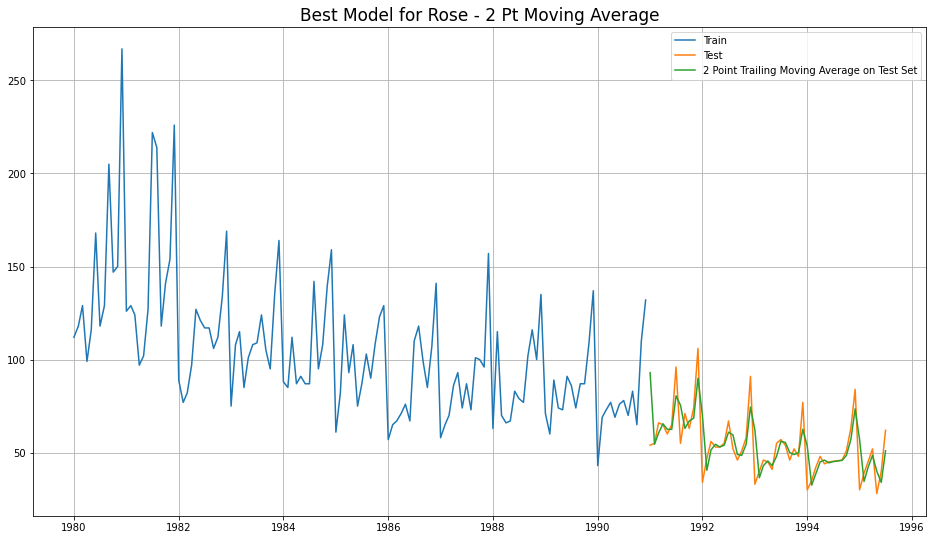

In [669]:
## Plotting on both the Training and Test data

plt.figure(figsize=(16,9))
plt.plot(trailing_MovingAverage_train['Rose'], label='Train')
plt.plot(trailing_MovingAverage_test['Rose'], label='Test')


plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on Test Set')


plt.legend(loc = 'best')
plt.grid();
plt.title('Best Model for Rose - 2 Pt Moving Average', fontsize=17);
plt.savefig('rose_best_model_2pt.jpg', bbox_inches='tight');

# FORECAST ON NEXT 12 MONTHS - ROSE 

## (Using 2 Pt Moving Average Model)

In [27]:
dfr1 = pd.read_csv('Rose2.csv', parse_dates=True,index_col='YearMonth')
dfr1.head()
dfr1.tail()

Rose  forecast
YearMonth                  
1980-01-01  112.0       NaN
1980-02-01  118.0     115.0
1980-03-01  129.0     123.5
1980-04-01   99.0     114.0
1980-05-01  116.0     107.5

Rose   forecast
YearMonth                  
1996-03-01   NaN  45.355469
1996-04-01   NaN  45.322266
1996-05-01   NaN  45.338867
1996-06-01   NaN  45.330566
1996-07-01   NaN  45.334717

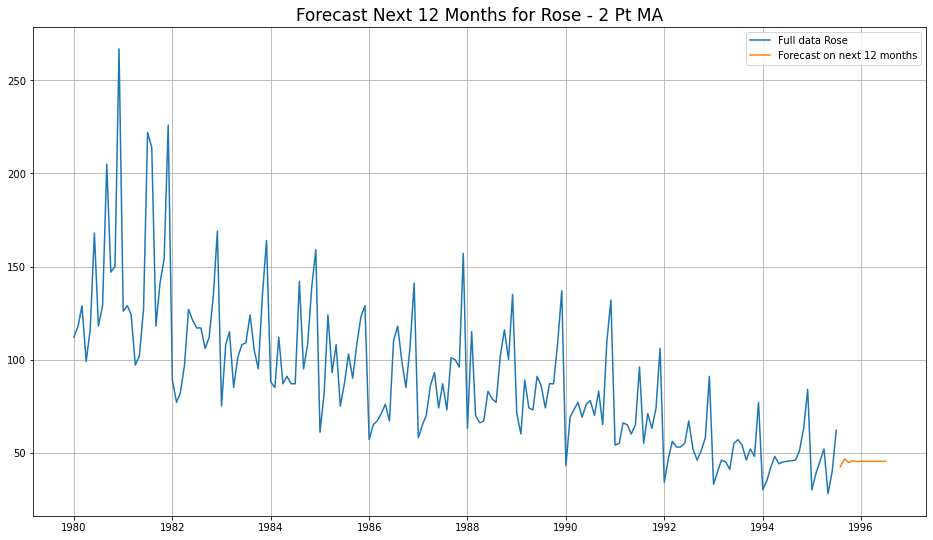

In [41]:
## FORECAST ON NEXT 12 MONTHS

plt.figure(figsize=(16,9))
plt.plot(dfr1['Rose'], label='Full data Rose')
plt.plot(dfr1['forecast'].iloc[-12:], label='Forecast on next 12 months')



plt.legend(loc='best')
plt.grid()
plt.title('Forecast Next 12 Months for Rose - 2 Pt MA', fontsize=17);

plt.savefig('rose_forecast_2ptma.jpg', bbox_inches='tight');








## Holt-Winters - ETS(A, A, M) - Best Model for Sparkling Till Now

### ETS(A, Ad, M) model - Taking MULTIPLICATIVE SEASONALITY

### USING DAMPED TREND

In [58]:
# Initializing the Double Exponential Smoothing Model
model_TES_am = ExponentialSmoothing(dfs,trend='add',seasonal='multiplicative',initialization_method='estimated', damped_trend=True)
# Fitting the model
model_TES_am = model_TES_am.fit()

print('')
print('==Holt Winters model Exponential Smoothing Estimated Parameters ==')
print('')
print(model_TES_am.params)


==Holt Winters model Exponential Smoothing Estimated Parameters ==

{'smoothing_level': 0.07571591750340637, 'smoothing_trend': 0.06489924562418184, 'smoothing_seasonal': 0.2738625830314173, 'damping_trend': 0.9899998705682354, 'initial_level': 2356.5347406793244, 'initial_trend': -13.396006155922343, 'initial_seasons': array([0.77173236, 0.71600393, 0.9173041 , 0.83138204, 0.68225091,
       0.67620719, 0.91532251, 1.1546779 , 0.94410173, 1.26995442,
       1.950702  , 2.52501085]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


/Users/chetan/DS/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [59]:
# Forecasting using this model for the duration of the test set
TES_predict_am_damp_spark =  model_TES_am.forecast(steps=12)
TES_predict_am_damp_spark
prediction_1 = TES_predict_am_damp_spark
TES_predict_am_damp_spark.to_csv('spark_forecast_tes.csv')

1995-08-01    1931.441163
1995-09-01    2351.978730
1995-10-01    3179.461286
1995-11-01    3918.068026
1995-12-01    5985.901895
1996-01-01    1357.574635
1996-02-01    1599.153662
1996-03-01    1830.307852
1996-04-01    1791.018797
1996-05-01    1641.838880
1996-06-01    1556.371947
1996-07-01    1965.995789
Freq: MS, dtype: float64

In [24]:
plt.rcParams["figure.figsize"] = [16,9]

In [19]:
pred_1_df = pd.DataFrame({'lower_CI':prediction_1 - 1.96*np.std(model_TES_am.resid,ddof=1),
                          'prediction':prediction_1,
                          'upper_ci': prediction_1 + 1.96*np.std(model_TES_am.resid,ddof=1)})
pred_1_df.head()

lower_CI   prediction     upper_ci
1995-08-01  1252.078711  1931.441163  2610.803614
1995-09-01  1672.616279  2351.978730  3031.341182
1995-10-01  2500.098834  3179.461286  3858.823737
1995-11-01  3238.705575  3918.068026  4597.430478
1995-12-01  5306.539443  5985.901895  6665.264346

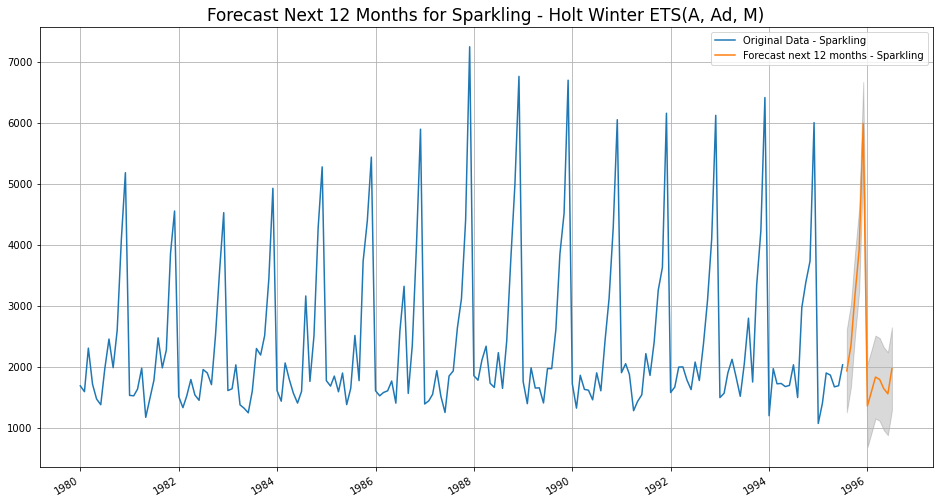

In [26]:
## Plotting the Training data, Test data and the forecasted values

plt.plot(dfs['Sparkling'], label='Original Data - Sparkling')

ax =TES_predict_am_damp_spark.plot(label='Forecast next 12 months - Sparkling')


ax.fill_between(pred_1_df.index,pred_1_df['lower_CI'], pred_1_df['upper_ci'], color='k', alpha=.15)

plt.legend(loc='best')
plt.grid()
plt.title('Forecast Next 12 Months for Sparkling - Holt Winter ETS(A, Ad, M)', fontsize=17);

plt.savefig('spark_forecast_tes.jpg', bbox_inches='tight');

## Building the second most optimum model on ROSE - TES ETS(A, A, A)

Here, we have a scenario where our training data was stationary but our full data was not stationary. So, we will use the same parameters as our training data but with adding a level of differencing which is needed for the data to be stationary.

In [51]:
# Initializing the Double Exponential Smoothing Model
model_TES_am = ExponentialSmoothing(dfr,trend='add',seasonal='additive',initialization_method='estimated', damped_trend=False)
# Fitting the model
model_TES_am = model_TES_am.fit()

print('')
print('==Holt Winters model Exponential Smoothing Estimated Parameters ==')
print('')
print(model_TES_am.params)


==Holt Winters model Exponential Smoothing Estimated Parameters ==

{'smoothing_level': 0.09735117361719348, 'smoothing_trend': 5.507629753484272e-06, 'smoothing_seasonal': 0.0002767929725687986, 'damping_trend': nan, 'initial_level': 145.48998105259932, 'initial_trend': -0.53700374713204, 'initial_seasons': array([-28.14126307, -17.20156253,  -9.04796115, -15.68849474,
       -11.76246934,  -5.79244325,   5.28480569,   5.30230053,
         2.3165333 ,   2.29373567,  17.61244964,  55.0886928 ]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


/Users/chetan/DS/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [56]:
# Forecasting using this model for the duration of the test set
TES_predict =  model_TES_am.forecast(steps=12)
TES_predict
prediction_1 = TES_predict
TES_predict.to_csv('rose_forecast_tes.csv')

1995-08-01    50.020850
1995-09-01    46.499553
1995-10-01    45.936706
1995-11-01    60.717805
1995-12-01    97.662698
1996-01-01    13.892676
1996-02-01    24.294943
1996-03-01    31.911300
1996-04-01    24.733799
1996-05-01    28.122724
1996-06-01    33.556066
1996-07-01    44.093271
Freq: MS, dtype: float64

In [53]:
plt.rcParams["figure.figsize"] = [16,9]

In [54]:
pred_1_df = pd.DataFrame({'lower_CI':prediction_1 - 1.96*np.std(model_TES_am.resid,ddof=1),
                          'prediction':prediction_1,
                          'upper_ci': prediction_1 + 1.96*np.std(model_TES_am.resid,ddof=1)})
pred_1_df.head()

lower_CI  prediction    upper_ci
1995-08-01  15.305048   50.020850   84.736652
1995-09-01  11.783751   46.499553   81.215355
1995-10-01  11.220903   45.936706   80.652508
1995-11-01  26.002003   60.717805   95.433607
1995-12-01  62.946896   97.662698  132.378500

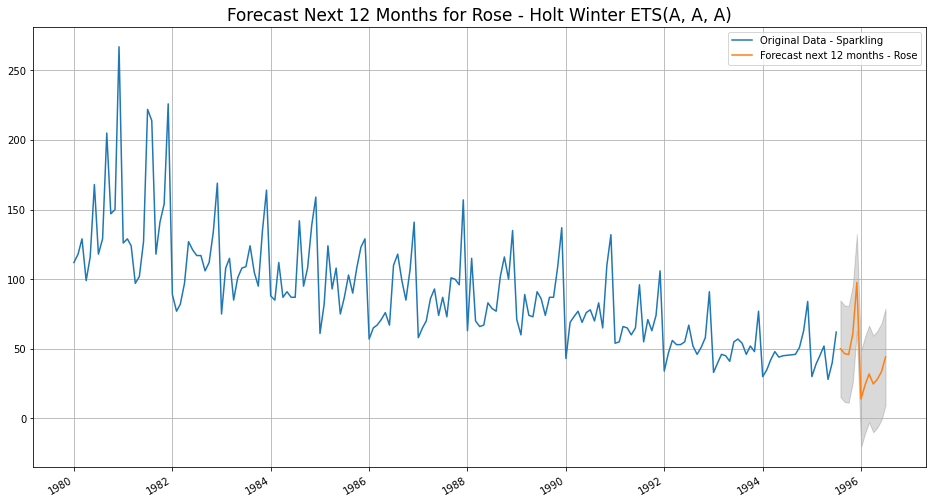

In [55]:
## Plotting the Training data, Test data and the forecasted values

plt.plot(dfr['Rose'], label='Original Data - Sparkling')

ax =TES_predict.plot(label='Forecast next 12 months - Rose')


ax.fill_between(pred_1_df.index,pred_1_df['lower_CI'], pred_1_df['upper_ci'], color='k', alpha=.15)

plt.legend(loc='best')
plt.grid()
plt.title('Forecast Next 12 Months for Rose - Holt Winter ETS(A, A, A)', fontsize=17);

plt.savefig('rose_forecast_tes.jpg', bbox_inches='tight');